In [ ]:
#!pip install hyperopt

In [63]:
import yaml
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score, mean_squared_error
from hyperopt import hp, fmin, tpe

from uvsw_part.simulation import run_cable_wakeosc

import matplotlib.pyplot as plt

In [ ]:
# Path to list of time series
LIST_PATH = "../data/params/List1.txt"
# Index of time series to simulate
TS_INDEX = 0

In [64]:
# Read table of time series
data_list = pd.read_csv(LIST_PATH , delim_whitespace=True)
# Get parameters of selected time series
set_params = data_list.iloc[0,:]
# Get dataframe of data of corresponding TS
ref = pd.read_csv("../data/ref/list1/graph{}.csv".format(set_params["nc"]))

In [24]:
# Show params of selected TS
set_params

nc                    1
md                    1
U[m/s]              0.9
d[m]              0.025
m[kg/m]            1.57
L[m]                  1
H[N]                500
Nt                18015
Dt[s]            0.0004
tf[s]             7.206
ymax[m]             0.0
filename    Data1.1.bin
Name: 0, dtype: object

In [65]:
# Set tf, dt and dr values based on length of observations
tf_val = set_params["tf[s]"]
dt_val = tf_val / len(ref)
dr_val = tf_val / len(ref)

In [66]:
# Set the optimisation space
search_space = {
    'cable': {
        'type': 'None',
        'length': 1.0,
        'tension': hp.uniform('tension_val',100,35000),
        'h': hp.uniform('h_val',50,1000)},
    'conductor': {'m': 1.57, 'd': 0.025, 'EA': 0.0},
    'simulation': {'ns': 101,
        'tf': tf_val,
        'dt': tf_val / len(ref),
        'dr': tf_val / len(ref),
        'si': 99,
        'pp': True},
    'wakeosc': {'u': hp.lognormal('u_val',0.05,7.5),
        'st': 0.235,
        'cl0': 0.6,
        'eps': 0.3,
        'al': 0.1,
        'bt': 0.0,
        'gm': 0.0,
        'md': 1,
        'y0': 0.0,
        'q0': 0.05}
}

In [67]:
def rmse_sim(cfg):
    # Run simulation
    dfy, _ = simulation.run_cable_wakeosc(cfg)
    # Return the error to minimize
    return np.sqrt(mean_squared_error(ref['y/d'],(dfy['s=0.250']/0.025).values[:-1]))

In [74]:
# Run the optimization process
best = fmin(rmse_sim, search_space, algo=tpe.suggest, max_evals=3)

-- running  0.00%                                                                                                      
 -- running  0.01%                                                                                                     
 -- running  0.01%                                                                                                     
 -- running  0.02%                                                                                                     
 -- running  0.02%                                                                                                     
 -- running  0.03%                                                                                                     
 -- running  0.03%                                                                                                     
 -- running  0.04%                                                                                                     
 -- running  0.04%                      

 -- running  0.38%                                                                                                     
 -- running  0.38%                                                                                                     
 -- running  0.39%                                                                                                     
 -- running  0.39%                                                                                                     
 -- running  0.40%                                                                                                     
 -- running  0.41%                                                                                                     
 -- running  0.41%                                                                                                     
 -- running  0.42%                                                                                                     
 -- running  0.42%                      

 -- running  0.75%                                                                                                     
 -- running  0.76%                                                                                                     
 -- running  0.77%                                                                                                     
 -- running  0.77%                                                                                                     
 -- running  0.78%                                                                                                     
 -- running  0.78%                                                                                                     
 -- running  0.79%                                                                                                     
 -- running  0.79%                                                                                                     
 -- running  0.80%                      

 -- running  1.13%                                                                                                     
 -- running  1.14%                                                                                                     
 -- running  1.14%                                                                                                     
 -- running  1.15%                                                                                                     
 -- running  1.15%                                                                                                     
 -- running  1.16%                                                                                                     
 -- running  1.17%                                                                                                     
 -- running  1.17%                                                                                                     
 -- running  1.18%                      

 -- running  1.51%                                                                                                     
 -- running  1.52%                                                                                                     
 -- running  1.52%                                                                                                     
 -- running  1.53%                                                                                                     
 -- running  1.53%                                                                                                     
 -- running  1.54%                                                                                                     
 -- running  1.54%                                                                                                     
 -- running  1.55%                                                                                                     
 -- running  1.55%                      

 -- running  1.89%                                                                                                     
 -- running  1.89%                                                                                                     
 -- running  1.90%                                                                                                     
 -- running  1.90%                                                                                                     
 -- running  1.91%                                                                                                     
 -- running  1.92%                                                                                                     
 -- running  1.92%                                                                                                     
 -- running  1.93%                                                                                                     
 -- running  1.93%                      

 -- running  2.26%                                                                                                     
 -- running  2.27%                                                                                                     
 -- running  2.28%                                                                                                     
 -- running  2.28%                                                                                                     
 -- running  2.29%                                                                                                     
 -- running  2.29%                                                                                                     
 -- running  2.30%                                                                                                     
 -- running  2.30%                                                                                                     
 -- running  2.31%                      

 -- running  2.64%                                                                                                     
 -- running  2.65%                                                                                                     
 -- running  2.65%                                                                                                     
 -- running  2.66%                                                                                                     
 -- running  2.66%                                                                                                     
 -- running  2.67%                                                                                                     
 -- running  2.68%                                                                                                     
 -- running  2.68%                                                                                                     
 -- running  2.69%                      

 -- running  3.02%                                                                                                     
 -- running  3.03%                                                                                                     
 -- running  3.03%                                                                                                     
 -- running  3.04%                                                                                                     
 -- running  3.04%                                                                                                     
 -- running  3.05%                                                                                                     
 -- running  3.05%                                                                                                     
 -- running  3.06%                                                                                                     
 -- running  3.06%                      

 -- running  3.40%                                                                                                     
 -- running  3.40%                                                                                                     
 -- running  3.41%                                                                                                     
 -- running  3.41%                                                                                                     
 -- running  3.42%                                                                                                     
 -- running  3.42%                                                                                                     
 -- running  3.43%                                                                                                     
 -- running  3.44%                                                                                                     
 -- running  3.44%                      

 -- running  3.77%                                                                                                     
 -- running  3.78%                                                                                                     
 -- running  3.79%                                                                                                     
 -- running  3.79%                                                                                                     
 -- running  3.80%                                                                                                     
 -- running  3.80%                                                                                                     
 -- running  3.81%                                                                                                     
 -- running  3.81%                                                                                                     
 -- running  3.82%                      

 -- running  4.15%                                                                                                     
 -- running  4.16%                                                                                                     
 -- running  4.16%                                                                                                     
 -- running  4.17%                                                                                                     
 -- running  4.17%                                                                                                     
 -- running  4.18%                                                                                                     
 -- running  4.19%                                                                                                     
 -- running  4.19%                                                                                                     
 -- running  4.20%                      

 -- running  4.53%                                                                                                     
 -- running  4.54%                                                                                                     
 -- running  4.54%                                                                                                     
 -- running  4.55%                                                                                                     
 -- running  4.55%                                                                                                     
 -- running  4.56%                                                                                                     
 -- running  4.56%                                                                                                     
 -- running  4.57%                                                                                                     
 -- running  4.57%                      

 -- running  4.91%                                                                                                     
 -- running  4.91%                                                                                                     
 -- running  4.92%                                                                                                     
 -- running  4.92%                                                                                                     
 -- running  4.93%                                                                                                     
 -- running  4.93%                                                                                                     
 -- running  4.94%                                                                                                     
 -- running  4.95%                                                                                                     
 -- running  4.95%                      

 -- running  5.28%                                                                                                     
 -- running  5.29%                                                                                                     
 -- running  5.30%                                                                                                     
 -- running  5.30%                                                                                                     
 -- running  5.31%                                                                                                     
 -- running  5.31%                                                                                                     
 -- running  5.32%                                                                                                     
 -- running  5.32%                                                                                                     
 -- running  5.33%                      

 -- running  5.66%                                                                                                     
 -- running  5.67%                                                                                                     
 -- running  5.67%                                                                                                     
 -- running  5.68%                                                                                                     
 -- running  5.68%                                                                                                     
 -- running  5.69%                                                                                                     
 -- running  5.70%                                                                                                     
 -- running  5.70%                                                                                                     
 -- running  5.71%                      

 -- running  6.04%                                                                                                     
 -- running  6.04%                                                                                                     
 -- running  6.05%                                                                                                     
 -- running  6.06%                                                                                                     
 -- running  6.06%                                                                                                     
 -- running  6.07%                                                                                                     
 -- running  6.07%                                                                                                     
 -- running  6.08%                                                                                                     
 -- running  6.08%                      

 -- running  6.42%                                                                                                     
 -- running  6.42%                                                                                                     
 -- running  6.43%                                                                                                     
 -- running  6.43%                                                                                                     
 -- running  6.44%                                                                                                     
 -- running  6.44%                                                                                                     
 -- running  6.45%                                                                                                     
 -- running  6.46%                                                                                                     
 -- running  6.46%                      

 -- running  6.79%                                                                                                     
 -- running  6.80%                                                                                                     
 -- running  6.81%                                                                                                     
 -- running  6.81%                                                                                                     
 -- running  6.82%                                                                                                     
 -- running  6.82%                                                                                                     
 -- running  6.83%                                                                                                     
 -- running  6.83%                                                                                                     
 -- running  6.84%                      

 -- running  7.17%                                                                                                     
 -- running  7.18%                                                                                                     
 -- running  7.18%                                                                                                     
 -- running  7.19%                                                                                                     
 -- running  7.19%                                                                                                     
 -- running  7.20%                                                                                                     
 -- running  7.21%                                                                                                     
 -- running  7.21%                                                                                                     
 -- running  7.22%                      

 -- running  7.55%                                                                                                     
 -- running  7.55%                                                                                                     
 -- running  7.56%                                                                                                     
 -- running  7.57%                                                                                                     
 -- running  7.57%                                                                                                     
 -- running  7.58%                                                                                                     
 -- running  7.58%                                                                                                     
 -- running  7.59%                                                                                                     
 -- running  7.59%                      

 -- running  7.93%                                                                                                     
 -- running  7.93%                                                                                                     
 -- running  7.94%                                                                                                     
 -- running  7.94%                                                                                                     
 -- running  7.95%                                                                                                     
 -- running  7.95%                                                                                                     
 -- running  7.96%                                                                                                     
 -- running  7.97%                                                                                                     
 -- running  7.97%                      

 -- running  8.30%                                                                                                     
 -- running  8.31%                                                                                                     
 -- running  8.32%                                                                                                     
 -- running  8.32%                                                                                                     
 -- running  8.33%                                                                                                     
 -- running  8.33%                                                                                                     
 -- running  8.34%                                                                                                     
 -- running  8.34%                                                                                                     
 -- running  8.35%                      

 -- running  8.68%                                                                                                     
 -- running  8.69%                                                                                                     
 -- running  8.69%                                                                                                     
 -- running  8.70%                                                                                                     
 -- running  8.70%                                                                                                     
 -- running  8.71%                                                                                                     
 -- running  8.71%                                                                                                     
 -- running  8.72%                                                                                                     
 -- running  8.73%                      

 -- running  9.06%                                                                                                     
 -- running  9.06%                                                                                                     
 -- running  9.07%                                                                                                     
 -- running  9.08%                                                                                                     
 -- running  9.08%                                                                                                     
 -- running  9.09%                                                                                                     
 -- running  9.09%                                                                                                     
 -- running  9.10%                                                                                                     
 -- running  9.10%                      

 -- running  9.44%                                                                                                     
 -- running  9.44%                                                                                                     
 -- running  9.45%                                                                                                     
 -- running  9.45%                                                                                                     
 -- running  9.46%                                                                                                     
 -- running  9.46%                                                                                                     
 -- running  9.47%                                                                                                     
 -- running  9.48%                                                                                                     
 -- running  9.48%                      

 -- running  9.81%                                                                                                     
 -- running  9.82%                                                                                                     
 -- running  9.83%                                                                                                     
 -- running  9.83%                                                                                                     
 -- running  9.84%                                                                                                     
 -- running  9.84%                                                                                                     
 -- running  9.85%                                                                                                     
 -- running  9.85%                                                                                                     
 -- running  9.86%                      

 -- running 10.19%                                                                                                     
 -- running 10.20%                                                                                                     
 -- running 10.20%                                                                                                     
 -- running 10.21%                                                                                                     
 -- running 10.21%                                                                                                     
 -- running 10.22%                                                                                                     
 -- running 10.22%                                                                                                     
 -- running 10.23%                                                                                                     
 -- running 10.24%                      

 -- running 10.57%                                                                                                     
 -- running 10.57%                                                                                                     
 -- running 10.58%                                                                                                     
 -- running 10.59%                                                                                                     
 -- running 10.59%                                                                                                     
 -- running 10.60%                                                                                                     
 -- running 10.60%                                                                                                     
 -- running 10.61%                                                                                                     
 -- running 10.61%                      

 -- running 10.95%                                                                                                     
 -- running 10.95%                                                                                                     
 -- running 10.96%                                                                                                     
 -- running 10.96%                                                                                                     
 -- running 10.97%                                                                                                     
 -- running 10.97%                                                                                                     
 -- running 10.98%                                                                                                     
 -- running 10.99%                                                                                                     
 -- running 10.99%                      

 -- running 11.32%                                                                                                     
 -- running 11.33%                                                                                                     
 -- running 11.33%                                                                                                     
 -- running 11.34%                                                                                                     
 -- running 11.35%                                                                                                     
 -- running 11.35%                                                                                                     
 -- running 11.36%                                                                                                     
 -- running 11.36%                                                                                                     
 -- running 11.37%                      

 -- running 11.70%                                                                                                     
 -- running 11.71%                                                                                                     
 -- running 11.71%                                                                                                     
 -- running 11.72%                                                                                                     
 -- running 11.72%                                                                                                     
 -- running 11.73%                                                                                                     
 -- running 11.73%                                                                                                     
 -- running 11.74%                                                                                                     
 -- running 11.75%                      

 -- running 12.08%                                                                                                     
 -- running 12.08%                                                                                                     
 -- running 12.09%                                                                                                     
 -- running 12.10%                                                                                                     
 -- running 12.10%                                                                                                     
 -- running 12.11%                                                                                                     
 -- running 12.11%                                                                                                     
 -- running 12.12%                                                                                                     
 -- running 12.12%                      

 -- running 12.46%                                                                                                     
 -- running 12.46%                                                                                                     
 -- running 12.47%                                                                                                     
 -- running 12.47%                                                                                                     
 -- running 12.48%                                                                                                     
 -- running 12.48%                                                                                                     
 -- running 12.49%                                                                                                     
 -- running 12.50%                                                                                                     
 -- running 12.50%                      

 -- running 12.83%                                                                                                     
 -- running 12.84%                                                                                                     
 -- running 12.84%                                                                                                     
 -- running 12.85%                                                                                                     
 -- running 12.86%                                                                                                     
 -- running 12.86%                                                                                                     
 -- running 12.87%                                                                                                     
 -- running 12.87%                                                                                                     
 -- running 12.88%                      

 -- running 13.21%                                                                                                     
 -- running 13.22%                                                                                                     
 -- running 13.22%                                                                                                     
 -- running 13.23%                                                                                                     
 -- running 13.23%                                                                                                     
 -- running 13.24%                                                                                                     
 -- running 13.24%                                                                                                     
 -- running 13.25%                                                                                                     
 -- running 13.26%                      

 -- running 13.59%                                                                                                     
 -- running 13.59%                                                                                                     
 -- running 13.60%                                                                                                     
 -- running 13.61%                                                                                                     
 -- running 13.61%                                                                                                     
 -- running 13.62%                                                                                                     
 -- running 13.62%                                                                                                     
 -- running 13.63%                                                                                                     
 -- running 13.63%                      

 -- running 13.97%                                                                                                     
 -- running 13.97%                                                                                                     
 -- running 13.98%                                                                                                     
 -- running 13.98%                                                                                                     
 -- running 13.99%                                                                                                     
 -- running 13.99%                                                                                                     
 -- running 14.00%                                                                                                     
 -- running 14.00%                                                                                                     
 -- running 14.01%                      

 -- running 14.34%                                                                                                     
 -- running 14.35%                                                                                                     
 -- running 14.35%                                                                                                     
 -- running 14.36%                                                                                                     
 -- running 14.37%                                                                                                     
 -- running 14.37%                                                                                                     
 -- running 14.38%                                                                                                     
 -- running 14.38%                                                                                                     
 -- running 14.39%                      

 -- running 14.72%                                                                                                     
 -- running 14.73%                                                                                                     
 -- running 14.73%                                                                                                     
 -- running 14.74%                                                                                                     
 -- running 14.74%                                                                                                     
 -- running 14.75%                                                                                                     
 -- running 14.75%                                                                                                     
 -- running 14.76%                                                                                                     
 -- running 14.77%                      

 -- running 15.10%                                                                                                     
 -- running 15.10%                                                                                                     
 -- running 15.11%                                                                                                     
 -- running 15.12%                                                                                                     
 -- running 15.12%                                                                                                     
 -- running 15.13%                                                                                                     
 -- running 15.13%                                                                                                     
 -- running 15.14%                                                                                                     
 -- running 15.14%                      

 -- running 15.48%                                                                                                     
 -- running 15.48%                                                                                                     
 -- running 15.49%                                                                                                     
 -- running 15.49%                                                                                                     
 -- running 15.50%                                                                                                     
 -- running 15.50%                                                                                                     
 -- running 15.51%                                                                                                     
 -- running 15.51%                                                                                                     
 -- running 15.52%                      

 -- running 15.85%                                                                                                     
 -- running 15.86%                                                                                                     
 -- running 15.86%                                                                                                     
 -- running 15.87%                                                                                                     
 -- running 15.88%                                                                                                     
 -- running 15.88%                                                                                                     
 -- running 15.89%                                                                                                     
 -- running 15.89%                                                                                                     
 -- running 15.90%                      

 -- running 16.23%                                                                                                     
 -- running 16.24%                                                                                                     
 -- running 16.24%                                                                                                     
 -- running 16.25%                                                                                                     
 -- running 16.25%                                                                                                     
 -- running 16.26%                                                                                                     
 -- running 16.26%                                                                                                     
 -- running 16.27%                                                                                                     
 -- running 16.28%                      

 -- running 16.61%                                                                                                     
 -- running 16.61%                                                                                                     
 -- running 16.62%                                                                                                     
 -- running 16.63%                                                                                                     
 -- running 16.63%                                                                                                     
 -- running 16.64%                                                                                                     
 -- running 16.64%                                                                                                     
 -- running 16.65%                                                                                                     
 -- running 16.65%                      

 -- running 16.99%                                                                                                     
 -- running 16.99%                                                                                                     
 -- running 17.00%                                                                                                     
 -- running 17.00%                                                                                                     
 -- running 17.01%                                                                                                     
 -- running 17.01%                                                                                                     
 -- running 17.02%                                                                                                     
 -- running 17.02%                                                                                                     
 -- running 17.03%                      

 -- running 17.36%                                                                                                     
 -- running 17.37%                                                                                                     
 -- running 17.37%                                                                                                     
 -- running 17.38%                                                                                                     
 -- running 17.39%                                                                                                     
 -- running 17.39%                                                                                                     
 -- running 17.40%                                                                                                     
 -- running 17.40%                                                                                                     
 -- running 17.41%                      

 -- running 17.74%                                                                                                     
 -- running 17.75%                                                                                                     
 -- running 17.75%                                                                                                     
 -- running 17.76%                                                                                                     
 -- running 17.76%                                                                                                     
 -- running 17.77%                                                                                                     
 -- running 17.77%                                                                                                     
 -- running 17.78%                                                                                                     
 -- running 17.79%                      

 -- running 18.12%                                                                                                     
 -- running 18.12%                                                                                                     
 -- running 18.13%                                                                                                     
 -- running 18.13%                                                                                                     
 -- running 18.14%                                                                                                     
 -- running 18.15%                                                                                                     
 -- running 18.15%                                                                                                     
 -- running 18.16%                                                                                                     
 -- running 18.16%                      

 -- running 18.50%                                                                                                     
 -- running 18.50%                                                                                                     
 -- running 18.51%                                                                                                     
 -- running 18.51%                                                                                                     
 -- running 18.52%                                                                                                     
 -- running 18.52%                                                                                                     
 -- running 18.53%                                                                                                     
 -- running 18.53%                                                                                                     
 -- running 18.54%                      

 -- running 18.87%                                                                                                     
 -- running 18.88%                                                                                                     
 -- running 18.88%                                                                                                     
 -- running 18.89%                                                                                                     
 -- running 18.90%                                                                                                     
 -- running 18.90%                                                                                                     
 -- running 18.91%                                                                                                     
 -- running 18.91%                                                                                                     
 -- running 18.92%                      

 -- running 19.25%                                                                                                     
 -- running 19.26%                                                                                                     
 -- running 19.26%                                                                                                     
 -- running 19.27%                                                                                                     
 -- running 19.27%                                                                                                     
 -- running 19.28%                                                                                                     
 -- running 19.28%                                                                                                     
 -- running 19.29%                                                                                                     
 -- running 19.30%                      

 -- running 19.63%                                                                                                     
 -- running 19.63%                                                                                                     
 -- running 19.64%                                                                                                     
 -- running 19.64%                                                                                                     
 -- running 19.65%                                                                                                     
 -- running 19.66%                                                                                                     
 -- running 19.66%                                                                                                     
 -- running 19.67%                                                                                                     
 -- running 19.67%                      

 -- running 20.01%                                                                                                     
 -- running 20.01%                                                                                                     
 -- running 20.02%                                                                                                     
 -- running 20.02%                                                                                                     
 -- running 20.03%                                                                                                     
 -- running 20.03%                                                                                                     
 -- running 20.04%                                                                                                     
 -- running 20.04%                                                                                                     
 -- running 20.05%                      

 -- running 20.38%                                                                                                     
 -- running 20.39%                                                                                                     
 -- running 20.39%                                                                                                     
 -- running 20.40%                                                                                                     
 -- running 20.41%                                                                                                     
 -- running 20.41%                                                                                                     
 -- running 20.42%                                                                                                     
 -- running 20.42%                                                                                                     
 -- running 20.43%                      

 -- running 20.76%                                                                                                     
 -- running 20.77%                                                                                                     
 -- running 20.77%                                                                                                     
 -- running 20.78%                                                                                                     
 -- running 20.78%                                                                                                     
 -- running 20.79%                                                                                                     
 -- running 20.79%                                                                                                     
 -- running 20.80%                                                                                                     
 -- running 20.80%                      

 -- running 21.14%                                                                                                     
 -- running 21.14%                                                                                                     
 -- running 21.15%                                                                                                     
 -- running 21.15%                                                                                                     
 -- running 21.16%                                                                                                     
 -- running 21.17%                                                                                                     
 -- running 21.17%                                                                                                     
 -- running 21.18%                                                                                                     
 -- running 21.18%                      

 -- running 21.52%                                                                                                     
 -- running 21.52%                                                                                                     
 -- running 21.53%                                                                                                     
 -- running 21.53%                                                                                                     
 -- running 21.54%                                                                                                     
 -- running 21.54%                                                                                                     
 -- running 21.55%                                                                                                     
 -- running 21.55%                                                                                                     
 -- running 21.56%                      

 -- running 21.89%                                                                                                     
 -- running 21.90%                                                                                                     
 -- running 21.90%                                                                                                     
 -- running 21.91%                                                                                                     
 -- running 21.92%                                                                                                     
 -- running 21.92%                                                                                                     
 -- running 21.93%                                                                                                     
 -- running 21.93%                                                                                                     
 -- running 21.94%                      

 -- running 22.27%                                                                                                     
 -- running 22.28%                                                                                                     
 -- running 22.28%                                                                                                     
 -- running 22.29%                                                                                                     
 -- running 22.29%                                                                                                     
 -- running 22.30%                                                                                                     
 -- running 22.30%                                                                                                     
 -- running 22.31%                                                                                                     
 -- running 22.31%                      

 -- running 22.65%                                                                                                     
 -- running 22.65%                                                                                                     
 -- running 22.66%                                                                                                     
 -- running 22.66%                                                                                                     
 -- running 22.67%                                                                                                     
 -- running 22.68%                                                                                                     
 -- running 22.68%                                                                                                     
 -- running 22.69%                                                                                                     
 -- running 22.69%                      

 -- running 23.03%                                                                                                     
 -- running 23.03%                                                                                                     
 -- running 23.04%                                                                                                     
 -- running 23.04%                                                                                                     
 -- running 23.05%                                                                                                     
 -- running 23.05%                                                                                                     
 -- running 23.06%                                                                                                     
 -- running 23.06%                                                                                                     
 -- running 23.07%                      

 -- running 23.40%                                                                                                     
 -- running 23.41%                                                                                                     
 -- running 23.41%                                                                                                     
 -- running 23.42%                                                                                                     
 -- running 23.42%                                                                                                     
 -- running 23.43%                                                                                                     
 -- running 23.44%                                                                                                     
 -- running 23.44%                                                                                                     
 -- running 23.45%                      

 -- running 23.78%                                                                                                     
 -- running 23.79%                                                                                                     
 -- running 23.79%                                                                                                     
 -- running 23.80%                                                                                                     
 -- running 23.80%                                                                                                     
 -- running 23.81%                                                                                                     
 -- running 23.81%                                                                                                     
 -- running 23.82%                                                                                                     
 -- running 23.82%                      

 -- running 24.16%                                                                                                     
 -- running 24.16%                                                                                                     
 -- running 24.17%                                                                                                     
 -- running 24.17%                                                                                                     
 -- running 24.18%                                                                                                     
 -- running 24.19%                                                                                                     
 -- running 24.19%                                                                                                     
 -- running 24.20%                                                                                                     
 -- running 24.20%                      

 -- running 24.54%                                                                                                     
 -- running 24.54%                                                                                                     
 -- running 24.55%                                                                                                     
 -- running 24.55%                                                                                                     
 -- running 24.56%                                                                                                     
 -- running 24.56%                                                                                                     
 -- running 24.57%                                                                                                     
 -- running 24.57%                                                                                                     
 -- running 24.58%                      

 -- running 24.91%                                                                                                     
 -- running 24.92%                                                                                                     
 -- running 24.92%                                                                                                     
 -- running 24.93%                                                                                                     
 -- running 24.93%                                                                                                     
 -- running 24.94%                                                                                                     
 -- running 24.95%                                                                                                     
 -- running 24.95%                                                                                                     
 -- running 24.96%                      

 -- running 25.29%                                                                                                     
 -- running 25.30%                                                                                                     
 -- running 25.30%                                                                                                     
 -- running 25.31%                                                                                                     
 -- running 25.31%                                                                                                     
 -- running 25.32%                                                                                                     
 -- running 25.32%                                                                                                     
 -- running 25.33%                                                                                                     
 -- running 25.33%                      

 -- running 25.67%                                                                                                     
 -- running 25.67%                                                                                                     
 -- running 25.68%                                                                                                     
 -- running 25.68%                                                                                                     
 -- running 25.69%                                                                                                     
 -- running 25.70%                                                                                                     
 -- running 25.70%                                                                                                     
 -- running 25.71%                                                                                                     
 -- running 25.71%                      

 -- running 26.04%                                                                                                     
 -- running 26.05%                                                                                                     
 -- running 26.06%                                                                                                     
 -- running 26.06%                                                                                                     
 -- running 26.07%                                                                                                     
 -- running 26.07%                                                                                                     
 -- running 26.08%                                                                                                     
 -- running 26.08%                                                                                                     
 -- running 26.09%                      

 -- running 26.42%                                                                                                     
 -- running 26.43%                                                                                                     
 -- running 26.43%                                                                                                     
 -- running 26.44%                                                                                                     
 -- running 26.44%                                                                                                     
 -- running 26.45%                                                                                                     
 -- running 26.46%                                                                                                     
 -- running 26.46%                                                                                                     
 -- running 26.47%                      

 -- running 26.80%                                                                                                     
 -- running 26.81%                                                                                                     
 -- running 26.81%                                                                                                     
 -- running 26.82%                                                                                                     
 -- running 26.82%                                                                                                     
 -- running 26.83%                                                                                                     
 -- running 26.83%                                                                                                     
 -- running 26.84%                                                                                                     
 -- running 26.84%                      

 -- running 27.18%                                                                                                     
 -- running 27.18%                                                                                                     
 -- running 27.19%                                                                                                     
 -- running 27.19%                                                                                                     
 -- running 27.20%                                                                                                     
 -- running 27.21%                                                                                                     
 -- running 27.21%                                                                                                     
 -- running 27.22%                                                                                                     
 -- running 27.22%                      

 -- running 27.55%                                                                                                     
 -- running 27.56%                                                                                                     
 -- running 27.57%                                                                                                     
 -- running 27.57%                                                                                                     
 -- running 27.58%                                                                                                     
 -- running 27.58%                                                                                                     
 -- running 27.59%                                                                                                     
 -- running 27.59%                                                                                                     
 -- running 27.60%                      

 -- running 27.93%                                                                                                     
 -- running 27.94%                                                                                                     
 -- running 27.94%                                                                                                     
 -- running 27.95%                                                                                                     
 -- running 27.95%                                                                                                     
 -- running 27.96%                                                                                                     
 -- running 27.97%                                                                                                     
 -- running 27.97%                                                                                                     
 -- running 27.98%                      

 -- running 28.31%                                                                                                     
 -- running 28.32%                                                                                                     
 -- running 28.32%                                                                                                     
 -- running 28.33%                                                                                                     
 -- running 28.33%                                                                                                     
 -- running 28.34%                                                                                                     
 -- running 28.34%                                                                                                     
 -- running 28.35%                                                                                                     
 -- running 28.35%                      

 -- running 28.69%                                                                                                     
 -- running 28.69%                                                                                                     
 -- running 28.70%                                                                                                     
 -- running 28.70%                                                                                                     
 -- running 28.71%                                                                                                     
 -- running 28.71%                                                                                                     
 -- running 28.72%                                                                                                     
 -- running 28.73%                                                                                                     
 -- running 28.73%                      

 -- running 29.06%                                                                                                     
 -- running 29.07%                                                                                                     
 -- running 29.08%                                                                                                     
 -- running 29.08%                                                                                                     
 -- running 29.09%                                                                                                     
 -- running 29.09%                                                                                                     
 -- running 29.10%                                                                                                     
 -- running 29.10%                                                                                                     
 -- running 29.11%                      

 -- running 29.44%                                                                                                     
 -- running 29.45%                                                                                                     
 -- running 29.45%                                                                                                     
 -- running 29.46%                                                                                                     
 -- running 29.46%                                                                                                     
 -- running 29.47%                                                                                                     
 -- running 29.48%                                                                                                     
 -- running 29.48%                                                                                                     
 -- running 29.49%                      

 -- running 29.82%                                                                                                     
 -- running 29.83%                                                                                                     
 -- running 29.83%                                                                                                     
 -- running 29.84%                                                                                                     
 -- running 29.84%                                                                                                     
 -- running 29.85%                                                                                                     
 -- running 29.85%                                                                                                     
 -- running 29.86%                                                                                                     
 -- running 29.86%                      

 -- running 30.20%                                                                                                     
 -- running 30.20%                                                                                                     
 -- running 30.21%                                                                                                     
 -- running 30.21%                                                                                                     
 -- running 30.22%                                                                                                     
 -- running 30.22%                                                                                                     
 -- running 30.23%                                                                                                     
 -- running 30.24%                                                                                                     
 -- running 30.24%                      

 -- running 30.57%                                                                                                     
 -- running 30.58%                                                                                                     
 -- running 30.59%                                                                                                     
 -- running 30.59%                                                                                                     
 -- running 30.60%                                                                                                     
 -- running 30.60%                                                                                                     
 -- running 30.61%                                                                                                     
 -- running 30.61%                                                                                                     
 -- running 30.62%                      

 -- running 30.95%                                                                                                     
 -- running 30.96%                                                                                                     
 -- running 30.96%                                                                                                     
 -- running 30.97%                                                                                                     
 -- running 30.97%                                                                                                     
 -- running 30.98%                                                                                                     
 -- running 30.99%                                                                                                     
 -- running 30.99%                                                                                                     
 -- running 31.00%                      

 -- running 31.33%                                                                                                     
 -- running 31.33%                                                                                                     
 -- running 31.34%                                                                                                     
 -- running 31.35%                                                                                                     
 -- running 31.35%                                                                                                     
 -- running 31.36%                                                                                                     
 -- running 31.36%                                                                                                     
 -- running 31.37%                                                                                                     
 -- running 31.37%                      

 -- running 31.71%                                                                                                     
 -- running 31.71%                                                                                                     
 -- running 31.72%                                                                                                     
 -- running 31.72%                                                                                                     
 -- running 31.73%                                                                                                     
 -- running 31.73%                                                                                                     
 -- running 31.74%                                                                                                     
 -- running 31.75%                                                                                                     
 -- running 31.75%                      

 -- running 32.08%                                                                                                     
 -- running 32.09%                                                                                                     
 -- running 32.10%                                                                                                     
 -- running 32.10%                                                                                                     
 -- running 32.11%                                                                                                     
 -- running 32.11%                                                                                                     
 -- running 32.12%                                                                                                     
 -- running 32.12%                                                                                                     
 -- running 32.13%                      

 -- running 32.46%                                                                                                     
 -- running 32.47%                                                                                                     
 -- running 32.47%                                                                                                     
 -- running 32.48%                                                                                                     
 -- running 32.48%                                                                                                     
 -- running 32.49%                                                                                                     
 -- running 32.50%                                                                                                     
 -- running 32.50%                                                                                                     
 -- running 32.51%                      

 -- running 32.84%                                                                                                     
 -- running 32.84%                                                                                                     
 -- running 32.85%                                                                                                     
 -- running 32.86%                                                                                                     
 -- running 32.86%                                                                                                     
 -- running 32.87%                                                                                                     
 -- running 32.87%                                                                                                     
 -- running 32.88%                                                                                                     
 -- running 32.88%                      

 -- running 33.22%                                                                                                     
 -- running 33.22%                                                                                                     
 -- running 33.23%                                                                                                     
 -- running 33.23%                                                                                                     
 -- running 33.24%                                                                                                     
 -- running 33.24%                                                                                                     
 -- running 33.25%                                                                                                     
 -- running 33.26%                                                                                                     
 -- running 33.26%                      

 -- running 33.59%                                                                                                     
 -- running 33.60%                                                                                                     
 -- running 33.61%                                                                                                     
 -- running 33.61%                                                                                                     
 -- running 33.62%                                                                                                     
 -- running 33.62%                                                                                                     
 -- running 33.63%                                                                                                     
 -- running 33.63%                                                                                                     
 -- running 33.64%                      

 -- running 33.97%                                                                                                     
 -- running 33.98%                                                                                                     
 -- running 33.98%                                                                                                     
 -- running 33.99%                                                                                                     
 -- running 33.99%                                                                                                     
 -- running 34.00%                                                                                                     
 -- running 34.00%                                                                                                     
 -- running 34.01%                                                                                                     
 -- running 34.02%                      

 -- running 34.35%                                                                                                     
 -- running 34.35%                                                                                                     
 -- running 34.36%                                                                                                     
 -- running 34.37%                                                                                                     
 -- running 34.37%                                                                                                     
 -- running 34.38%                                                                                                     
 -- running 34.38%                                                                                                     
 -- running 34.39%                                                                                                     
 -- running 34.39%                      

 -- running 34.73%                                                                                                     
 -- running 34.73%                                                                                                     
 -- running 34.74%                                                                                                     
 -- running 34.74%                                                                                                     
 -- running 34.75%                                                                                                     
 -- running 34.75%                                                                                                     
 -- running 34.76%                                                                                                     
 -- running 34.77%                                                                                                     
 -- running 34.77%                      

 -- running 35.10%                                                                                                     
 -- running 35.11%                                                                                                     
 -- running 35.12%                                                                                                     
 -- running 35.12%                                                                                                     
 -- running 35.13%                                                                                                     
 -- running 35.13%                                                                                                     
 -- running 35.14%                                                                                                     
 -- running 35.14%                                                                                                     
 -- running 35.15%                      

 -- running 35.48%                                                                                                     
 -- running 35.49%                                                                                                     
 -- running 35.49%                                                                                                     
 -- running 35.50%                                                                                                     
 -- running 35.50%                                                                                                     
 -- running 35.51%                                                                                                     
 -- running 35.51%                                                                                                     
 -- running 35.52%                                                                                                     
 -- running 35.53%                      

 -- running 35.86%                                                                                                     
 -- running 35.86%                                                                                                     
 -- running 35.87%                                                                                                     
 -- running 35.88%                                                                                                     
 -- running 35.88%                                                                                                     
 -- running 35.89%                                                                                                     
 -- running 35.89%                                                                                                     
 -- running 35.90%                                                                                                     
 -- running 35.90%                      

 -- running 36.24%                                                                                                     
 -- running 36.24%                                                                                                     
 -- running 36.25%                                                                                                     
 -- running 36.25%                                                                                                     
 -- running 36.26%                                                                                                     
 -- running 36.26%                                                                                                     
 -- running 36.27%                                                                                                     
 -- running 36.28%                                                                                                     
 -- running 36.28%                      

 -- running 36.61%                                                                                                     
 -- running 36.62%                                                                                                     
 -- running 36.63%                                                                                                     
 -- running 36.63%                                                                                                     
 -- running 36.64%                                                                                                     
 -- running 36.64%                                                                                                     
 -- running 36.65%                                                                                                     
 -- running 36.65%                                                                                                     
 -- running 36.66%                      

 -- running 36.99%                                                                                                     
 -- running 37.00%                                                                                                     
 -- running 37.00%                                                                                                     
 -- running 37.01%                                                                                                     
 -- running 37.01%                                                                                                     
 -- running 37.02%                                                                                                     
 -- running 37.02%                                                                                                     
 -- running 37.03%                                                                                                     
 -- running 37.04%                      

 -- running 37.37%                                                                                                     
 -- running 37.37%                                                                                                     
 -- running 37.38%                                                                                                     
 -- running 37.39%                                                                                                     
 -- running 37.39%                                                                                                     
 -- running 37.40%                                                                                                     
 -- running 37.40%                                                                                                     
 -- running 37.41%                                                                                                     
 -- running 37.41%                      

 -- running 37.75%                                                                                                     
 -- running 37.75%                                                                                                     
 -- running 37.76%                                                                                                     
 -- running 37.76%                                                                                                     
 -- running 37.77%                                                                                                     
 -- running 37.77%                                                                                                     
 -- running 37.78%                                                                                                     
 -- running 37.79%                                                                                                     
 -- running 37.79%                      

 -- running 38.12%                                                                                                     
 -- running 38.13%                                                                                                     
 -- running 38.13%                                                                                                     
 -- running 38.14%                                                                                                     
 -- running 38.15%                                                                                                     
 -- running 38.15%                                                                                                     
 -- running 38.16%                                                                                                     
 -- running 38.16%                                                                                                     
 -- running 38.17%                      

 -- running 38.50%                                                                                                     
 -- running 38.51%                                                                                                     
 -- running 38.51%                                                                                                     
 -- running 38.52%                                                                                                     
 -- running 38.52%                                                                                                     
 -- running 38.53%                                                                                                     
 -- running 38.53%                                                                                                     
 -- running 38.54%                                                                                                     
 -- running 38.55%                      

 -- running 38.88%                                                                                                     
 -- running 38.88%                                                                                                     
 -- running 38.89%                                                                                                     
 -- running 38.90%                                                                                                     
 -- running 38.90%                                                                                                     
 -- running 38.91%                                                                                                     
 -- running 38.91%                                                                                                     
 -- running 38.92%                                                                                                     
 -- running 38.92%                      

 -- running 39.26%                                                                                                     
 -- running 39.26%                                                                                                     
 -- running 39.27%                                                                                                     
 -- running 39.27%                                                                                                     
 -- running 39.28%                                                                                                     
 -- running 39.28%                                                                                                     
 -- running 39.29%                                                                                                     
 -- running 39.30%                                                                                                     
 -- running 39.30%                      

 -- running 39.63%                                                                                                     
 -- running 39.64%                                                                                                     
 -- running 39.64%                                                                                                     
 -- running 39.65%                                                                                                     
 -- running 39.66%                                                                                                     
 -- running 39.66%                                                                                                     
 -- running 39.67%                                                                                                     
 -- running 39.67%                                                                                                     
 -- running 39.68%                      

 -- running 40.01%                                                                                                     
 -- running 40.02%                                                                                                     
 -- running 40.02%                                                                                                     
 -- running 40.03%                                                                                                     
 -- running 40.03%                                                                                                     
 -- running 40.04%                                                                                                     
 -- running 40.04%                                                                                                     
 -- running 40.05%                                                                                                     
 -- running 40.06%                      

 -- running 40.39%                                                                                                     
 -- running 40.39%                                                                                                     
 -- running 40.40%                                                                                                     
 -- running 40.41%                                                                                                     
 -- running 40.41%                                                                                                     
 -- running 40.42%                                                                                                     
 -- running 40.42%                                                                                                     
 -- running 40.43%                                                                                                     
 -- running 40.43%                      

 -- running 40.77%                                                                                                     
 -- running 40.77%                                                                                                     
 -- running 40.78%                                                                                                     
 -- running 40.78%                                                                                                     
 -- running 40.79%                                                                                                     
 -- running 40.79%                                                                                                     
 -- running 40.80%                                                                                                     
 -- running 40.80%                                                                                                     
 -- running 40.81%                      

 -- running 41.14%                                                                                                     
 -- running 41.15%                                                                                                     
 -- running 41.15%                                                                                                     
 -- running 41.16%                                                                                                     
 -- running 41.17%                                                                                                     
 -- running 41.17%                                                                                                     
 -- running 41.18%                                                                                                     
 -- running 41.18%                                                                                                     
 -- running 41.19%                      

 -- running 41.52%                                                                                                     
 -- running 41.53%                                                                                                     
 -- running 41.53%                                                                                                     
 -- running 41.54%                                                                                                     
 -- running 41.54%                                                                                                     
 -- running 41.55%                                                                                                     
 -- running 41.55%                                                                                                     
 -- running 41.56%                                                                                                     
 -- running 41.57%                      

 -- running 41.90%                                                                                                     
 -- running 41.90%                                                                                                     
 -- running 41.91%                                                                                                     
 -- running 41.92%                                                                                                     
 -- running 41.92%                                                                                                     
 -- running 41.93%                                                                                                     
 -- running 41.93%                                                                                                     
 -- running 41.94%                                                                                                     
 -- running 41.94%                      

 -- running 42.28%                                                                                                     
 -- running 42.28%                                                                                                     
 -- running 42.29%                                                                                                     
 -- running 42.29%                                                                                                     
 -- running 42.30%                                                                                                     
 -- running 42.30%                                                                                                     
 -- running 42.31%                                                                                                     
 -- running 42.31%                                                                                                     
 -- running 42.32%                      

 -- running 42.65%                                                                                                     
 -- running 42.66%                                                                                                     
 -- running 42.66%                                                                                                     
 -- running 42.67%                                                                                                     
 -- running 42.68%                                                                                                     
 -- running 42.68%                                                                                                     
 -- running 42.69%                                                                                                     
 -- running 42.69%                                                                                                     
 -- running 42.70%                      

 -- running 43.03%                                                                                                     
 -- running 43.04%                                                                                                     
 -- running 43.04%                                                                                                     
 -- running 43.05%                                                                                                     
 -- running 43.05%                                                                                                     
 -- running 43.06%                                                                                                     
 -- running 43.06%                                                                                                     
 -- running 43.07%                                                                                                     
 -- running 43.08%                      

 -- running 43.41%                                                                                                     
 -- running 43.41%                                                                                                     
 -- running 43.42%                                                                                                     
 -- running 43.42%                                                                                                     
 -- running 43.43%                                                                                                     
 -- running 43.44%                                                                                                     
 -- running 43.44%                                                                                                     
 -- running 43.45%                                                                                                     
 -- running 43.45%                      

 -- running 43.79%                                                                                                     
 -- running 43.79%                                                                                                     
 -- running 43.80%                                                                                                     
 -- running 43.80%                                                                                                     
 -- running 43.81%                                                                                                     
 -- running 43.81%                                                                                                     
 -- running 43.82%                                                                                                     
 -- running 43.82%                                                                                                     
 -- running 43.83%                      

 -- running 44.16%                                                                                                     
 -- running 44.17%                                                                                                     
 -- running 44.17%                                                                                                     
 -- running 44.18%                                                                                                     
 -- running 44.19%                                                                                                     
 -- running 44.19%                                                                                                     
 -- running 44.20%                                                                                                     
 -- running 44.20%                                                                                                     
 -- running 44.21%                      

 -- running 44.54%                                                                                                     
 -- running 44.55%                                                                                                     
 -- running 44.55%                                                                                                     
 -- running 44.56%                                                                                                     
 -- running 44.56%                                                                                                     
 -- running 44.57%                                                                                                     
 -- running 44.57%                                                                                                     
 -- running 44.58%                                                                                                     
 -- running 44.59%                      

 -- running 44.92%                                                                                                     
 -- running 44.92%                                                                                                     
 -- running 44.93%                                                                                                     
 -- running 44.93%                                                                                                     
 -- running 44.94%                                                                                                     
 -- running 44.95%                                                                                                     
 -- running 44.95%                                                                                                     
 -- running 44.96%                                                                                                     
 -- running 44.96%                      

 -- running 45.30%                                                                                                     
 -- running 45.30%                                                                                                     
 -- running 45.31%                                                                                                     
 -- running 45.31%                                                                                                     
 -- running 45.32%                                                                                                     
 -- running 45.32%                                                                                                     
 -- running 45.33%                                                                                                     
 -- running 45.33%                                                                                                     
 -- running 45.34%                      

 -- running 45.67%                                                                                                     
 -- running 45.68%                                                                                                     
 -- running 45.68%                                                                                                     
 -- running 45.69%                                                                                                     
 -- running 45.70%                                                                                                     
 -- running 45.70%                                                                                                     
 -- running 45.71%                                                                                                     
 -- running 45.71%                                                                                                     
 -- running 45.72%                      

 -- running 46.05%                                                                                                     
 -- running 46.06%                                                                                                     
 -- running 46.06%                                                                                                     
 -- running 46.07%                                                                                                     
 -- running 46.07%                                                                                                     
 -- running 46.08%                                                                                                     
 -- running 46.08%                                                                                                     
 -- running 46.09%                                                                                                     
 -- running 46.09%                      

 -- running 46.43%                                                                                                     
 -- running 46.43%                                                                                                     
 -- running 46.44%                                                                                                     
 -- running 46.44%                                                                                                     
 -- running 46.45%                                                                                                     
 -- running 46.46%                                                                                                     
 -- running 46.46%                                                                                                     
 -- running 46.47%                                                                                                     
 -- running 46.47%                      

 -- running 46.81%                                                                                                     
 -- running 46.81%                                                                                                     
 -- running 46.82%                                                                                                     
 -- running 46.82%                                                                                                     
 -- running 46.83%                                                                                                     
 -- running 46.83%                                                                                                     
 -- running 46.84%                                                                                                     
 -- running 46.84%                                                                                                     
 -- running 46.85%                      

 -- running 47.18%                                                                                                     
 -- running 47.19%                                                                                                     
 -- running 47.19%                                                                                                     
 -- running 47.20%                                                                                                     
 -- running 47.21%                                                                                                     
 -- running 47.21%                                                                                                     
 -- running 47.22%                                                                                                     
 -- running 47.22%                                                                                                     
 -- running 47.23%                      

 -- running 47.56%                                                                                                     
 -- running 47.57%                                                                                                     
 -- running 47.57%                                                                                                     
 -- running 47.58%                                                                                                     
 -- running 47.58%                                                                                                     
 -- running 47.59%                                                                                                     
 -- running 47.59%                                                                                                     
 -- running 47.60%                                                                                                     
 -- running 47.60%                      

 -- running 47.94%                                                                                                     
 -- running 47.94%                                                                                                     
 -- running 47.95%                                                                                                     
 -- running 47.95%                                                                                                     
 -- running 47.96%                                                                                                     
 -- running 47.97%                                                                                                     
 -- running 47.97%                                                                                                     
 -- running 47.98%                                                                                                     
 -- running 47.98%                      

 -- running 48.32%                                                                                                     
 -- running 48.32%                                                                                                     
 -- running 48.33%                                                                                                     
 -- running 48.33%                                                                                                     
 -- running 48.34%                                                                                                     
 -- running 48.34%                                                                                                     
 -- running 48.35%                                                                                                     
 -- running 48.35%                                                                                                     
 -- running 48.36%                      

 -- running 48.69%                                                                                                     
 -- running 48.70%                                                                                                     
 -- running 48.70%                                                                                                     
 -- running 48.71%                                                                                                     
 -- running 48.71%                                                                                                     
 -- running 48.72%                                                                                                     
 -- running 48.73%                                                                                                     
 -- running 48.73%                                                                                                     
 -- running 48.74%                      

 -- running 49.07%                                                                                                     
 -- running 49.08%                                                                                                     
 -- running 49.08%                                                                                                     
 -- running 49.09%                                                                                                     
 -- running 49.09%                                                                                                     
 -- running 49.10%                                                                                                     
 -- running 49.10%                                                                                                     
 -- running 49.11%                                                                                                     
 -- running 49.11%                      

 -- running 49.45%                                                                                                     
 -- running 49.45%                                                                                                     
 -- running 49.46%                                                                                                     
 -- running 49.46%                                                                                                     
 -- running 49.47%                                                                                                     
 -- running 49.48%                                                                                                     
 -- running 49.48%                                                                                                     
 -- running 49.49%                                                                                                     
 -- running 49.49%                      

 -- running 49.83%                                                                                                     
 -- running 49.83%                                                                                                     
 -- running 49.84%                                                                                                     
 -- running 49.84%                                                                                                     
 -- running 49.85%                                                                                                     
 -- running 49.85%                                                                                                     
 -- running 49.86%                                                                                                     
 -- running 49.86%                                                                                                     
 -- running 49.87%                      

 -- running 50.20%                                                                                                     
 -- running 50.21%                                                                                                     
 -- running 50.21%                                                                                                     
 -- running 50.22%                                                                                                     
 -- running 50.22%                                                                                                     
 -- running 50.23%                                                                                                     
 -- running 50.24%                                                                                                     
 -- running 50.24%                                                                                                     
 -- running 50.25%                      

 -- running 50.58%                                                                                                     
 -- running 50.59%                                                                                                     
 -- running 50.59%                                                                                                     
 -- running 50.60%                                                                                                     
 -- running 50.60%                                                                                                     
 -- running 50.61%                                                                                                     
 -- running 50.61%                                                                                                     
 -- running 50.62%                                                                                                     
 -- running 50.62%                      

 -- running 50.96%                                                                                                     
 -- running 50.96%                                                                                                     
 -- running 50.97%                                                                                                     
 -- running 50.97%                                                                                                     
 -- running 50.98%                                                                                                     
 -- running 50.99%                                                                                                     
 -- running 50.99%                                                                                                     
 -- running 51.00%                                                                                                     
 -- running 51.00%                      

 -- running 51.33%                                                                                                     
 -- running 51.34%                                                                                                     
 -- running 51.35%                                                                                                     
 -- running 51.35%                                                                                                     
 -- running 51.36%                                                                                                     
 -- running 51.36%                                                                                                     
 -- running 51.37%                                                                                                     
 -- running 51.37%                                                                                                     
 -- running 51.38%                      

 -- running 51.71%                                                                                                     
 -- running 51.72%                                                                                                     
 -- running 51.72%                                                                                                     
 -- running 51.73%                                                                                                     
 -- running 51.73%                                                                                                     
 -- running 51.74%                                                                                                     
 -- running 51.75%                                                                                                     
 -- running 51.75%                                                                                                     
 -- running 51.76%                      

 -- running 52.09%                                                                                                     
 -- running 52.10%                                                                                                     
 -- running 52.10%                                                                                                     
 -- running 52.11%                                                                                                     
 -- running 52.11%                                                                                                     
 -- running 52.12%                                                                                                     
 -- running 52.12%                                                                                                     
 -- running 52.13%                                                                                                     
 -- running 52.13%                      

 -- running 52.47%                                                                                                     
 -- running 52.47%                                                                                                     
 -- running 52.48%                                                                                                     
 -- running 52.48%                                                                                                     
 -- running 52.49%                                                                                                     
 -- running 52.50%                                                                                                     
 -- running 52.50%                                                                                                     
 -- running 52.51%                                                                                                     
 -- running 52.51%                      

 -- running 52.84%                                                                                                     
 -- running 52.85%                                                                                                     
 -- running 52.86%                                                                                                     
 -- running 52.86%                                                                                                     
 -- running 52.87%                                                                                                     
 -- running 52.87%                                                                                                     
 -- running 52.88%                                                                                                     
 -- running 52.88%                                                                                                     
 -- running 52.89%                      

 -- running 53.22%                                                                                                     
 -- running 53.23%                                                                                                     
 -- running 53.23%                                                                                                     
 -- running 53.24%                                                                                                     
 -- running 53.24%                                                                                                     
 -- running 53.25%                                                                                                     
 -- running 53.26%                                                                                                     
 -- running 53.26%                                                                                                     
 -- running 53.27%                      

 -- running 53.60%                                                                                                     
 -- running 53.61%                                                                                                     
 -- running 53.61%                                                                                                     
 -- running 53.62%                                                                                                     
 -- running 53.62%                                                                                                     
 -- running 53.63%                                                                                                     
 -- running 53.63%                                                                                                     
 -- running 53.64%                                                                                                     
 -- running 53.64%                      

 -- running 53.98%                                                                                                     
 -- running 53.98%                                                                                                     
 -- running 53.99%                                                                                                     
 -- running 53.99%                                                                                                     
 -- running 54.00%                                                                                                     
 -- running 54.00%                                                                                                     
 -- running 54.01%                                                                                                     
 -- running 54.02%                                                                                                     
 -- running 54.02%                      

 -- running 54.35%                                                                                                     
 -- running 54.36%                                                                                                     
 -- running 54.37%                                                                                                     
 -- running 54.37%                                                                                                     
 -- running 54.38%                                                                                                     
 -- running 54.38%                                                                                                     
 -- running 54.39%                                                                                                     
 -- running 54.39%                                                                                                     
 -- running 54.40%                      

 -- running 54.73%                                                                                                     
 -- running 54.74%                                                                                                     
 -- running 54.74%                                                                                                     
 -- running 54.75%                                                                                                     
 -- running 54.75%                                                                                                     
 -- running 54.76%                                                                                                     
 -- running 54.77%                                                                                                     
 -- running 54.77%                                                                                                     
 -- running 54.78%                      

 -- running 55.11%                                                                                                     
 -- running 55.12%                                                                                                     
 -- running 55.12%                                                                                                     
 -- running 55.13%                                                                                                     
 -- running 55.13%                                                                                                     
 -- running 55.14%                                                                                                     
 -- running 55.14%                                                                                                     
 -- running 55.15%                                                                                                     
 -- running 55.15%                      

 -- running 55.49%                                                                                                     
 -- running 55.49%                                                                                                     
 -- running 55.50%                                                                                                     
 -- running 55.50%                                                                                                     
 -- running 55.51%                                                                                                     
 -- running 55.51%                                                                                                     
 -- running 55.52%                                                                                                     
 -- running 55.53%                                                                                                     
 -- running 55.53%                      

 -- running 55.86%                                                                                                     
 -- running 55.87%                                                                                                     
 -- running 55.88%                                                                                                     
 -- running 55.88%                                                                                                     
 -- running 55.89%                                                                                                     
 -- running 55.89%                                                                                                     
 -- running 55.90%                                                                                                     
 -- running 55.90%                                                                                                     
 -- running 55.91%                      

 -- running 56.24%                                                                                                     
 -- running 56.25%                                                                                                     
 -- running 56.25%                                                                                                     
 -- running 56.26%                                                                                                     
 -- running 56.26%                                                                                                     
 -- running 56.27%                                                                                                     
 -- running 56.28%                                                                                                     
 -- running 56.28%                                                                                                     
 -- running 56.29%                      

 -- running 56.62%                                                                                                     
 -- running 56.63%                                                                                                     
 -- running 56.63%                                                                                                     
 -- running 56.64%                                                                                                     
 -- running 56.64%                                                                                                     
 -- running 56.65%                                                                                                     
 -- running 56.65%                                                                                                     
 -- running 56.66%                                                                                                     
 -- running 56.66%                      

 -- running 57.00%                                                                                                     
 -- running 57.00%                                                                                                     
 -- running 57.01%                                                                                                     
 -- running 57.01%                                                                                                     
 -- running 57.02%                                                                                                     
 -- running 57.02%                                                                                                     
 -- running 57.03%                                                                                                     
 -- running 57.04%                                                                                                     
 -- running 57.04%                      

 -- running 57.37%                                                                                                     
 -- running 57.38%                                                                                                     
 -- running 57.39%                                                                                                     
 -- running 57.39%                                                                                                     
 -- running 57.40%                                                                                                     
 -- running 57.40%                                                                                                     
 -- running 57.41%                                                                                                     
 -- running 57.41%                                                                                                     
 -- running 57.42%                      

 -- running 57.75%                                                                                                     
 -- running 57.76%                                                                                                     
 -- running 57.76%                                                                                                     
 -- running 57.77%                                                                                                     
 -- running 57.77%                                                                                                     
 -- running 57.78%                                                                                                     
 -- running 57.79%                                                                                                     
 -- running 57.79%                                                                                                     
 -- running 57.80%                      

 -- running 58.13%                                                                                                     
 -- running 58.13%                                                                                                     
 -- running 58.14%                                                                                                     
 -- running 58.15%                                                                                                     
 -- running 58.15%                                                                                                     
 -- running 58.16%                                                                                                     
 -- running 58.16%                                                                                                     
 -- running 58.17%                                                                                                     
 -- running 58.17%                      

 -- running 58.51%                                                                                                     
 -- running 58.51%                                                                                                     
 -- running 58.52%                                                                                                     
 -- running 58.52%                                                                                                     
 -- running 58.53%                                                                                                     
 -- running 58.53%                                                                                                     
 -- running 58.54%                                                                                                     
 -- running 58.55%                                                                                                     
 -- running 58.55%                      

 -- running 58.88%                                                                                                     
 -- running 58.89%                                                                                                     
 -- running 58.90%                                                                                                     
 -- running 58.90%                                                                                                     
 -- running 58.91%                                                                                                     
 -- running 58.91%                                                                                                     
 -- running 58.92%                                                                                                     
 -- running 58.92%                                                                                                     
 -- running 58.93%                      

 -- running 59.26%                                                                                                     
 -- running 59.27%                                                                                                     
 -- running 59.27%                                                                                                     
 -- running 59.28%                                                                                                     
 -- running 59.28%                                                                                                     
 -- running 59.29%                                                                                                     
 -- running 59.30%                                                                                                     
 -- running 59.30%                                                                                                     
 -- running 59.31%                      

 -- running 59.64%                                                                                                     
 -- running 59.64%                                                                                                     
 -- running 59.65%                                                                                                     
 -- running 59.66%                                                                                                     
 -- running 59.66%                                                                                                     
 -- running 59.67%                                                                                                     
 -- running 59.67%                                                                                                     
 -- running 59.68%                                                                                                     
 -- running 59.68%                      

 -- running 60.02%                                                                                                     
 -- running 60.02%                                                                                                     
 -- running 60.03%                                                                                                     
 -- running 60.03%                                                                                                     
 -- running 60.04%                                                                                                     
 -- running 60.04%                                                                                                     
 -- running 60.05%                                                                                                     
 -- running 60.06%                                                                                                     
 -- running 60.06%                      

 -- running 60.39%                                                                                                     
 -- running 60.40%                                                                                                     
 -- running 60.41%                                                                                                     
 -- running 60.41%                                                                                                     
 -- running 60.42%                                                                                                     
 -- running 60.42%                                                                                                     
 -- running 60.43%                                                                                                     
 -- running 60.43%                                                                                                     
 -- running 60.44%                      

 -- running 60.77%                                                                                                     
 -- running 60.78%                                                                                                     
 -- running 60.78%                                                                                                     
 -- running 60.79%                                                                                                     
 -- running 60.79%                                                                                                     
 -- running 60.80%                                                                                                     
 -- running 60.80%                                                                                                     
 -- running 60.81%                                                                                                     
 -- running 60.82%                      

 -- running 61.15%                                                                                                     
 -- running 61.15%                                                                                                     
 -- running 61.16%                                                                                                     
 -- running 61.17%                                                                                                     
 -- running 61.17%                                                                                                     
 -- running 61.18%                                                                                                     
 -- running 61.18%                                                                                                     
 -- running 61.19%                                                                                                     
 -- running 61.19%                      

 -- running 61.53%                                                                                                     
 -- running 61.53%                                                                                                     
 -- running 61.54%                                                                                                     
 -- running 61.54%                                                                                                     
 -- running 61.55%                                                                                                     
 -- running 61.55%                                                                                                     
 -- running 61.56%                                                                                                     
 -- running 61.57%                                                                                                     
 -- running 61.57%                      

 -- running 61.90%                                                                                                     
 -- running 61.91%                                                                                                     
 -- running 61.92%                                                                                                     
 -- running 61.92%                                                                                                     
 -- running 61.93%                                                                                                     
 -- running 61.93%                                                                                                     
 -- running 61.94%                                                                                                     
 -- running 61.94%                                                                                                     
 -- running 61.95%                      

 -- running 62.28%                                                                                                     
 -- running 62.29%                                                                                                     
 -- running 62.29%                                                                                                     
 -- running 62.30%                                                                                                     
 -- running 62.30%                                                                                                     
 -- running 62.31%                                                                                                     
 -- running 62.31%                                                                                                     
 -- running 62.32%                                                                                                     
 -- running 62.33%                      

 -- running 62.66%                                                                                                     
 -- running 62.66%                                                                                                     
 -- running 62.67%                                                                                                     
 -- running 62.68%                                                                                                     
 -- running 62.68%                                                                                                     
 -- running 62.69%                                                                                                     
 -- running 62.69%                                                                                                     
 -- running 62.70%                                                                                                     
 -- running 62.70%                      

 -- running 63.04%                                                                                                     
 -- running 63.04%                                                                                                     
 -- running 63.05%                                                                                                     
 -- running 63.05%                                                                                                     
 -- running 63.06%                                                                                                     
 -- running 63.06%                                                                                                     
 -- running 63.07%                                                                                                     
 -- running 63.08%                                                                                                     
 -- running 63.08%                      

 -- running 63.41%                                                                                                     
 -- running 63.42%                                                                                                     
 -- running 63.42%                                                                                                     
 -- running 63.43%                                                                                                     
 -- running 63.44%                                                                                                     
 -- running 63.44%                                                                                                     
 -- running 63.45%                                                                                                     
 -- running 63.45%                                                                                                     
 -- running 63.46%                      

 -- running 63.79%                                                                                                     
 -- running 63.80%                                                                                                     
 -- running 63.80%                                                                                                     
 -- running 63.81%                                                                                                     
 -- running 63.81%                                                                                                     
 -- running 63.82%                                                                                                     
 -- running 63.82%                                                                                                     
 -- running 63.83%                                                                                                     
 -- running 63.84%                      

 -- running 64.17%                                                                                                     
 -- running 64.17%                                                                                                     
 -- running 64.18%                                                                                                     
 -- running 64.19%                                                                                                     
 -- running 64.19%                                                                                                     
 -- running 64.20%                                                                                                     
 -- running 64.20%                                                                                                     
 -- running 64.21%                                                                                                     
 -- running 64.21%                      

 -- running 64.55%                                                                                                     
 -- running 64.55%                                                                                                     
 -- running 64.56%                                                                                                     
 -- running 64.56%                                                                                                     
 -- running 64.57%                                                                                                     
 -- running 64.57%                                                                                                     
 -- running 64.58%                                                                                                     
 -- running 64.59%                                                                                                     
 -- running 64.59%                      

 -- running 64.92%                                                                                                     
 -- running 64.93%                                                                                                     
 -- running 64.93%                                                                                                     
 -- running 64.94%                                                                                                     
 -- running 64.95%                                                                                                     
 -- running 64.95%                                                                                                     
 -- running 64.96%                                                                                                     
 -- running 64.96%                                                                                                     
 -- running 64.97%                      

 -- running 65.30%                                                                                                     
 -- running 65.31%                                                                                                     
 -- running 65.31%                                                                                                     
 -- running 65.32%                                                                                                     
 -- running 65.32%                                                                                                     
 -- running 65.33%                                                                                                     
 -- running 65.33%                                                                                                     
 -- running 65.34%                                                                                                     
 -- running 65.35%                      

 -- running 65.68%                                                                                                     
 -- running 65.68%                                                                                                     
 -- running 65.69%                                                                                                     
 -- running 65.70%                                                                                                     
 -- running 65.70%                                                                                                     
 -- running 65.71%                                                                                                     
 -- running 65.71%                                                                                                     
 -- running 65.72%                                                                                                     
 -- running 65.72%                      

 -- running 66.06%                                                                                                     
 -- running 66.06%                                                                                                     
 -- running 66.07%                                                                                                     
 -- running 66.07%                                                                                                     
 -- running 66.08%                                                                                                     
 -- running 66.08%                                                                                                     
 -- running 66.09%                                                                                                     
 -- running 66.09%                                                                                                     
 -- running 66.10%                      

 -- running 66.43%                                                                                                     
 -- running 66.44%                                                                                                     
 -- running 66.44%                                                                                                     
 -- running 66.45%                                                                                                     
 -- running 66.46%                                                                                                     
 -- running 66.46%                                                                                                     
 -- running 66.47%                                                                                                     
 -- running 66.47%                                                                                                     
 -- running 66.48%                      

 -- running 66.81%                                                                                                     
 -- running 66.82%                                                                                                     
 -- running 66.82%                                                                                                     
 -- running 66.83%                                                                                                     
 -- running 66.83%                                                                                                     
 -- running 66.84%                                                                                                     
 -- running 66.84%                                                                                                     
 -- running 66.85%                                                                                                     
 -- running 66.86%                      

 -- running 67.19%                                                                                                     
 -- running 67.19%                                                                                                     
 -- running 67.20%                                                                                                     
 -- running 67.21%                                                                                                     
 -- running 67.21%                                                                                                     
 -- running 67.22%                                                                                                     
 -- running 67.22%                                                                                                     
 -- running 67.23%                                                                                                     
 -- running 67.23%                      

 -- running 67.57%                                                                                                     
 -- running 67.57%                                                                                                     
 -- running 67.58%                                                                                                     
 -- running 67.58%                                                                                                     
 -- running 67.59%                                                                                                     
 -- running 67.59%                                                                                                     
 -- running 67.60%                                                                                                     
 -- running 67.60%                                                                                                     
 -- running 67.61%                      

 -- running 67.94%                                                                                                     
 -- running 67.95%                                                                                                     
 -- running 67.95%                                                                                                     
 -- running 67.96%                                                                                                     
 -- running 67.97%                                                                                                     
 -- running 67.97%                                                                                                     
 -- running 67.98%                                                                                                     
 -- running 67.98%                                                                                                     
 -- running 67.99%                      

 -- running 68.32%                                                                                                     
 -- running 68.33%                                                                                                     
 -- running 68.33%                                                                                                     
 -- running 68.34%                                                                                                     
 -- running 68.34%                                                                                                     
 -- running 68.35%                                                                                                     
 -- running 68.35%                                                                                                     
 -- running 68.36%                                                                                                     
 -- running 68.37%                      

 -- running 68.70%                                                                                                     
 -- running 68.70%                                                                                                     
 -- running 68.71%                                                                                                     
 -- running 68.71%                                                                                                     
 -- running 68.72%                                                                                                     
 -- running 68.73%                                                                                                     
 -- running 68.73%                                                                                                     
 -- running 68.74%                                                                                                     
 -- running 68.74%                      

 -- running 69.08%                                                                                                     
 -- running 69.08%                                                                                                     
 -- running 69.09%                                                                                                     
 -- running 69.09%                                                                                                     
 -- running 69.10%                                                                                                     
 -- running 69.10%                                                                                                     
 -- running 69.11%                                                                                                     
 -- running 69.11%                                                                                                     
 -- running 69.12%                      

 -- running 69.45%                                                                                                     
 -- running 69.46%                                                                                                     
 -- running 69.46%                                                                                                     
 -- running 69.47%                                                                                                     
 -- running 69.48%                                                                                                     
 -- running 69.48%                                                                                                     
 -- running 69.49%                                                                                                     
 -- running 69.49%                                                                                                     
 -- running 69.50%                      

 -- running 69.83%                                                                                                     
 -- running 69.84%                                                                                                     
 -- running 69.84%                                                                                                     
 -- running 69.85%                                                                                                     
 -- running 69.85%                                                                                                     
 -- running 69.86%                                                                                                     
 -- running 69.86%                                                                                                     
 -- running 69.87%                                                                                                     
 -- running 69.88%                      

 -- running 70.21%                                                                                                     
 -- running 70.21%                                                                                                     
 -- running 70.22%                                                                                                     
 -- running 70.22%                                                                                                     
 -- running 70.23%                                                                                                     
 -- running 70.24%                                                                                                     
 -- running 70.24%                                                                                                     
 -- running 70.25%                                                                                                     
 -- running 70.25%                      

 -- running 70.59%                                                                                                     
 -- running 70.59%                                                                                                     
 -- running 70.60%                                                                                                     
 -- running 70.60%                                                                                                     
 -- running 70.61%                                                                                                     
 -- running 70.61%                                                                                                     
 -- running 70.62%                                                                                                     
 -- running 70.62%                                                                                                     
 -- running 70.63%                      

 -- running 70.96%                                                                                                     
 -- running 70.97%                                                                                                     
 -- running 70.97%                                                                                                     
 -- running 70.98%                                                                                                     
 -- running 70.99%                                                                                                     
 -- running 70.99%                                                                                                     
 -- running 71.00%                                                                                                     
 -- running 71.00%                                                                                                     
 -- running 71.01%                      

 -- running 71.34%                                                                                                     
 -- running 71.35%                                                                                                     
 -- running 71.35%                                                                                                     
 -- running 71.36%                                                                                                     
 -- running 71.36%                                                                                                     
 -- running 71.37%                                                                                                     
 -- running 71.37%                                                                                                     
 -- running 71.38%                                                                                                     
 -- running 71.38%                      

 -- running 71.72%                                                                                                     
 -- running 71.72%                                                                                                     
 -- running 71.73%                                                                                                     
 -- running 71.73%                                                                                                     
 -- running 71.74%                                                                                                     
 -- running 71.75%                                                                                                     
 -- running 71.75%                                                                                                     
 -- running 71.76%                                                                                                     
 -- running 71.76%                      

 -- running 72.10%                                                                                                     
 -- running 72.10%                                                                                                     
 -- running 72.11%                                                                                                     
 -- running 72.11%                                                                                                     
 -- running 72.12%                                                                                                     
 -- running 72.12%                                                                                                     
 -- running 72.13%                                                                                                     
 -- running 72.13%                                                                                                     
 -- running 72.14%                      

 -- running 72.47%                                                                                                     
 -- running 72.48%                                                                                                     
 -- running 72.48%                                                                                                     
 -- running 72.49%                                                                                                     
 -- running 72.50%                                                                                                     
 -- running 72.50%                                                                                                     
 -- running 72.51%                                                                                                     
 -- running 72.51%                                                                                                     
 -- running 72.52%                      

 -- running 72.85%                                                                                                     
 -- running 72.86%                                                                                                     
 -- running 72.86%                                                                                                     
 -- running 72.87%                                                                                                     
 -- running 72.87%                                                                                                     
 -- running 72.88%                                                                                                     
 -- running 72.88%                                                                                                     
 -- running 72.89%                                                                                                     
 -- running 72.89%                      

 -- running 73.23%                                                                                                     
 -- running 73.23%                                                                                                     
 -- running 73.24%                                                                                                     
 -- running 73.24%                                                                                                     
 -- running 73.25%                                                                                                     
 -- running 73.26%                                                                                                     
 -- running 73.26%                                                                                                     
 -- running 73.27%                                                                                                     
 -- running 73.27%                      

 -- running 73.61%                                                                                                     
 -- running 73.61%                                                                                                     
 -- running 73.62%                                                                                                     
 -- running 73.62%                                                                                                     
 -- running 73.63%                                                                                                     
 -- running 73.63%                                                                                                     
 -- running 73.64%                                                                                                     
 -- running 73.64%                                                                                                     
 -- running 73.65%                      

 -- running 73.98%                                                                                                     
 -- running 73.99%                                                                                                     
 -- running 73.99%                                                                                                     
 -- running 74.00%                                                                                                     
 -- running 74.00%                                                                                                     
 -- running 74.01%                                                                                                     
 -- running 74.02%                                                                                                     
 -- running 74.02%                                                                                                     
 -- running 74.03%                      

 -- running 74.36%                                                                                                     
 -- running 74.37%                                                                                                     
 -- running 74.37%                                                                                                     
 -- running 74.38%                                                                                                     
 -- running 74.38%                                                                                                     
 -- running 74.39%                                                                                                     
 -- running 74.39%                                                                                                     
 -- running 74.40%                                                                                                     
 -- running 74.40%                      

 -- running 74.74%                                                                                                     
 -- running 74.74%                                                                                                     
 -- running 74.75%                                                                                                     
 -- running 74.75%                                                                                                     
 -- running 74.76%                                                                                                     
 -- running 74.77%                                                                                                     
 -- running 74.77%                                                                                                     
 -- running 74.78%                                                                                                     
 -- running 74.78%                      

 -- running 75.12%                                                                                                     
 -- running 75.12%                                                                                                     
 -- running 75.13%                                                                                                     
 -- running 75.13%                                                                                                     
 -- running 75.14%                                                                                                     
 -- running 75.14%                                                                                                     
 -- running 75.15%                                                                                                     
 -- running 75.15%                                                                                                     
 -- running 75.16%                      

 -- running 75.49%                                                                                                     
 -- running 75.50%                                                                                                     
 -- running 75.50%                                                                                                     
 -- running 75.51%                                                                                                     
 -- running 75.51%                                                                                                     
 -- running 75.52%                                                                                                     
 -- running 75.53%                                                                                                     
 -- running 75.53%                                                                                                     
 -- running 75.54%                      

 -- running 75.87%                                                                                                     
 -- running 75.88%                                                                                                     
 -- running 75.88%                                                                                                     
 -- running 75.89%                                                                                                     
 -- running 75.89%                                                                                                     
 -- running 75.90%                                                                                                     
 -- running 75.90%                                                                                                     
 -- running 75.91%                                                                                                     
 -- running 75.91%                      

 -- running 76.25%                                                                                                     
 -- running 76.25%                                                                                                     
 -- running 76.26%                                                                                                     
 -- running 76.26%                                                                                                     
 -- running 76.27%                                                                                                     
 -- running 76.28%                                                                                                     
 -- running 76.28%                                                                                                     
 -- running 76.29%                                                                                                     
 -- running 76.29%                      

 -- running 76.63%                                                                                                     
 -- running 76.63%                                                                                                     
 -- running 76.64%                                                                                                     
 -- running 76.64%                                                                                                     
 -- running 76.65%                                                                                                     
 -- running 76.65%                                                                                                     
 -- running 76.66%                                                                                                     
 -- running 76.66%                                                                                                     
 -- running 76.67%                      

 -- running 77.00%                                                                                                     
 -- running 77.01%                                                                                                     
 -- running 77.01%                                                                                                     
 -- running 77.02%                                                                                                     
 -- running 77.02%                                                                                                     
 -- running 77.03%                                                                                                     
 -- running 77.04%                                                                                                     
 -- running 77.04%                                                                                                     
 -- running 77.05%                      

 -- running 77.38%                                                                                                     
 -- running 77.39%                                                                                                     
 -- running 77.39%                                                                                                     
 -- running 77.40%                                                                                                     
 -- running 77.40%                                                                                                     
 -- running 77.41%                                                                                                     
 -- running 77.41%                                                                                                     
 -- running 77.42%                                                                                                     
 -- running 77.42%                      

 -- running 77.76%                                                                                                     
 -- running 77.76%                                                                                                     
 -- running 77.77%                                                                                                     
 -- running 77.77%                                                                                                     
 -- running 77.78%                                                                                                     
 -- running 77.79%                                                                                                     
 -- running 77.79%                                                                                                     
 -- running 77.80%                                                                                                     
 -- running 77.80%                      

 -- running 78.13%                                                                                                     
 -- running 78.14%                                                                                                     
 -- running 78.15%                                                                                                     
 -- running 78.15%                                                                                                     
 -- running 78.16%                                                                                                     
 -- running 78.16%                                                                                                     
 -- running 78.17%                                                                                                     
 -- running 78.17%                                                                                                     
 -- running 78.18%                      

 -- running 78.51%                                                                                                     
 -- running 78.52%                                                                                                     
 -- running 78.52%                                                                                                     
 -- running 78.53%                                                                                                     
 -- running 78.53%                                                                                                     
 -- running 78.54%                                                                                                     
 -- running 78.55%                                                                                                     
 -- running 78.55%                                                                                                     
 -- running 78.56%                      

 -- running 78.89%                                                                                                     
 -- running 78.90%                                                                                                     
 -- running 78.90%                                                                                                     
 -- running 78.91%                                                                                                     
 -- running 78.91%                                                                                                     
 -- running 78.92%                                                                                                     
 -- running 78.92%                                                                                                     
 -- running 78.93%                                                                                                     
 -- running 78.93%                      

 -- running 79.27%                                                                                                     
 -- running 79.27%                                                                                                     
 -- running 79.28%                                                                                                     
 -- running 79.28%                                                                                                     
 -- running 79.29%                                                                                                     
 -- running 79.30%                                                                                                     
 -- running 79.30%                                                                                                     
 -- running 79.31%                                                                                                     
 -- running 79.31%                      

 -- running 79.64%                                                                                                     
 -- running 79.65%                                                                                                     
 -- running 79.66%                                                                                                     
 -- running 79.66%                                                                                                     
 -- running 79.67%                                                                                                     
 -- running 79.67%                                                                                                     
 -- running 79.68%                                                                                                     
 -- running 79.68%                                                                                                     
 -- running 79.69%                      

 -- running 80.02%                                                                                                     
 -- running 80.03%                                                                                                     
 -- running 80.03%                                                                                                     
 -- running 80.04%                                                                                                     
 -- running 80.04%                                                                                                     
 -- running 80.05%                                                                                                     
 -- running 80.06%                                                                                                     
 -- running 80.06%                                                                                                     
 -- running 80.07%                      

 -- running 80.40%                                                                                                     
 -- running 80.41%                                                                                                     
 -- running 80.41%                                                                                                     
 -- running 80.42%                                                                                                     
 -- running 80.42%                                                                                                     
 -- running 80.43%                                                                                                     
 -- running 80.43%                                                                                                     
 -- running 80.44%                                                                                                     
 -- running 80.44%                      

 -- running 80.78%                                                                                                     
 -- running 80.78%                                                                                                     
 -- running 80.79%                                                                                                     
 -- running 80.79%                                                                                                     
 -- running 80.80%                                                                                                     
 -- running 80.80%                                                                                                     
 -- running 80.81%                                                                                                     
 -- running 80.82%                                                                                                     
 -- running 80.82%                      

 -- running 81.15%                                                                                                     
 -- running 81.16%                                                                                                     
 -- running 81.17%                                                                                                     
 -- running 81.17%                                                                                                     
 -- running 81.18%                                                                                                     
 -- running 81.18%                                                                                                     
 -- running 81.19%                                                                                                     
 -- running 81.19%                                                                                                     
 -- running 81.20%                      

 -- running 81.53%                                                                                                     
 -- running 81.54%                                                                                                     
 -- running 81.54%                                                                                                     
 -- running 81.55%                                                                                                     
 -- running 81.55%                                                                                                     
 -- running 81.56%                                                                                                     
 -- running 81.57%                                                                                                     
 -- running 81.57%                                                                                                     
 -- running 81.58%                      

 -- running 81.91%                                                                                                     
 -- running 81.92%                                                                                                     
 -- running 81.92%                                                                                                     
 -- running 81.93%                                                                                                     
 -- running 81.93%                                                                                                     
 -- running 81.94%                                                                                                     
 -- running 81.94%                                                                                                     
 -- running 81.95%                                                                                                     
 -- running 81.95%                      

 -- running 82.29%                                                                                                     
 -- running 82.29%                                                                                                     
 -- running 82.30%                                                                                                     
 -- running 82.30%                                                                                                     
 -- running 82.31%                                                                                                     
 -- running 82.31%                                                                                                     
 -- running 82.32%                                                                                                     
 -- running 82.33%                                                                                                     
 -- running 82.33%                      

 -- running 82.66%                                                                                                     
 -- running 82.67%                                                                                                     
 -- running 82.68%                                                                                                     
 -- running 82.68%                                                                                                     
 -- running 82.69%                                                                                                     
 -- running 82.69%                                                                                                     
 -- running 82.70%                                                                                                     
 -- running 82.70%                                                                                                     
 -- running 82.71%                      

 -- running 83.04%                                                                                                     
 -- running 83.05%                                                                                                     
 -- running 83.05%                                                                                                     
 -- running 83.06%                                                                                                     
 -- running 83.06%                                                                                                     
 -- running 83.07%                                                                                                     
 -- running 83.08%                                                                                                     
 -- running 83.08%                                                                                                     
 -- running 83.09%                      

 -- running 83.42%                                                                                                     
 -- running 83.42%                                                                                                     
 -- running 83.43%                                                                                                     
 -- running 83.44%                                                                                                     
 -- running 83.44%                                                                                                     
 -- running 83.45%                                                                                                     
 -- running 83.45%                                                                                                     
 -- running 83.46%                                                                                                     
 -- running 83.46%                      

 -- running 83.80%                                                                                                     
 -- running 83.80%                                                                                                     
 -- running 83.81%                                                                                                     
 -- running 83.81%                                                                                                     
 -- running 83.82%                                                                                                     
 -- running 83.82%                                                                                                     
 -- running 83.83%                                                                                                     
 -- running 83.84%                                                                                                     
 -- running 83.84%                      

 -- running 84.17%                                                                                                     
 -- running 84.18%                                                                                                     
 -- running 84.19%                                                                                                     
 -- running 84.19%                                                                                                     
 -- running 84.20%                                                                                                     
 -- running 84.20%                                                                                                     
 -- running 84.21%                                                                                                     
 -- running 84.21%                                                                                                     
 -- running 84.22%                      

 -- running 84.55%                                                                                                     
 -- running 84.56%                                                                                                     
 -- running 84.56%                                                                                                     
 -- running 84.57%                                                                                                     
 -- running 84.57%                                                                                                     
 -- running 84.58%                                                                                                     
 -- running 84.59%                                                                                                     
 -- running 84.59%                                                                                                     
 -- running 84.60%                      

 -- running 84.93%                                                                                                     
 -- running 84.93%                                                                                                     
 -- running 84.94%                                                                                                     
 -- running 84.95%                                                                                                     
 -- running 84.95%                                                                                                     
 -- running 84.96%                                                                                                     
 -- running 84.96%                                                                                                     
 -- running 84.97%                                                                                                     
 -- running 84.97%                      

 -- running 85.31%                                                                                                     
 -- running 85.31%                                                                                                     
 -- running 85.32%                                                                                                     
 -- running 85.32%                                                                                                     
 -- running 85.33%                                                                                                     
 -- running 85.33%                                                                                                     
 -- running 85.34%                                                                                                     
 -- running 85.35%                                                                                                     
 -- running 85.35%                      

 -- running 85.68%                                                                                                     
 -- running 85.69%                                                                                                     
 -- running 85.70%                                                                                                     
 -- running 85.70%                                                                                                     
 -- running 85.71%                                                                                                     
 -- running 85.71%                                                                                                     
 -- running 85.72%                                                                                                     
 -- running 85.72%                                                                                                     
 -- running 85.73%                      

 -- running 86.06%                                                                                                     
 -- running 86.07%                                                                                                     
 -- running 86.07%                                                                                                     
 -- running 86.08%                                                                                                     
 -- running 86.08%                                                                                                     
 -- running 86.09%                                                                                                     
 -- running 86.09%                                                                                                     
 -- running 86.10%                                                                                                     
 -- running 86.11%                      

 -- running 86.44%                                                                                                     
 -- running 86.44%                                                                                                     
 -- running 86.45%                                                                                                     
 -- running 86.46%                                                                                                     
 -- running 86.46%                                                                                                     
 -- running 86.47%                                                                                                     
 -- running 86.47%                                                                                                     
 -- running 86.48%                                                                                                     
 -- running 86.48%                      

 -- running 86.82%                                                                                                     
 -- running 86.82%                                                                                                     
 -- running 86.83%                                                                                                     
 -- running 86.83%                                                                                                     
 -- running 86.84%                                                                                                     
 -- running 86.84%                                                                                                     
 -- running 86.85%                                                                                                     
 -- running 86.86%                                                                                                     
 -- running 86.86%                      

 -- running 87.19%                                                                                                     
 -- running 87.20%                                                                                                     
 -- running 87.21%                                                                                                     
 -- running 87.21%                                                                                                     
 -- running 87.22%                                                                                                     
 -- running 87.22%                                                                                                     
 -- running 87.23%                                                                                                     
 -- running 87.23%                                                                                                     
 -- running 87.24%                      

 -- running 87.57%                                                                                                     
 -- running 87.58%                                                                                                     
 -- running 87.58%                                                                                                     
 -- running 87.59%                                                                                                     
 -- running 87.59%                                                                                                     
 -- running 87.60%                                                                                                     
 -- running 87.60%                                                                                                     
 -- running 87.61%                                                                                                     
 -- running 87.62%                      

 -- running 87.95%                                                                                                     
 -- running 87.95%                                                                                                     
 -- running 87.96%                                                                                                     
 -- running 87.97%                                                                                                     
 -- running 87.97%                                                                                                     
 -- running 87.98%                                                                                                     
 -- running 87.98%                                                                                                     
 -- running 87.99%                                                                                                     
 -- running 87.99%                      

 -- running 88.33%                                                                                                     
 -- running 88.33%                                                                                                     
 -- running 88.34%                                                                                                     
 -- running 88.34%                                                                                                     
 -- running 88.35%                                                                                                     
 -- running 88.35%                                                                                                     
 -- running 88.36%                                                                                                     
 -- running 88.37%                                                                                                     
 -- running 88.37%                      

 -- running 88.70%                                                                                                     
 -- running 88.71%                                                                                                     
 -- running 88.71%                                                                                                     
 -- running 88.72%                                                                                                     
 -- running 88.73%                                                                                                     
 -- running 88.73%                                                                                                     
 -- running 88.74%                                                                                                     
 -- running 88.74%                                                                                                     
 -- running 88.75%                      

 -- running 89.08%                                                                                                     
 -- running 89.09%                                                                                                     
 -- running 89.09%                                                                                                     
 -- running 89.10%                                                                                                     
 -- running 89.10%                                                                                                     
 -- running 89.11%                                                                                                     
 -- running 89.11%                                                                                                     
 -- running 89.12%                                                                                                     
 -- running 89.13%                      

 -- running 89.46%                                                                                                     
 -- running 89.46%                                                                                                     
 -- running 89.47%                                                                                                     
 -- running 89.48%                                                                                                     
 -- running 89.48%                                                                                                     
 -- running 89.49%                                                                                                     
 -- running 89.49%                                                                                                     
 -- running 89.50%                                                                                                     
 -- running 89.50%                      

 -- running 89.84%                                                                                                     
 -- running 89.84%                                                                                                     
 -- running 89.85%                                                                                                     
 -- running 89.85%                                                                                                     
 -- running 89.86%                                                                                                     
 -- running 89.86%                                                                                                     
 -- running 89.87%                                                                                                     
 -- running 89.88%                                                                                                     
 -- running 89.88%                      

 -- running 90.21%                                                                                                     
 -- running 90.22%                                                                                                     
 -- running 90.22%                                                                                                     
 -- running 90.23%                                                                                                     
 -- running 90.24%                                                                                                     
 -- running 90.24%                                                                                                     
 -- running 90.25%                                                                                                     
 -- running 90.25%                                                                                                     
 -- running 90.26%                      

 -- running 90.59%                                                                                                     
 -- running 90.60%                                                                                                     
 -- running 90.60%                                                                                                     
 -- running 90.61%                                                                                                     
 -- running 90.61%                                                                                                     
 -- running 90.62%                                                                                                     
 -- running 90.62%                                                                                                     
 -- running 90.63%                                                                                                     
 -- running 90.64%                      

 -- running 90.97%                                                                                                     
 -- running 90.97%                                                                                                     
 -- running 90.98%                                                                                                     
 -- running 90.99%                                                                                                     
 -- running 90.99%                                                                                                     
 -- running 91.00%                                                                                                     
 -- running 91.00%                                                                                                     
 -- running 91.01%                                                                                                     
 -- running 91.01%                      

 -- running 91.35%                                                                                                     
 -- running 91.35%                                                                                                     
 -- running 91.36%                                                                                                     
 -- running 91.36%                                                                                                     
 -- running 91.37%                                                                                                     
 -- running 91.37%                                                                                                     
 -- running 91.38%                                                                                                     
 -- running 91.38%                                                                                                     
 -- running 91.39%                      

 -- running 91.72%                                                                                                     
 -- running 91.73%                                                                                                     
 -- running 91.73%                                                                                                     
 -- running 91.74%                                                                                                     
 -- running 91.75%                                                                                                     
 -- running 91.75%                                                                                                     
 -- running 91.76%                                                                                                     
 -- running 91.76%                                                                                                     
 -- running 91.77%                      

 -- running 92.10%                                                                                                     
 -- running 92.11%                                                                                                     
 -- running 92.11%                                                                                                     
 -- running 92.12%                                                                                                     
 -- running 92.12%                                                                                                     
 -- running 92.13%                                                                                                     
 -- running 92.13%                                                                                                     
 -- running 92.14%                                                                                                     
 -- running 92.15%                      

 -- running 92.48%                                                                                                     
 -- running 92.48%                                                                                                     
 -- running 92.49%                                                                                                     
 -- running 92.50%                                                                                                     
 -- running 92.50%                                                                                                     
 -- running 92.51%                                                                                                     
 -- running 92.51%                                                                                                     
 -- running 92.52%                                                                                                     
 -- running 92.52%                      

 -- running 92.86%                                                                                                     
 -- running 92.86%                                                                                                     
 -- running 92.87%                                                                                                     
 -- running 92.87%                                                                                                     
 -- running 92.88%                                                                                                     
 -- running 92.88%                                                                                                     
 -- running 92.89%                                                                                                     
 -- running 92.89%                                                                                                     
 -- running 92.90%                      

 -- running 93.23%                                                                                                     
 -- running 93.24%                                                                                                     
 -- running 93.24%                                                                                                     
 -- running 93.25%                                                                                                     
 -- running 93.26%                                                                                                     
 -- running 93.26%                                                                                                     
 -- running 93.27%                                                                                                     
 -- running 93.27%                                                                                                     
 -- running 93.28%                      

 -- running 93.61%                                                                                                     
 -- running 93.62%                                                                                                     
 -- running 93.62%                                                                                                     
 -- running 93.63%                                                                                                     
 -- running 93.63%                                                                                                     
 -- running 93.64%                                                                                                     
 -- running 93.64%                                                                                                     
 -- running 93.65%                                                                                                     
 -- running 93.66%                      

 -- running 93.99%                                                                                                     
 -- running 93.99%                                                                                                     
 -- running 94.00%                                                                                                     
 -- running 94.00%                                                                                                     
 -- running 94.01%                                                                                                     
 -- running 94.02%                                                                                                     
 -- running 94.02%                                                                                                     
 -- running 94.03%                                                                                                     
 -- running 94.03%                      

 -- running 94.37%                                                                                                     
 -- running 94.37%                                                                                                     
 -- running 94.38%                                                                                                     
 -- running 94.38%                                                                                                     
 -- running 94.39%                                                                                                     
 -- running 94.39%                                                                                                     
 -- running 94.40%                                                                                                     
 -- running 94.40%                                                                                                     
 -- running 94.41%                      

 -- running 94.74%                                                                                                     
 -- running 94.75%                                                                                                     
 -- running 94.75%                                                                                                     
 -- running 94.76%                                                                                                     
 -- running 94.77%                                                                                                     
 -- running 94.77%                                                                                                     
 -- running 94.78%                                                                                                     
 -- running 94.78%                                                                                                     
 -- running 94.79%                      

 -- running 95.12%                                                                                                     
 -- running 95.13%                                                                                                     
 -- running 95.13%                                                                                                     
 -- running 95.14%                                                                                                     
 -- running 95.14%                                                                                                     
 -- running 95.15%                                                                                                     
 -- running 95.15%                                                                                                     
 -- running 95.16%                                                                                                     
 -- running 95.17%                      

 -- running 95.50%                                                                                                     
 -- running 95.50%                                                                                                     
 -- running 95.51%                                                                                                     
 -- running 95.51%                                                                                                     
 -- running 95.52%                                                                                                     
 -- running 95.53%                                                                                                     
 -- running 95.53%                                                                                                     
 -- running 95.54%                                                                                                     
 -- running 95.54%                      

 -- running 95.88%                                                                                                     
 -- running 95.88%                                                                                                     
 -- running 95.89%                                                                                                     
 -- running 95.89%                                                                                                     
 -- running 95.90%                                                                                                     
 -- running 95.90%                                                                                                     
 -- running 95.91%                                                                                                     
 -- running 95.91%                                                                                                     
 -- running 95.92%                      

 -- running 96.25%                                                                                                     
 -- running 96.26%                                                                                                     
 -- running 96.26%                                                                                                     
 -- running 96.27%                                                                                                     
 -- running 96.28%                                                                                                     
 -- running 96.28%                                                                                                     
 -- running 96.29%                                                                                                     
 -- running 96.29%                                                                                                     
 -- running 96.30%                      

 -- running 96.63%                                                                                                     
 -- running 96.64%                                                                                                     
 -- running 96.64%                                                                                                     
 -- running 96.65%                                                                                                     
 -- running 96.65%                                                                                                     
 -- running 96.66%                                                                                                     
 -- running 96.66%                                                                                                     
 -- running 96.67%                                                                                                     
 -- running 96.67%                      

 -- running 97.01%                                                                                                     
 -- running 97.01%                                                                                                     
 -- running 97.02%                                                                                                     
 -- running 97.02%                                                                                                     
 -- running 97.03%                                                                                                     
 -- running 97.04%                                                                                                     
 -- running 97.04%                                                                                                     
 -- running 97.05%                                                                                                     
 -- running 97.05%                      

 -- running 97.39%                                                                                                     
 -- running 97.39%                                                                                                     
 -- running 97.40%                                                                                                     
 -- running 97.40%                                                                                                     
 -- running 97.41%                                                                                                     
 -- running 97.41%                                                                                                     
 -- running 97.42%                                                                                                     
 -- running 97.42%                                                                                                     
 -- running 97.43%                      

 -- running 97.76%                                                                                                     
 -- running 97.77%                                                                                                     
 -- running 97.77%                                                                                                     
 -- running 97.78%                                                                                                     
 -- running 97.79%                                                                                                     
 -- running 97.79%                                                                                                     
 -- running 97.80%                                                                                                     
 -- running 97.80%                                                                                                     
 -- running 97.81%                      

 -- running 98.14%                                                                                                     
 -- running 98.15%                                                                                                     
 -- running 98.15%                                                                                                     
 -- running 98.16%                                                                                                     
 -- running 98.16%                                                                                                     
 -- running 98.17%                                                                                                     
 -- running 98.17%                                                                                                     
 -- running 98.18%                                                                                                     
 -- running 98.18%                      

 -- running 98.52%                                                                                                     
 -- running 98.52%                                                                                                     
 -- running 98.53%                                                                                                     
 -- running 98.53%                                                                                                     
 -- running 98.54%                                                                                                     
 -- running 98.55%                                                                                                     
 -- running 98.55%                                                                                                     
 -- running 98.56%                                                                                                     
 -- running 98.56%                      

 -- running 98.90%                                                                                                     
 -- running 98.90%                                                                                                     
 -- running 98.91%                                                                                                     
 -- running 98.91%                                                                                                     
 -- running 98.92%                                                                                                     
 -- running 98.92%                                                                                                     
 -- running 98.93%                                                                                                     
 -- running 98.93%                                                                                                     
 -- running 98.94%                      

 -- running 99.27%                                                                                                     
 -- running 99.28%                                                                                                     
 -- running 99.28%                                                                                                     
 -- running 99.29%                                                                                                     
 -- running 99.30%                                                                                                     
 -- running 99.30%                                                                                                     
 -- running 99.31%                                                                                                     
 -- running 99.31%                                                                                                     
 -- running 99.32%                      

 -- running 99.65%                                                                                                     
 -- running 99.66%                                                                                                     
 -- running 99.66%                                                                                                     
 -- running 99.67%                                                                                                     
 -- running 99.67%                                                                                                     
 -- running 99.68%                                                                                                     
 -- running 99.68%                                                                                                     
 -- running 99.69%                                                                                                     
 -- running 99.69%                      

 -- running  0.02%                                                                                                     
 -- running  0.03%                                                                                                     
 -- running  0.03%                                                                                                     
 -- running  0.04%                                                                                                     
 -- running  0.04%                                                                                                     
 -- running  0.05%                                                                                                     
 -- running  0.06%                                                                                                     
 -- running  0.06%                                                                                                     
 -- running  0.07%                      

 -- running  0.40%                                                                                                     
 -- running  0.41%                                                                                                     
 -- running  0.41%                                                                                                     
 -- running  0.42%                                                                                                     
 -- running  0.42%                                                                                                     
 -- running  0.43%                                                                                                     
 -- running  0.43%                                                                                                     
 -- running  0.44%                                                                                                     
 -- running  0.44%                      

 -- running  0.78%                                                                                                     
 -- running  0.78%                                                                                                     
 -- running  0.79%                                                                                                     
 -- running  0.79%                                                                                                     
 -- running  0.80%                                                                                                     
 -- running  0.80%                                                                                                     
 -- running  0.81%                                                                                                     
 -- running  0.82%                                                                                                     
 -- running  0.82%                      

 -- running  1.15%                                                                                                     
 -- running  1.16%                                                                                                     
 -- running  1.17%                                                                                                     
 -- running  1.17%                                                                                                     
 -- running  1.18%                                                                                                     
 -- running  1.18%                                                                                                     
 -- running  1.19%                                                                                                     
 -- running  1.19%                                                                                                     
 -- running  1.20%                      

 -- running  1.53%                                                                                                     
 -- running  1.54%                                                                                                     
 -- running  1.54%                                                                                                     
 -- running  1.55%                                                                                                     
 -- running  1.55%                                                                                                     
 -- running  1.56%                                                                                                     
 -- running  1.57%                                                                                                     
 -- running  1.57%                                                                                                     
 -- running  1.58%                      

 -- running  1.91%                                                                                                     
 -- running  1.92%                                                                                                     
 -- running  1.92%                                                                                                     
 -- running  1.93%                                                                                                     
 -- running  1.93%                                                                                                     
 -- running  1.94%                                                                                                     
 -- running  1.94%                                                                                                     
 -- running  1.95%                                                                                                     
 -- running  1.95%                      

 -- running  2.29%                                                                                                     
 -- running  2.29%                                                                                                     
 -- running  2.30%                                                                                                     
 -- running  2.30%                                                                                                     
 -- running  2.31%                                                                                                     
 -- running  2.31%                                                                                                     
 -- running  2.32%                                                                                                     
 -- running  2.33%                                                                                                     
 -- running  2.33%                      

 -- running  2.66%                                                                                                     
 -- running  2.67%                                                                                                     
 -- running  2.68%                                                                                                     
 -- running  2.68%                                                                                                     
 -- running  2.69%                                                                                                     
 -- running  2.69%                                                                                                     
 -- running  2.70%                                                                                                     
 -- running  2.70%                                                                                                     
 -- running  2.71%                      

 -- running  3.04%                                                                                                     
 -- running  3.05%                                                                                                     
 -- running  3.05%                                                                                                     
 -- running  3.06%                                                                                                     
 -- running  3.06%                                                                                                     
 -- running  3.07%                                                                                                     
 -- running  3.08%                                                                                                     
 -- running  3.08%                                                                                                     
 -- running  3.09%                      

 -- running  3.42%                                                                                                     
 -- running  3.42%                                                                                                     
 -- running  3.43%                                                                                                     
 -- running  3.44%                                                                                                     
 -- running  3.44%                                                                                                     
 -- running  3.45%                                                                                                     
 -- running  3.45%                                                                                                     
 -- running  3.46%                                                                                                     
 -- running  3.46%                      

 -- running  3.80%                                                                                                     
 -- running  3.80%                                                                                                     
 -- running  3.81%                                                                                                     
 -- running  3.81%                                                                                                     
 -- running  3.82%                                                                                                     
 -- running  3.82%                                                                                                     
 -- running  3.83%                                                                                                     
 -- running  3.84%                                                                                                     
 -- running  3.84%                      

 -- running  4.17%                                                                                                     
 -- running  4.18%                                                                                                     
 -- running  4.19%                                                                                                     
 -- running  4.19%                                                                                                     
 -- running  4.20%                                                                                                     
 -- running  4.20%                                                                                                     
 -- running  4.21%                                                                                                     
 -- running  4.21%                                                                                                     
 -- running  4.22%                      

 -- running  4.55%                                                                                                     
 -- running  4.56%                                                                                                     
 -- running  4.56%                                                                                                     
 -- running  4.57%                                                                                                     
 -- running  4.57%                                                                                                     
 -- running  4.58%                                                                                                     
 -- running  4.59%                                                                                                     
 -- running  4.59%                                                                                                     
 -- running  4.60%                      

 -- running  4.93%                                                                                                     
 -- running  4.93%                                                                                                     
 -- running  4.94%                                                                                                     
 -- running  4.95%                                                                                                     
 -- running  4.95%                                                                                                     
 -- running  4.96%                                                                                                     
 -- running  4.96%                                                                                                     
 -- running  4.97%                                                                                                     
 -- running  4.97%                      

 -- running  5.31%                                                                                                     
 -- running  5.31%                                                                                                     
 -- running  5.32%                                                                                                     
 -- running  5.32%                                                                                                     
 -- running  5.33%                                                                                                     
 -- running  5.33%                                                                                                     
 -- running  5.34%                                                                                                     
 -- running  5.35%                                                                                                     
 -- running  5.35%                      

 -- running  5.68%                                                                                                     
 -- running  5.69%                                                                                                     
 -- running  5.70%                                                                                                     
 -- running  5.70%                                                                                                     
 -- running  5.71%                                                                                                     
 -- running  5.71%                                                                                                     
 -- running  5.72%                                                                                                     
 -- running  5.72%                                                                                                     
 -- running  5.73%                      

 -- running  6.06%                                                                                                     
 -- running  6.07%                                                                                                     
 -- running  6.07%                                                                                                     
 -- running  6.08%                                                                                                     
 -- running  6.08%                                                                                                     
 -- running  6.09%                                                                                                     
 -- running  6.09%                                                                                                     
 -- running  6.10%                                                                                                     
 -- running  6.11%                      

 -- running  6.44%                                                                                                     
 -- running  6.44%                                                                                                     
 -- running  6.45%                                                                                                     
 -- running  6.46%                                                                                                     
 -- running  6.46%                                                                                                     
 -- running  6.47%                                                                                                     
 -- running  6.47%                                                                                                     
 -- running  6.48%                                                                                                     
 -- running  6.48%                      

 -- running  6.82%                                                                                                     
 -- running  6.82%                                                                                                     
 -- running  6.83%                                                                                                     
 -- running  6.83%                                                                                                     
 -- running  6.84%                                                                                                     
 -- running  6.84%                                                                                                     
 -- running  6.85%                                                                                                     
 -- running  6.86%                                                                                                     
 -- running  6.86%                      

 -- running  7.19%                                                                                                     
 -- running  7.20%                                                                                                     
 -- running  7.21%                                                                                                     
 -- running  7.21%                                                                                                     
 -- running  7.22%                                                                                                     
 -- running  7.22%                                                                                                     
 -- running  7.23%                                                                                                     
 -- running  7.23%                                                                                                     
 -- running  7.24%                      

 -- running  7.57%                                                                                                     
 -- running  7.58%                                                                                                     
 -- running  7.58%                                                                                                     
 -- running  7.59%                                                                                                     
 -- running  7.59%                                                                                                     
 -- running  7.60%                                                                                                     
 -- running  7.60%                                                                                                     
 -- running  7.61%                                                                                                     
 -- running  7.62%                      

 -- running  7.95%                                                                                                     
 -- running  7.95%                                                                                                     
 -- running  7.96%                                                                                                     
 -- running  7.97%                                                                                                     
 -- running  7.97%                                                                                                     
 -- running  7.98%                                                                                                     
 -- running  7.98%                                                                                                     
 -- running  7.99%                                                                                                     
 -- running  7.99%                      

 -- running  8.33%                                                                                                     
 -- running  8.33%                                                                                                     
 -- running  8.34%                                                                                                     
 -- running  8.34%                                                                                                     
 -- running  8.35%                                                                                                     
 -- running  8.35%                                                                                                     
 -- running  8.36%                                                                                                     
 -- running  8.37%                                                                                                     
 -- running  8.37%                      

 -- running  8.70%                                                                                                     
 -- running  8.71%                                                                                                     
 -- running  8.71%                                                                                                     
 -- running  8.72%                                                                                                     
 -- running  8.73%                                                                                                     
 -- running  8.73%                                                                                                     
 -- running  8.74%                                                                                                     
 -- running  8.74%                                                                                                     
 -- running  8.75%                      

 -- running  9.08%                                                                                                     
 -- running  9.09%                                                                                                     
 -- running  9.09%                                                                                                     
 -- running  9.10%                                                                                                     
 -- running  9.10%                                                                                                     
 -- running  9.11%                                                                                                     
 -- running  9.11%                                                                                                     
 -- running  9.12%                                                                                                     
 -- running  9.13%                      

 -- running  9.46%                                                                                                     
 -- running  9.46%                                                                                                     
 -- running  9.47%                                                                                                     
 -- running  9.48%                                                                                                     
 -- running  9.48%                                                                                                     
 -- running  9.49%                                                                                                     
 -- running  9.49%                                                                                                     
 -- running  9.50%                                                                                                     
 -- running  9.50%                      

 -- running  9.84%                                                                                                     
 -- running  9.84%                                                                                                     
 -- running  9.85%                                                                                                     
 -- running  9.85%                                                                                                     
 -- running  9.86%                                                                                                     
 -- running  9.86%                                                                                                     
 -- running  9.87%                                                                                                     
 -- running  9.88%                                                                                                     
 -- running  9.88%                      

 -- running 10.21%                                                                                                     
 -- running 10.22%                                                                                                     
 -- running 10.22%                                                                                                     
 -- running 10.23%                                                                                                     
 -- running 10.24%                                                                                                     
 -- running 10.24%                                                                                                     
 -- running 10.25%                                                                                                     
 -- running 10.25%                                                                                                     
 -- running 10.26%                      

 -- running 10.59%                                                                                                     
 -- running 10.60%                                                                                                     
 -- running 10.60%                                                                                                     
 -- running 10.61%                                                                                                     
 -- running 10.61%                                                                                                     
 -- running 10.62%                                                                                                     
 -- running 10.62%                                                                                                     
 -- running 10.63%                                                                                                     
 -- running 10.64%                      

 -- running 10.97%                                                                                                     
 -- running 10.97%                                                                                                     
 -- running 10.98%                                                                                                     
 -- running 10.99%                                                                                                     
 -- running 10.99%                                                                                                     
 -- running 11.00%                                                                                                     
 -- running 11.00%                                                                                                     
 -- running 11.01%                                                                                                     
 -- running 11.01%                      

 -- running 11.35%                                                                                                     
 -- running 11.35%                                                                                                     
 -- running 11.36%                                                                                                     
 -- running 11.36%                                                                                                     
 -- running 11.37%                                                                                                     
 -- running 11.37%                                                                                                     
 -- running 11.38%                                                                                                     
 -- running 11.38%                                                                                                     
 -- running 11.39%                      

 -- running 11.72%                                                                                                     
 -- running 11.73%                                                                                                     
 -- running 11.73%                                                                                                     
 -- running 11.74%                                                                                                     
 -- running 11.75%                                                                                                     
 -- running 11.75%                                                                                                     
 -- running 11.76%                                                                                                     
 -- running 11.76%                                                                                                     
 -- running 11.77%                      

 -- running 12.10%                                                                                                     
 -- running 12.11%                                                                                                     
 -- running 12.11%                                                                                                     
 -- running 12.12%                                                                                                     
 -- running 12.12%                                                                                                     
 -- running 12.13%                                                                                                     
 -- running 12.13%                                                                                                     
 -- running 12.14%                                                                                                     
 -- running 12.15%                      

 -- running 12.48%                                                                                                     
 -- running 12.48%                                                                                                     
 -- running 12.49%                                                                                                     
 -- running 12.50%                                                                                                     
 -- running 12.50%                                                                                                     
 -- running 12.51%                                                                                                     
 -- running 12.51%                                                                                                     
 -- running 12.52%                                                                                                     
 -- running 12.52%                      

 -- running 12.86%                                                                                                     
 -- running 12.86%                                                                                                     
 -- running 12.87%                                                                                                     
 -- running 12.87%                                                                                                     
 -- running 12.88%                                                                                                     
 -- running 12.88%                                                                                                     
 -- running 12.89%                                                                                                     
 -- running 12.89%                                                                                                     
 -- running 12.90%                      

 -- running 13.23%                                                                                                     
 -- running 13.24%                                                                                                     
 -- running 13.24%                                                                                                     
 -- running 13.25%                                                                                                     
 -- running 13.26%                                                                                                     
 -- running 13.26%                                                                                                     
 -- running 13.27%                                                                                                     
 -- running 13.27%                                                                                                     
 -- running 13.28%                      

 -- running 13.61%                                                                                                     
 -- running 13.62%                                                                                                     
 -- running 13.62%                                                                                                     
 -- running 13.63%                                                                                                     
 -- running 13.63%                                                                                                     
 -- running 13.64%                                                                                                     
 -- running 13.64%                                                                                                     
 -- running 13.65%                                                                                                     
 -- running 13.66%                      

 -- running 13.99%                                                                                                     
 -- running 13.99%                                                                                                     
 -- running 14.00%                                                                                                     
 -- running 14.00%                                                                                                     
 -- running 14.01%                                                                                                     
 -- running 14.02%                                                                                                     
 -- running 14.02%                                                                                                     
 -- running 14.03%                                                                                                     
 -- running 14.03%                      

 -- running 14.37%                                                                                                     
 -- running 14.37%                                                                                                     
 -- running 14.38%                                                                                                     
 -- running 14.38%                                                                                                     
 -- running 14.39%                                                                                                     
 -- running 14.39%                                                                                                     
 -- running 14.40%                                                                                                     
 -- running 14.40%                                                                                                     
 -- running 14.41%                      

 -- running 14.74%                                                                                                     
 -- running 14.75%                                                                                                     
 -- running 14.75%                                                                                                     
 -- running 14.76%                                                                                                     
 -- running 14.77%                                                                                                     
 -- running 14.77%                                                                                                     
 -- running 14.78%                                                                                                     
 -- running 14.78%                                                                                                     
 -- running 14.79%                      

 -- running 15.12%                                                                                                     
 -- running 15.13%                                                                                                     
 -- running 15.13%                                                                                                     
 -- running 15.14%                                                                                                     
 -- running 15.14%                                                                                                     
 -- running 15.15%                                                                                                     
 -- running 15.15%                                                                                                     
 -- running 15.16%                                                                                                     
 -- running 15.17%                      

 -- running 15.50%                                                                                                     
 -- running 15.50%                                                                                                     
 -- running 15.51%                                                                                                     
 -- running 15.51%                                                                                                     
 -- running 15.52%                                                                                                     
 -- running 15.53%                                                                                                     
 -- running 15.53%                                                                                                     
 -- running 15.54%                                                                                                     
 -- running 15.54%                      

 -- running 15.88%                                                                                                     
 -- running 15.88%                                                                                                     
 -- running 15.89%                                                                                                     
 -- running 15.89%                                                                                                     
 -- running 15.90%                                                                                                     
 -- running 15.90%                                                                                                     
 -- running 15.91%                                                                                                     
 -- running 15.91%                                                                                                     
 -- running 15.92%                      

 -- running 16.25%                                                                                                     
 -- running 16.26%                                                                                                     
 -- running 16.26%                                                                                                     
 -- running 16.27%                                                                                                     
 -- running 16.28%                                                                                                     
 -- running 16.28%                                                                                                     
 -- running 16.29%                                                                                                     
 -- running 16.29%                                                                                                     
 -- running 16.30%                      

 -- running 16.63%                                                                                                     
 -- running 16.64%                                                                                                     
 -- running 16.64%                                                                                                     
 -- running 16.65%                                                                                                     
 -- running 16.65%                                                                                                     
 -- running 16.66%                                                                                                     
 -- running 16.66%                                                                                                     
 -- running 16.67%                                                                                                     
 -- running 16.67%                      

 -- running 17.01%                                                                                                     
 -- running 17.01%                                                                                                     
 -- running 17.02%                                                                                                     
 -- running 17.02%                                                                                                     
 -- running 17.03%                                                                                                     
 -- running 17.04%                                                                                                     
 -- running 17.04%                                                                                                     
 -- running 17.05%                                                                                                     
 -- running 17.05%                      

 -- running 17.39%                                                                                                     
 -- running 17.39%                                                                                                     
 -- running 17.40%                                                                                                     
 -- running 17.40%                                                                                                     
 -- running 17.41%                                                                                                     
 -- running 17.41%                                                                                                     
 -- running 17.42%                                                                                                     
 -- running 17.42%                                                                                                     
 -- running 17.43%                      

 -- running 17.76%                                                                                                     
 -- running 17.77%                                                                                                     
 -- running 17.77%                                                                                                     
 -- running 17.78%                                                                                                     
 -- running 17.79%                                                                                                     
 -- running 17.79%                                                                                                     
 -- running 17.80%                                                                                                     
 -- running 17.80%                                                                                                     
 -- running 17.81%                      

 -- running 18.14%                                                                                                     
 -- running 18.15%                                                                                                     
 -- running 18.15%                                                                                                     
 -- running 18.16%                                                                                                     
 -- running 18.16%                                                                                                     
 -- running 18.17%                                                                                                     
 -- running 18.17%                                                                                                     
 -- running 18.18%                                                                                                     
 -- running 18.18%                      

 -- running 18.52%                                                                                                     
 -- running 18.52%                                                                                                     
 -- running 18.53%                                                                                                     
 -- running 18.53%                                                                                                     
 -- running 18.54%                                                                                                     
 -- running 18.55%                                                                                                     
 -- running 18.55%                                                                                                     
 -- running 18.56%                                                                                                     
 -- running 18.56%                      

 -- running 18.90%                                                                                                     
 -- running 18.90%                                                                                                     
 -- running 18.91%                                                                                                     
 -- running 18.91%                                                                                                     
 -- running 18.92%                                                                                                     
 -- running 18.92%                                                                                                     
 -- running 18.93%                                                                                                     
 -- running 18.93%                                                                                                     
 -- running 18.94%                      

 -- running 19.27%                                                                                                     
 -- running 19.28%                                                                                                     
 -- running 19.28%                                                                                                     
 -- running 19.29%                                                                                                     
 -- running 19.30%                                                                                                     
 -- running 19.30%                                                                                                     
 -- running 19.31%                                                                                                     
 -- running 19.31%                                                                                                     
 -- running 19.32%                      

 -- running 19.65%                                                                                                     
 -- running 19.66%                                                                                                     
 -- running 19.66%                                                                                                     
 -- running 19.67%                                                                                                     
 -- running 19.67%                                                                                                     
 -- running 19.68%                                                                                                     
 -- running 19.68%                                                                                                     
 -- running 19.69%                                                                                                     
 -- running 19.69%                      

 -- running 20.03%                                                                                                     
 -- running 20.03%                                                                                                     
 -- running 20.04%                                                                                                     
 -- running 20.04%                                                                                                     
 -- running 20.05%                                                                                                     
 -- running 20.06%                                                                                                     
 -- running 20.06%                                                                                                     
 -- running 20.07%                                                                                                     
 -- running 20.07%                      

 -- running 20.41%                                                                                                     
 -- running 20.41%                                                                                                     
 -- running 20.42%                                                                                                     
 -- running 20.42%                                                                                                     
 -- running 20.43%                                                                                                     
 -- running 20.43%                                                                                                     
 -- running 20.44%                                                                                                     
 -- running 20.44%                                                                                                     
 -- running 20.45%                      

 -- running 20.78%                                                                                                     
 -- running 20.79%                                                                                                     
 -- running 20.79%                                                                                                     
 -- running 20.80%                                                                                                     
 -- running 20.80%                                                                                                     
 -- running 20.81%                                                                                                     
 -- running 20.82%                                                                                                     
 -- running 20.82%                                                                                                     
 -- running 20.83%                      

 -- running 21.16%                                                                                                     
 -- running 21.17%                                                                                                     
 -- running 21.17%                                                                                                     
 -- running 21.18%                                                                                                     
 -- running 21.18%                                                                                                     
 -- running 21.19%                                                                                                     
 -- running 21.19%                                                                                                     
 -- running 21.20%                                                                                                     
 -- running 21.20%                      

 -- running 21.54%                                                                                                     
 -- running 21.54%                                                                                                     
 -- running 21.55%                                                                                                     
 -- running 21.55%                                                                                                     
 -- running 21.56%                                                                                                     
 -- running 21.57%                                                                                                     
 -- running 21.57%                                                                                                     
 -- running 21.58%                                                                                                     
 -- running 21.58%                      

 -- running 21.92%                                                                                                     
 -- running 21.92%                                                                                                     
 -- running 21.93%                                                                                                     
 -- running 21.93%                                                                                                     
 -- running 21.94%                                                                                                     
 -- running 21.94%                                                                                                     
 -- running 21.95%                                                                                                     
 -- running 21.95%                                                                                                     
 -- running 21.96%                      

 -- running 22.29%                                                                                                     
 -- running 22.30%                                                                                                     
 -- running 22.30%                                                                                                     
 -- running 22.31%                                                                                                     
 -- running 22.31%                                                                                                     
 -- running 22.32%                                                                                                     
 -- running 22.33%                                                                                                     
 -- running 22.33%                                                                                                     
 -- running 22.34%                      

 -- running 22.67%                                                                                                     
 -- running 22.68%                                                                                                     
 -- running 22.68%                                                                                                     
 -- running 22.69%                                                                                                     
 -- running 22.69%                                                                                                     
 -- running 22.70%                                                                                                     
 -- running 22.70%                                                                                                     
 -- running 22.71%                                                                                                     
 -- running 22.71%                      

 -- running 23.05%                                                                                                     
 -- running 23.05%                                                                                                     
 -- running 23.06%                                                                                                     
 -- running 23.06%                                                                                                     
 -- running 23.07%                                                                                                     
 -- running 23.08%                                                                                                     
 -- running 23.08%                                                                                                     
 -- running 23.09%                                                                                                     
 -- running 23.09%                      

 -- running 23.42%                                                                                                     
 -- running 23.43%                                                                                                     
 -- running 23.44%                                                                                                     
 -- running 23.44%                                                                                                     
 -- running 23.45%                                                                                                     
 -- running 23.45%                                                                                                     
 -- running 23.46%                                                                                                     
 -- running 23.46%                                                                                                     
 -- running 23.47%                      

 -- running 23.80%                                                                                                     
 -- running 23.81%                                                                                                     
 -- running 23.81%                                                                                                     
 -- running 23.82%                                                                                                     
 -- running 23.82%                                                                                                     
 -- running 23.83%                                                                                                     
 -- running 23.84%                                                                                                     
 -- running 23.84%                                                                                                     
 -- running 23.85%                      

 -- running 24.18%                                                                                                     
 -- running 24.19%                                                                                                     
 -- running 24.19%                                                                                                     
 -- running 24.20%                                                                                                     
 -- running 24.20%                                                                                                     
 -- running 24.21%                                                                                                     
 -- running 24.21%                                                                                                     
 -- running 24.22%                                                                                                     
 -- running 24.22%                      

 -- running 24.56%                                                                                                     
 -- running 24.56%                                                                                                     
 -- running 24.57%                                                                                                     
 -- running 24.57%                                                                                                     
 -- running 24.58%                                                                                                     
 -- running 24.59%                                                                                                     
 -- running 24.59%                                                                                                     
 -- running 24.60%                                                                                                     
 -- running 24.60%                      

 -- running 24.93%                                                                                                     
 -- running 24.94%                                                                                                     
 -- running 24.95%                                                                                                     
 -- running 24.95%                                                                                                     
 -- running 24.96%                                                                                                     
 -- running 24.96%                                                                                                     
 -- running 24.97%                                                                                                     
 -- running 24.97%                                                                                                     
 -- running 24.98%                      

 -- running 25.31%                                                                                                     
 -- running 25.32%                                                                                                     
 -- running 25.32%                                                                                                     
 -- running 25.33%                                                                                                     
 -- running 25.33%                                                                                                     
 -- running 25.34%                                                                                                     
 -- running 25.35%                                                                                                     
 -- running 25.35%                                                                                                     
 -- running 25.36%                      

 -- running 25.69%                                                                                                     
 -- running 25.70%                                                                                                     
 -- running 25.70%                                                                                                     
 -- running 25.71%                                                                                                     
 -- running 25.71%                                                                                                     
 -- running 25.72%                                                                                                     
 -- running 25.72%                                                                                                     
 -- running 25.73%                                                                                                     
 -- running 25.73%                      

 -- running 26.07%                                                                                                     
 -- running 26.07%                                                                                                     
 -- running 26.08%                                                                                                     
 -- running 26.08%                                                                                                     
 -- running 26.09%                                                                                                     
 -- running 26.09%                                                                                                     
 -- running 26.10%                                                                                                     
 -- running 26.11%                                                                                                     
 -- running 26.11%                      

 -- running 26.44%                                                                                                     
 -- running 26.45%                                                                                                     
 -- running 26.46%                                                                                                     
 -- running 26.46%                                                                                                     
 -- running 26.47%                                                                                                     
 -- running 26.47%                                                                                                     
 -- running 26.48%                                                                                                     
 -- running 26.48%                                                                                                     
 -- running 26.49%                      

 -- running 26.82%                                                                                                     
 -- running 26.83%                                                                                                     
 -- running 26.83%                                                                                                     
 -- running 26.84%                                                                                                     
 -- running 26.84%                                                                                                     
 -- running 26.85%                                                                                                     
 -- running 26.86%                                                                                                     
 -- running 26.86%                                                                                                     
 -- running 26.87%                      

 -- running 27.20%                                                                                                     
 -- running 27.21%                                                                                                     
 -- running 27.21%                                                                                                     
 -- running 27.22%                                                                                                     
 -- running 27.22%                                                                                                     
 -- running 27.23%                                                                                                     
 -- running 27.23%                                                                                                     
 -- running 27.24%                                                                                                     
 -- running 27.24%                      

 -- running 27.58%                                                                                                     
 -- running 27.58%                                                                                                     
 -- running 27.59%                                                                                                     
 -- running 27.59%                                                                                                     
 -- running 27.60%                                                                                                     
 -- running 27.60%                                                                                                     
 -- running 27.61%                                                                                                     
 -- running 27.62%                                                                                                     
 -- running 27.62%                      

 -- running 27.95%                                                                                                     
 -- running 27.96%                                                                                                     
 -- running 27.97%                                                                                                     
 -- running 27.97%                                                                                                     
 -- running 27.98%                                                                                                     
 -- running 27.98%                                                                                                     
 -- running 27.99%                                                                                                     
 -- running 27.99%                                                                                                     
 -- running 28.00%                      

 -- running 28.33%                                                                                                     
 -- running 28.34%                                                                                                     
 -- running 28.34%                                                                                                     
 -- running 28.35%                                                                                                     
 -- running 28.35%                                                                                                     
 -- running 28.36%                                                                                                     
 -- running 28.37%                                                                                                     
 -- running 28.37%                                                                                                     
 -- running 28.38%                      

 -- running 28.71%                                                                                                     
 -- running 28.71%                                                                                                     
 -- running 28.72%                                                                                                     
 -- running 28.73%                                                                                                     
 -- running 28.73%                                                                                                     
 -- running 28.74%                                                                                                     
 -- running 28.74%                                                                                                     
 -- running 28.75%                                                                                                     
 -- running 28.75%                      

 -- running 29.09%                                                                                                     
 -- running 29.09%                                                                                                     
 -- running 29.10%                                                                                                     
 -- running 29.10%                                                                                                     
 -- running 29.11%                                                                                                     
 -- running 29.11%                                                                                                     
 -- running 29.12%                                                                                                     
 -- running 29.13%                                                                                                     
 -- running 29.13%                      

 -- running 29.46%                                                                                                     
 -- running 29.47%                                                                                                     
 -- running 29.48%                                                                                                     
 -- running 29.48%                                                                                                     
 -- running 29.49%                                                                                                     
 -- running 29.49%                                                                                                     
 -- running 29.50%                                                                                                     
 -- running 29.50%                                                                                                     
 -- running 29.51%                      

 -- running 29.84%                                                                                                     
 -- running 29.85%                                                                                                     
 -- running 29.85%                                                                                                     
 -- running 29.86%                                                                                                     
 -- running 29.86%                                                                                                     
 -- running 29.87%                                                                                                     
 -- running 29.88%                                                                                                     
 -- running 29.88%                                                                                                     
 -- running 29.89%                      

 -- running 30.22%                                                                                                     
 -- running 30.22%                                                                                                     
 -- running 30.23%                                                                                                     
 -- running 30.24%                                                                                                     
 -- running 30.24%                                                                                                     
 -- running 30.25%                                                                                                     
 -- running 30.25%                                                                                                     
 -- running 30.26%                                                                                                     
 -- running 30.26%                      

 -- running 30.60%                                                                                                     
 -- running 30.60%                                                                                                     
 -- running 30.61%                                                                                                     
 -- running 30.61%                                                                                                     
 -- running 30.62%                                                                                                     
 -- running 30.62%                                                                                                     
 -- running 30.63%                                                                                                     
 -- running 30.64%                                                                                                     
 -- running 30.64%                      

 -- running 30.97%                                                                                                     
 -- running 30.98%                                                                                                     
 -- running 30.99%                                                                                                     
 -- running 30.99%                                                                                                     
 -- running 31.00%                                                                                                     
 -- running 31.00%                                                                                                     
 -- running 31.01%                                                                                                     
 -- running 31.01%                                                                                                     
 -- running 31.02%                      

 -- running 31.35%                                                                                                     
 -- running 31.36%                                                                                                     
 -- running 31.36%                                                                                                     
 -- running 31.37%                                                                                                     
 -- running 31.37%                                                                                                     
 -- running 31.38%                                                                                                     
 -- running 31.38%                                                                                                     
 -- running 31.39%                                                                                                     
 -- running 31.40%                      

 -- running 31.73%                                                                                                     
 -- running 31.73%                                                                                                     
 -- running 31.74%                                                                                                     
 -- running 31.75%                                                                                                     
 -- running 31.75%                                                                                                     
 -- running 31.76%                                                                                                     
 -- running 31.76%                                                                                                     
 -- running 31.77%                                                                                                     
 -- running 31.77%                      

 -- running 32.11%                                                                                                     
 -- running 32.11%                                                                                                     
 -- running 32.12%                                                                                                     
 -- running 32.12%                                                                                                     
 -- running 32.13%                                                                                                     
 -- running 32.13%                                                                                                     
 -- running 32.14%                                                                                                     
 -- running 32.15%                                                                                                     
 -- running 32.15%                      

 -- running 32.48%                                                                                                     
 -- running 32.49%                                                                                                     
 -- running 32.50%                                                                                                     
 -- running 32.50%                                                                                                     
 -- running 32.51%                                                                                                     
 -- running 32.51%                                                                                                     
 -- running 32.52%                                                                                                     
 -- running 32.52%                                                                                                     
 -- running 32.53%                      

 -- running 32.86%                                                                                                     
 -- running 32.87%                                                                                                     
 -- running 32.87%                                                                                                     
 -- running 32.88%                                                                                                     
 -- running 32.88%                                                                                                     
 -- running 32.89%                                                                                                     
 -- running 32.89%                                                                                                     
 -- running 32.90%                                                                                                     
 -- running 32.91%                      

 -- running 33.24%                                                                                                     
 -- running 33.24%                                                                                                     
 -- running 33.25%                                                                                                     
 -- running 33.26%                                                                                                     
 -- running 33.26%                                                                                                     
 -- running 33.27%                                                                                                     
 -- running 33.27%                                                                                                     
 -- running 33.28%                                                                                                     
 -- running 33.28%                      

 -- running 33.62%                                                                                                     
 -- running 33.62%                                                                                                     
 -- running 33.63%                                                                                                     
 -- running 33.63%                                                                                                     
 -- running 33.64%                                                                                                     
 -- running 33.64%                                                                                                     
 -- running 33.65%                                                                                                     
 -- running 33.66%                                                                                                     
 -- running 33.66%                      

 -- running 33.99%                                                                                                     
 -- running 34.00%                                                                                                     
 -- running 34.00%                                                                                                     
 -- running 34.01%                                                                                                     
 -- running 34.02%                                                                                                     
 -- running 34.02%                                                                                                     
 -- running 34.03%                                                                                                     
 -- running 34.03%                                                                                                     
 -- running 34.04%                      

 -- running 34.37%                                                                                                     
 -- running 34.38%                                                                                                     
 -- running 34.38%                                                                                                     
 -- running 34.39%                                                                                                     
 -- running 34.39%                                                                                                     
 -- running 34.40%                                                                                                     
 -- running 34.40%                                                                                                     
 -- running 34.41%                                                                                                     
 -- running 34.42%                      

 -- running 34.75%                                                                                                     
 -- running 34.75%                                                                                                     
 -- running 34.76%                                                                                                     
 -- running 34.77%                                                                                                     
 -- running 34.77%                                                                                                     
 -- running 34.78%                                                                                                     
 -- running 34.78%                                                                                                     
 -- running 34.79%                                                                                                     
 -- running 34.79%                      

 -- running 35.13%                                                                                                     
 -- running 35.13%                                                                                                     
 -- running 35.14%                                                                                                     
 -- running 35.14%                                                                                                     
 -- running 35.15%                                                                                                     
 -- running 35.15%                                                                                                     
 -- running 35.16%                                                                                                     
 -- running 35.17%                                                                                                     
 -- running 35.17%                      

 -- running 35.50%                                                                                                     
 -- running 35.51%                                                                                                     
 -- running 35.51%                                                                                                     
 -- running 35.52%                                                                                                     
 -- running 35.53%                                                                                                     
 -- running 35.53%                                                                                                     
 -- running 35.54%                                                                                                     
 -- running 35.54%                                                                                                     
 -- running 35.55%                      

 -- running 35.88%                                                                                                     
 -- running 35.89%                                                                                                     
 -- running 35.89%                                                                                                     
 -- running 35.90%                                                                                                     
 -- running 35.90%                                                                                                     
 -- running 35.91%                                                                                                     
 -- running 35.91%                                                                                                     
 -- running 35.92%                                                                                                     
 -- running 35.93%                      

 -- running 36.26%                                                                                                     
 -- running 36.26%                                                                                                     
 -- running 36.27%                                                                                                     
 -- running 36.28%                                                                                                     
 -- running 36.28%                                                                                                     
 -- running 36.29%                                                                                                     
 -- running 36.29%                                                                                                     
 -- running 36.30%                                                                                                     
 -- running 36.30%                      

 -- running 36.64%                                                                                                     
 -- running 36.64%                                                                                                     
 -- running 36.65%                                                                                                     
 -- running 36.65%                                                                                                     
 -- running 36.66%                                                                                                     
 -- running 36.66%                                                                                                     
 -- running 36.67%                                                                                                     
 -- running 36.67%                                                                                                     
 -- running 36.68%                      

 -- running 37.01%                                                                                                     
 -- running 37.02%                                                                                                     
 -- running 37.02%                                                                                                     
 -- running 37.03%                                                                                                     
 -- running 37.04%                                                                                                     
 -- running 37.04%                                                                                                     
 -- running 37.05%                                                                                                     
 -- running 37.05%                                                                                                     
 -- running 37.06%                      

 -- running 37.39%                                                                                                     
 -- running 37.40%                                                                                                     
 -- running 37.40%                                                                                                     
 -- running 37.41%                                                                                                     
 -- running 37.41%                                                                                                     
 -- running 37.42%                                                                                                     
 -- running 37.42%                                                                                                     
 -- running 37.43%                                                                                                     
 -- running 37.44%                      

 -- running 37.77%                                                                                                     
 -- running 37.77%                                                                                                     
 -- running 37.78%                                                                                                     
 -- running 37.79%                                                                                                     
 -- running 37.79%                                                                                                     
 -- running 37.80%                                                                                                     
 -- running 37.80%                                                                                                     
 -- running 37.81%                                                                                                     
 -- running 37.81%                      

 -- running 38.15%                                                                                                     
 -- running 38.15%                                                                                                     
 -- running 38.16%                                                                                                     
 -- running 38.16%                                                                                                     
 -- running 38.17%                                                                                                     
 -- running 38.17%                                                                                                     
 -- running 38.18%                                                                                                     
 -- running 38.18%                                                                                                     
 -- running 38.19%                      

 -- running 38.52%                                                                                                     
 -- running 38.53%                                                                                                     
 -- running 38.53%                                                                                                     
 -- running 38.54%                                                                                                     
 -- running 38.55%                                                                                                     
 -- running 38.55%                                                                                                     
 -- running 38.56%                                                                                                     
 -- running 38.56%                                                                                                     
 -- running 38.57%                      

 -- running 38.90%                                                                                                     
 -- running 38.91%                                                                                                     
 -- running 38.91%                                                                                                     
 -- running 38.92%                                                                                                     
 -- running 38.92%                                                                                                     
 -- running 38.93%                                                                                                     
 -- running 38.93%                                                                                                     
 -- running 38.94%                                                                                                     
 -- running 38.95%                      

 -- running 39.28%                                                                                                     
 -- running 39.28%                                                                                                     
 -- running 39.29%                                                                                                     
 -- running 39.30%                                                                                                     
 -- running 39.30%                                                                                                     
 -- running 39.31%                                                                                                     
 -- running 39.31%                                                                                                     
 -- running 39.32%                                                                                                     
 -- running 39.32%                      

 -- running 39.66%                                                                                                     
 -- running 39.66%                                                                                                     
 -- running 39.67%                                                                                                     
 -- running 39.67%                                                                                                     
 -- running 39.68%                                                                                                     
 -- running 39.68%                                                                                                     
 -- running 39.69%                                                                                                     
 -- running 39.69%                                                                                                     
 -- running 39.70%                      

 -- running 40.03%                                                                                                     
 -- running 40.04%                                                                                                     
 -- running 40.04%                                                                                                     
 -- running 40.05%                                                                                                     
 -- running 40.06%                                                                                                     
 -- running 40.06%                                                                                                     
 -- running 40.07%                                                                                                     
 -- running 40.07%                                                                                                     
 -- running 40.08%                      

 -- running 40.41%                                                                                                     
 -- running 40.42%                                                                                                     
 -- running 40.42%                                                                                                     
 -- running 40.43%                                                                                                     
 -- running 40.43%                                                                                                     
 -- running 40.44%                                                                                                     
 -- running 40.44%                                                                                                     
 -- running 40.45%                                                                                                     
 -- running 40.46%                      

 -- running 40.79%                                                                                                     
 -- running 40.79%                                                                                                     
 -- running 40.80%                                                                                                     
 -- running 40.80%                                                                                                     
 -- running 40.81%                                                                                                     
 -- running 40.82%                                                                                                     
 -- running 40.82%                                                                                                     
 -- running 40.83%                                                                                                     
 -- running 40.83%                      

 -- running 41.17%                                                                                                     
 -- running 41.17%                                                                                                     
 -- running 41.18%                                                                                                     
 -- running 41.18%                                                                                                     
 -- running 41.19%                                                                                                     
 -- running 41.19%                                                                                                     
 -- running 41.20%                                                                                                     
 -- running 41.20%                                                                                                     
 -- running 41.21%                      

 -- running 41.54%                                                                                                     
 -- running 41.55%                                                                                                     
 -- running 41.55%                                                                                                     
 -- running 41.56%                                                                                                     
 -- running 41.57%                                                                                                     
 -- running 41.57%                                                                                                     
 -- running 41.58%                                                                                                     
 -- running 41.58%                                                                                                     
 -- running 41.59%                      

 -- running 41.92%                                                                                                     
 -- running 41.93%                                                                                                     
 -- running 41.93%                                                                                                     
 -- running 41.94%                                                                                                     
 -- running 41.94%                                                                                                     
 -- running 41.95%                                                                                                     
 -- running 41.95%                                                                                                     
 -- running 41.96%                                                                                                     
 -- running 41.97%                      

 -- running 42.30%                                                                                                     
 -- running 42.30%                                                                                                     
 -- running 42.31%                                                                                                     
 -- running 42.31%                                                                                                     
 -- running 42.32%                                                                                                     
 -- running 42.33%                                                                                                     
 -- running 42.33%                                                                                                     
 -- running 42.34%                                                                                                     
 -- running 42.34%                      

 -- running 42.68%                                                                                                     
 -- running 42.68%                                                                                                     
 -- running 42.69%                                                                                                     
 -- running 42.69%                                                                                                     
 -- running 42.70%                                                                                                     
 -- running 42.70%                                                                                                     
 -- running 42.71%                                                                                                     
 -- running 42.71%                                                                                                     
 -- running 42.72%                      

 -- running 43.05%                                                                                                     
 -- running 43.06%                                                                                                     
 -- running 43.06%                                                                                                     
 -- running 43.07%                                                                                                     
 -- running 43.08%                                                                                                     
 -- running 43.08%                                                                                                     
 -- running 43.09%                                                                                                     
 -- running 43.09%                                                                                                     
 -- running 43.10%                      

 -- running 43.43%                                                                                                     
 -- running 43.44%                                                                                                     
 -- running 43.44%                                                                                                     
 -- running 43.45%                                                                                                     
 -- running 43.45%                                                                                                     
 -- running 43.46%                                                                                                     
 -- running 43.46%                                                                                                     
 -- running 43.47%                                                                                                     
 -- running 43.47%                      

 -- running 43.81%                                                                                                     
 -- running 43.81%                                                                                                     
 -- running 43.82%                                                                                                     
 -- running 43.82%                                                                                                     
 -- running 43.83%                                                                                                     
 -- running 43.84%                                                                                                     
 -- running 43.84%                                                                                                     
 -- running 43.85%                                                                                                     
 -- running 43.85%                      

 -- running 44.19%                                                                                                     
 -- running 44.19%                                                                                                     
 -- running 44.20%                                                                                                     
 -- running 44.20%                                                                                                     
 -- running 44.21%                                                                                                     
 -- running 44.21%                                                                                                     
 -- running 44.22%                                                                                                     
 -- running 44.22%                                                                                                     
 -- running 44.23%                      

 -- running 44.56%                                                                                                     
 -- running 44.57%                                                                                                     
 -- running 44.57%                                                                                                     
 -- running 44.58%                                                                                                     
 -- running 44.59%                                                                                                     
 -- running 44.59%                                                                                                     
 -- running 44.60%                                                                                                     
 -- running 44.60%                                                                                                     
 -- running 44.61%                      

 -- running 44.94%                                                                                                     
 -- running 44.95%                                                                                                     
 -- running 44.95%                                                                                                     
 -- running 44.96%                                                                                                     
 -- running 44.96%                                                                                                     
 -- running 44.97%                                                                                                     
 -- running 44.97%                                                                                                     
 -- running 44.98%                                                                                                     
 -- running 44.98%                      

 -- running 45.32%                                                                                                     
 -- running 45.32%                                                                                                     
 -- running 45.33%                                                                                                     
 -- running 45.33%                                                                                                     
 -- running 45.34%                                                                                                     
 -- running 45.35%                                                                                                     
 -- running 45.35%                                                                                                     
 -- running 45.36%                                                                                                     
 -- running 45.36%                      

 -- running 45.70%                                                                                                     
 -- running 45.70%                                                                                                     
 -- running 45.71%                                                                                                     
 -- running 45.71%                                                                                                     
 -- running 45.72%                                                                                                     
 -- running 45.72%                                                                                                     
 -- running 45.73%                                                                                                     
 -- running 45.73%                                                                                                     
 -- running 45.74%                      

 -- running 46.07%                                                                                                     
 -- running 46.08%                                                                                                     
 -- running 46.08%                                                                                                     
 -- running 46.09%                                                                                                     
 -- running 46.09%                                                                                                     
 -- running 46.10%                                                                                                     
 -- running 46.11%                                                                                                     
 -- running 46.11%                                                                                                     
 -- running 46.12%                      

 -- running 46.45%                                                                                                     
 -- running 46.46%                                                                                                     
 -- running 46.46%                                                                                                     
 -- running 46.47%                                                                                                     
 -- running 46.47%                                                                                                     
 -- running 46.48%                                                                                                     
 -- running 46.48%                                                                                                     
 -- running 46.49%                                                                                                     
 -- running 46.49%                      

 -- running 46.83%                                                                                                     
 -- running 46.83%                                                                                                     
 -- running 46.84%                                                                                                     
 -- running 46.84%                                                                                                     
 -- running 46.85%                                                                                                     
 -- running 46.86%                                                                                                     
 -- running 46.86%                                                                                                     
 -- running 46.87%                                                                                                     
 -- running 46.87%                      

 -- running 47.21%                                                                                                     
 -- running 47.21%                                                                                                     
 -- running 47.22%                                                                                                     
 -- running 47.22%                                                                                                     
 -- running 47.23%                                                                                                     
 -- running 47.23%                                                                                                     
 -- running 47.24%                                                                                                     
 -- running 47.24%                                                                                                     
 -- running 47.25%                      

 -- running 47.58%                                                                                                     
 -- running 47.59%                                                                                                     
 -- running 47.59%                                                                                                     
 -- running 47.60%                                                                                                     
 -- running 47.60%                                                                                                     
 -- running 47.61%                                                                                                     
 -- running 47.62%                                                                                                     
 -- running 47.62%                                                                                                     
 -- running 47.63%                      

 -- running 47.96%                                                                                                     
 -- running 47.97%                                                                                                     
 -- running 47.97%                                                                                                     
 -- running 47.98%                                                                                                     
 -- running 47.98%                                                                                                     
 -- running 47.99%                                                                                                     
 -- running 47.99%                                                                                                     
 -- running 48.00%                                                                                                     
 -- running 48.00%                      

 -- running 48.34%                                                                                                     
 -- running 48.34%                                                                                                     
 -- running 48.35%                                                                                                     
 -- running 48.35%                                                                                                     
 -- running 48.36%                                                                                                     
 -- running 48.37%                                                                                                     
 -- running 48.37%                                                                                                     
 -- running 48.38%                                                                                                     
 -- running 48.38%                      

 -- running 48.71%                                                                                                     
 -- running 48.72%                                                                                                     
 -- running 48.73%                                                                                                     
 -- running 48.73%                                                                                                     
 -- running 48.74%                                                                                                     
 -- running 48.74%                                                                                                     
 -- running 48.75%                                                                                                     
 -- running 48.75%                                                                                                     
 -- running 48.76%                      

 -- running 49.09%                                                                                                     
 -- running 49.10%                                                                                                     
 -- running 49.10%                                                                                                     
 -- running 49.11%                                                                                                     
 -- running 49.11%                                                                                                     
 -- running 49.12%                                                                                                     
 -- running 49.13%                                                                                                     
 -- running 49.13%                                                                                                     
 -- running 49.14%                      

 -- running 49.47%                                                                                                     
 -- running 49.48%                                                                                                     
 -- running 49.48%                                                                                                     
 -- running 49.49%                                                                                                     
 -- running 49.49%                                                                                                     
 -- running 49.50%                                                                                                     
 -- running 49.50%                                                                                                     
 -- running 49.51%                                                                                                     
 -- running 49.51%                      

 -- running 49.85%                                                                                                     
 -- running 49.85%                                                                                                     
 -- running 49.86%                                                                                                     
 -- running 49.86%                                                                                                     
 -- running 49.87%                                                                                                     
 -- running 49.88%                                                                                                     
 -- running 49.88%                                                                                                     
 -- running 49.89%                                                                                                     
 -- running 49.89%                      

 -- running 50.22%                                                                                                     
 -- running 50.23%                                                                                                     
 -- running 50.24%                                                                                                     
 -- running 50.24%                                                                                                     
 -- running 50.25%                                                                                                     
 -- running 50.25%                                                                                                     
 -- running 50.26%                                                                                                     
 -- running 50.26%                                                                                                     
 -- running 50.27%                      

 -- running 50.60%                                                                                                     
 -- running 50.61%                                                                                                     
 -- running 50.61%                                                                                                     
 -- running 50.62%                                                                                                     
 -- running 50.62%                                                                                                     
 -- running 50.63%                                                                                                     
 -- running 50.64%                                                                                                     
 -- running 50.64%                                                                                                     
 -- running 50.65%                      

 -- running 50.98%                                                                                                     
 -- running 50.99%                                                                                                     
 -- running 50.99%                                                                                                     
 -- running 51.00%                                                                                                     
 -- running 51.00%                                                                                                     
 -- running 51.01%                                                                                                     
 -- running 51.01%                                                                                                     
 -- running 51.02%                                                                                                     
 -- running 51.02%                      

 -- running 51.36%                                                                                                     
 -- running 51.36%                                                                                                     
 -- running 51.37%                                                                                                     
 -- running 51.37%                                                                                                     
 -- running 51.38%                                                                                                     
 -- running 51.38%                                                                                                     
 -- running 51.39%                                                                                                     
 -- running 51.40%                                                                                                     
 -- running 51.40%                      

 -- running 51.73%                                                                                                     
 -- running 51.74%                                                                                                     
 -- running 51.75%                                                                                                     
 -- running 51.75%                                                                                                     
 -- running 51.76%                                                                                                     
 -- running 51.76%                                                                                                     
 -- running 51.77%                                                                                                     
 -- running 51.77%                                                                                                     
 -- running 51.78%                      

 -- running 52.11%                                                                                                     
 -- running 52.12%                                                                                                     
 -- running 52.12%                                                                                                     
 -- running 52.13%                                                                                                     
 -- running 52.13%                                                                                                     
 -- running 52.14%                                                                                                     
 -- running 52.15%                                                                                                     
 -- running 52.15%                                                                                                     
 -- running 52.16%                      

 -- running 52.49%                                                                                                     
 -- running 52.50%                                                                                                     
 -- running 52.50%                                                                                                     
 -- running 52.51%                                                                                                     
 -- running 52.51%                                                                                                     
 -- running 52.52%                                                                                                     
 -- running 52.52%                                                                                                     
 -- running 52.53%                                                                                                     
 -- running 52.53%                      

 -- running 52.87%                                                                                                     
 -- running 52.87%                                                                                                     
 -- running 52.88%                                                                                                     
 -- running 52.88%                                                                                                     
 -- running 52.89%                                                                                                     
 -- running 52.89%                                                                                                     
 -- running 52.90%                                                                                                     
 -- running 52.91%                                                                                                     
 -- running 52.91%                      

 -- running 53.24%                                                                                                     
 -- running 53.25%                                                                                                     
 -- running 53.26%                                                                                                     
 -- running 53.26%                                                                                                     
 -- running 53.27%                                                                                                     
 -- running 53.27%                                                                                                     
 -- running 53.28%                                                                                                     
 -- running 53.28%                                                                                                     
 -- running 53.29%                      

 -- running 53.62%                                                                                                     
 -- running 53.63%                                                                                                     
 -- running 53.63%                                                                                                     
 -- running 53.64%                                                                                                     
 -- running 53.64%                                                                                                     
 -- running 53.65%                                                                                                     
 -- running 53.66%                                                                                                     
 -- running 53.66%                                                                                                     
 -- running 53.67%                      

 -- running 54.00%                                                                                                     
 -- running 54.00%                                                                                                     
 -- running 54.01%                                                                                                     
 -- running 54.02%                                                                                                     
 -- running 54.02%                                                                                                     
 -- running 54.03%                                                                                                     
 -- running 54.03%                                                                                                     
 -- running 54.04%                                                                                                     
 -- running 54.04%                      

 -- running 54.38%                                                                                                     
 -- running 54.38%                                                                                                     
 -- running 54.39%                                                                                                     
 -- running 54.39%                                                                                                     
 -- running 54.40%                                                                                                     
 -- running 54.40%                                                                                                     
 -- running 54.41%                                                                                                     
 -- running 54.42%                                                                                                     
 -- running 54.42%                      

 -- running 54.75%                                                                                                     
 -- running 54.76%                                                                                                     
 -- running 54.77%                                                                                                     
 -- running 54.77%                                                                                                     
 -- running 54.78%                                                                                                     
 -- running 54.78%                                                                                                     
 -- running 54.79%                                                                                                     
 -- running 54.79%                                                                                                     
 -- running 54.80%                      

 -- running 55.13%                                                                                                     
 -- running 55.14%                                                                                                     
 -- running 55.14%                                                                                                     
 -- running 55.15%                                                                                                     
 -- running 55.15%                                                                                                     
 -- running 55.16%                                                                                                     
 -- running 55.17%                                                                                                     
 -- running 55.17%                                                                                                     
 -- running 55.18%                      

 -- running 55.51%                                                                                                     
 -- running 55.51%                                                                                                     
 -- running 55.52%                                                                                                     
 -- running 55.53%                                                                                                     
 -- running 55.53%                                                                                                     
 -- running 55.54%                                                                                                     
 -- running 55.54%                                                                                                     
 -- running 55.55%                                                                                                     
 -- running 55.55%                      

 -- running 55.89%                                                                                                     
 -- running 55.89%                                                                                                     
 -- running 55.90%                                                                                                     
 -- running 55.90%                                                                                                     
 -- running 55.91%                                                                                                     
 -- running 55.91%                                                                                                     
 -- running 55.92%                                                                                                     
 -- running 55.93%                                                                                                     
 -- running 55.93%                      

 -- running 56.26%                                                                                                     
 -- running 56.27%                                                                                                     
 -- running 56.28%                                                                                                     
 -- running 56.28%                                                                                                     
 -- running 56.29%                                                                                                     
 -- running 56.29%                                                                                                     
 -- running 56.30%                                                                                                     
 -- running 56.30%                                                                                                     
 -- running 56.31%                      

 -- running 56.64%                                                                                                     
 -- running 56.65%                                                                                                     
 -- running 56.65%                                                                                                     
 -- running 56.66%                                                                                                     
 -- running 56.66%                                                                                                     
 -- running 56.67%                                                                                                     
 -- running 56.67%                                                                                                     
 -- running 56.68%                                                                                                     
 -- running 56.69%                      

 -- running 57.02%                                                                                                     
 -- running 57.02%                                                                                                     
 -- running 57.03%                                                                                                     
 -- running 57.04%                                                                                                     
 -- running 57.04%                                                                                                     
 -- running 57.05%                                                                                                     
 -- running 57.05%                                                                                                     
 -- running 57.06%                                                                                                     
 -- running 57.06%                      

 -- running 57.40%                                                                                                     
 -- running 57.40%                                                                                                     
 -- running 57.41%                                                                                                     
 -- running 57.41%                                                                                                     
 -- running 57.42%                                                                                                     
 -- running 57.42%                                                                                                     
 -- running 57.43%                                                                                                     
 -- running 57.44%                                                                                                     
 -- running 57.44%                      

 -- running 57.77%                                                                                                     
 -- running 57.78%                                                                                                     
 -- running 57.79%                                                                                                     
 -- running 57.79%                                                                                                     
 -- running 57.80%                                                                                                     
 -- running 57.80%                                                                                                     
 -- running 57.81%                                                                                                     
 -- running 57.81%                                                                                                     
 -- running 57.82%                      

 -- running 58.15%                                                                                                     
 -- running 58.16%                                                                                                     
 -- running 58.16%                                                                                                     
 -- running 58.17%                                                                                                     
 -- running 58.17%                                                                                                     
 -- running 58.18%                                                                                                     
 -- running 58.18%                                                                                                     
 -- running 58.19%                                                                                                     
 -- running 58.20%                      

 -- running 58.53%                                                                                                     
 -- running 58.53%                                                                                                     
 -- running 58.54%                                                                                                     
 -- running 58.55%                                                                                                     
 -- running 58.55%                                                                                                     
 -- running 58.56%                                                                                                     
 -- running 58.56%                                                                                                     
 -- running 58.57%                                                                                                     
 -- running 58.57%                      

 -- running 58.91%                                                                                                     
 -- running 58.91%                                                                                                     
 -- running 58.92%                                                                                                     
 -- running 58.92%                                                                                                     
 -- running 58.93%                                                                                                     
 -- running 58.93%                                                                                                     
 -- running 58.94%                                                                                                     
 -- running 58.95%                                                                                                     
 -- running 58.95%                      

 -- running 59.28%                                                                                                     
 -- running 59.29%                                                                                                     
 -- running 59.30%                                                                                                     
 -- running 59.30%                                                                                                     
 -- running 59.31%                                                                                                     
 -- running 59.31%                                                                                                     
 -- running 59.32%                                                                                                     
 -- running 59.32%                                                                                                     
 -- running 59.33%                      

 -- running 59.66%                                                                                                     
 -- running 59.67%                                                                                                     
 -- running 59.67%                                                                                                     
 -- running 59.68%                                                                                                     
 -- running 59.68%                                                                                                     
 -- running 59.69%                                                                                                     
 -- running 59.69%                                                                                                     
 -- running 59.70%                                                                                                     
 -- running 59.71%                      

 -- running 60.04%                                                                                                     
 -- running 60.04%                                                                                                     
 -- running 60.05%                                                                                                     
 -- running 60.06%                                                                                                     
 -- running 60.06%                                                                                                     
 -- running 60.07%                                                                                                     
 -- running 60.07%                                                                                                     
 -- running 60.08%                                                                                                     
 -- running 60.08%                      

 -- running 60.42%                                                                                                     
 -- running 60.42%                                                                                                     
 -- running 60.43%                                                                                                     
 -- running 60.43%                                                                                                     
 -- running 60.44%                                                                                                     
 -- running 60.44%                                                                                                     
 -- running 60.45%                                                                                                     
 -- running 60.46%                                                                                                     
 -- running 60.46%                      

 -- running 60.79%                                                                                                     
 -- running 60.80%                                                                                                     
 -- running 60.80%                                                                                                     
 -- running 60.81%                                                                                                     
 -- running 60.82%                                                                                                     
 -- running 60.82%                                                                                                     
 -- running 60.83%                                                                                                     
 -- running 60.83%                                                                                                     
 -- running 60.84%                      

 -- running 61.17%                                                                                                     
 -- running 61.18%                                                                                                     
 -- running 61.18%                                                                                                     
 -- running 61.19%                                                                                                     
 -- running 61.19%                                                                                                     
 -- running 61.20%                                                                                                     
 -- running 61.20%                                                                                                     
 -- running 61.21%                                                                                                     
 -- running 61.22%                      

 -- running 61.55%                                                                                                     
 -- running 61.55%                                                                                                     
 -- running 61.56%                                                                                                     
 -- running 61.57%                                                                                                     
 -- running 61.57%                                                                                                     
 -- running 61.58%                                                                                                     
 -- running 61.58%                                                                                                     
 -- running 61.59%                                                                                                     
 -- running 61.59%                      

 -- running 61.93%                                                                                                     
 -- running 61.93%                                                                                                     
 -- running 61.94%                                                                                                     
 -- running 61.94%                                                                                                     
 -- running 61.95%                                                                                                     
 -- running 61.95%                                                                                                     
 -- running 61.96%                                                                                                     
 -- running 61.97%                                                                                                     
 -- running 61.97%                      

 -- running 62.30%                                                                                                     
 -- running 62.31%                                                                                                     
 -- running 62.31%                                                                                                     
 -- running 62.32%                                                                                                     
 -- running 62.33%                                                                                                     
 -- running 62.33%                                                                                                     
 -- running 62.34%                                                                                                     
 -- running 62.34%                                                                                                     
 -- running 62.35%                      

 -- running 62.68%                                                                                                     
 -- running 62.69%                                                                                                     
 -- running 62.69%                                                                                                     
 -- running 62.70%                                                                                                     
 -- running 62.70%                                                                                                     
 -- running 62.71%                                                                                                     
 -- running 62.71%                                                                                                     
 -- running 62.72%                                                                                                     
 -- running 62.73%                      

 -- running 63.06%                                                                                                     
 -- running 63.06%                                                                                                     
 -- running 63.07%                                                                                                     
 -- running 63.08%                                                                                                     
 -- running 63.08%                                                                                                     
 -- running 63.09%                                                                                                     
 -- running 63.09%                                                                                                     
 -- running 63.10%                                                                                                     
 -- running 63.10%                      

 -- running 63.44%                                                                                                     
 -- running 63.44%                                                                                                     
 -- running 63.45%                                                                                                     
 -- running 63.45%                                                                                                     
 -- running 63.46%                                                                                                     
 -- running 63.46%                                                                                                     
 -- running 63.47%                                                                                                     
 -- running 63.47%                                                                                                     
 -- running 63.48%                      

 -- running 63.81%                                                                                                     
 -- running 63.82%                                                                                                     
 -- running 63.82%                                                                                                     
 -- running 63.83%                                                                                                     
 -- running 63.84%                                                                                                     
 -- running 63.84%                                                                                                     
 -- running 63.85%                                                                                                     
 -- running 63.85%                                                                                                     
 -- running 63.86%                      

 -- running 64.19%                                                                                                     
 -- running 64.20%                                                                                                     
 -- running 64.20%                                                                                                     
 -- running 64.21%                                                                                                     
 -- running 64.21%                                                                                                     
 -- running 64.22%                                                                                                     
 -- running 64.22%                                                                                                     
 -- running 64.23%                                                                                                     
 -- running 64.24%                      

 -- running 64.57%                                                                                                     
 -- running 64.57%                                                                                                     
 -- running 64.58%                                                                                                     
 -- running 64.59%                                                                                                     
 -- running 64.59%                                                                                                     
 -- running 64.60%                                                                                                     
 -- running 64.60%                                                                                                     
 -- running 64.61%                                                                                                     
 -- running 64.61%                      

 -- running 64.95%                                                                                                     
 -- running 64.95%                                                                                                     
 -- running 64.96%                                                                                                     
 -- running 64.96%                                                                                                     
 -- running 64.97%                                                                                                     
 -- running 64.97%                                                                                                     
 -- running 64.98%                                                                                                     
 -- running 64.98%                                                                                                     
 -- running 64.99%                      

 -- running 65.32%                                                                                                     
 -- running 65.33%                                                                                                     
 -- running 65.33%                                                                                                     
 -- running 65.34%                                                                                                     
 -- running 65.35%                                                                                                     
 -- running 65.35%                                                                                                     
 -- running 65.36%                                                                                                     
 -- running 65.36%                                                                                                     
 -- running 65.37%                      

 -- running 65.70%                                                                                                     
 -- running 65.71%                                                                                                     
 -- running 65.71%                                                                                                     
 -- running 65.72%                                                                                                     
 -- running 65.72%                                                                                                     
 -- running 65.73%                                                                                                     
 -- running 65.73%                                                                                                     
 -- running 65.74%                                                                                                     
 -- running 65.75%                      

 -- running 66.08%                                                                                                     
 -- running 66.08%                                                                                                     
 -- running 66.09%                                                                                                     
 -- running 66.09%                                                                                                     
 -- running 66.10%                                                                                                     
 -- running 66.11%                                                                                                     
 -- running 66.11%                                                                                                     
 -- running 66.12%                                                                                                     
 -- running 66.12%                      

 -- running 66.46%                                                                                                     
 -- running 66.46%                                                                                                     
 -- running 66.47%                                                                                                     
 -- running 66.47%                                                                                                     
 -- running 66.48%                                                                                                     
 -- running 66.48%                                                                                                     
 -- running 66.49%                                                                                                     
 -- running 66.49%                                                                                                     
 -- running 66.50%                      

 -- running 66.83%                                                                                                     
 -- running 66.84%                                                                                                     
 -- running 66.84%                                                                                                     
 -- running 66.85%                                                                                                     
 -- running 66.86%                                                                                                     
 -- running 66.86%                                                                                                     
 -- running 66.87%                                                                                                     
 -- running 66.87%                                                                                                     
 -- running 66.88%                      

 -- running 67.21%                                                                                                     
 -- running 67.22%                                                                                                     
 -- running 67.22%                                                                                                     
 -- running 67.23%                                                                                                     
 -- running 67.23%                                                                                                     
 -- running 67.24%                                                                                                     
 -- running 67.24%                                                                                                     
 -- running 67.25%                                                                                                     
 -- running 67.26%                      

 -- running 67.59%                                                                                                     
 -- running 67.59%                                                                                                     
 -- running 67.60%                                                                                                     
 -- running 67.60%                                                                                                     
 -- running 67.61%                                                                                                     
 -- running 67.62%                                                                                                     
 -- running 67.62%                                                                                                     
 -- running 67.63%                                                                                                     
 -- running 67.63%                      

 -- running 67.97%                                                                                                     
 -- running 67.97%                                                                                                     
 -- running 67.98%                                                                                                     
 -- running 67.98%                                                                                                     
 -- running 67.99%                                                                                                     
 -- running 67.99%                                                                                                     
 -- running 68.00%                                                                                                     
 -- running 68.00%                                                                                                     
 -- running 68.01%                      

 -- running 68.34%                                                                                                     
 -- running 68.35%                                                                                                     
 -- running 68.35%                                                                                                     
 -- running 68.36%                                                                                                     
 -- running 68.37%                                                                                                     
 -- running 68.37%                                                                                                     
 -- running 68.38%                                                                                                     
 -- running 68.38%                                                                                                     
 -- running 68.39%                      

 -- running 68.72%                                                                                                     
 -- running 68.73%                                                                                                     
 -- running 68.73%                                                                                                     
 -- running 68.74%                                                                                                     
 -- running 68.74%                                                                                                     
 -- running 68.75%                                                                                                     
 -- running 68.75%                                                                                                     
 -- running 68.76%                                                                                                     
 -- running 68.76%                      

 -- running 69.10%                                                                                                     
 -- running 69.10%                                                                                                     
 -- running 69.11%                                                                                                     
 -- running 69.11%                                                                                                     
 -- running 69.12%                                                                                                     
 -- running 69.13%                                                                                                     
 -- running 69.13%                                                                                                     
 -- running 69.14%                                                                                                     
 -- running 69.14%                      

 -- running 69.48%                                                                                                     
 -- running 69.48%                                                                                                     
 -- running 69.49%                                                                                                     
 -- running 69.49%                                                                                                     
 -- running 69.50%                                                                                                     
 -- running 69.50%                                                                                                     
 -- running 69.51%                                                                                                     
 -- running 69.51%                                                                                                     
 -- running 69.52%                      

 -- running 69.85%                                                                                                     
 -- running 69.86%                                                                                                     
 -- running 69.86%                                                                                                     
 -- running 69.87%                                                                                                     
 -- running 69.88%                                                                                                     
 -- running 69.88%                                                                                                     
 -- running 69.89%                                                                                                     
 -- running 69.89%                                                                                                     
 -- running 69.90%                      

 -- running 70.23%                                                                                                     
 -- running 70.24%                                                                                                     
 -- running 70.24%                                                                                                     
 -- running 70.25%                                                                                                     
 -- running 70.25%                                                                                                     
 -- running 70.26%                                                                                                     
 -- running 70.26%                                                                                                     
 -- running 70.27%                                                                                                     
 -- running 70.27%                      

 -- running 70.61%                                                                                                     
 -- running 70.61%                                                                                                     
 -- running 70.62%                                                                                                     
 -- running 70.62%                                                                                                     
 -- running 70.63%                                                                                                     
 -- running 70.64%                                                                                                     
 -- running 70.64%                                                                                                     
 -- running 70.65%                                                                                                     
 -- running 70.65%                      

 -- running 70.99%                                                                                                     
 -- running 70.99%                                                                                                     
 -- running 71.00%                                                                                                     
 -- running 71.00%                                                                                                     
 -- running 71.01%                                                                                                     
 -- running 71.01%                                                                                                     
 -- running 71.02%                                                                                                     
 -- running 71.02%                                                                                                     
 -- running 71.03%                      

 -- running 71.36%                                                                                                     
 -- running 71.37%                                                                                                     
 -- running 71.37%                                                                                                     
 -- running 71.38%                                                                                                     
 -- running 71.38%                                                                                                     
 -- running 71.39%                                                                                                     
 -- running 71.40%                                                                                                     
 -- running 71.40%                                                                                                     
 -- running 71.41%                      

 -- running 71.74%                                                                                                     
 -- running 71.75%                                                                                                     
 -- running 71.75%                                                                                                     
 -- running 71.76%                                                                                                     
 -- running 71.76%                                                                                                     
 -- running 71.77%                                                                                                     
 -- running 71.77%                                                                                                     
 -- running 71.78%                                                                                                     
 -- running 71.78%                      

 -- running 72.12%                                                                                                     
 -- running 72.12%                                                                                                     
 -- running 72.13%                                                                                                     
 -- running 72.13%                                                                                                     
 -- running 72.14%                                                                                                     
 -- running 72.15%                                                                                                     
 -- running 72.15%                                                                                                     
 -- running 72.16%                                                                                                     
 -- running 72.16%                      

 -- running 72.50%                                                                                                     
 -- running 72.50%                                                                                                     
 -- running 72.51%                                                                                                     
 -- running 72.51%                                                                                                     
 -- running 72.52%                                                                                                     
 -- running 72.52%                                                                                                     
 -- running 72.53%                                                                                                     
 -- running 72.53%                                                                                                     
 -- running 72.54%                      

 -- running 72.87%                                                                                                     
 -- running 72.88%                                                                                                     
 -- running 72.88%                                                                                                     
 -- running 72.89%                                                                                                     
 -- running 72.89%                                                                                                     
 -- running 72.90%                                                                                                     
 -- running 72.91%                                                                                                     
 -- running 72.91%                                                                                                     
 -- running 72.92%                      

 -- running 73.25%                                                                                                     
 -- running 73.26%                                                                                                     
 -- running 73.26%                                                                                                     
 -- running 73.27%                                                                                                     
 -- running 73.27%                                                                                                     
 -- running 73.28%                                                                                                     
 -- running 73.28%                                                                                                     
 -- running 73.29%                                                                                                     
 -- running 73.29%                      

 -- running 73.63%                                                                                                     
 -- running 73.63%                                                                                                     
 -- running 73.64%                                                                                                     
 -- running 73.64%                                                                                                     
 -- running 73.65%                                                                                                     
 -- running 73.66%                                                                                                     
 -- running 73.66%                                                                                                     
 -- running 73.67%                                                                                                     
 -- running 73.67%                      

 -- running 74.00%                                                                                                     
 -- running 74.01%                                                                                                     
 -- running 74.02%                                                                                                     
 -- running 74.02%                                                                                                     
 -- running 74.03%                                                                                                     
 -- running 74.03%                                                                                                     
 -- running 74.04%                                                                                                     
 -- running 74.04%                                                                                                     
 -- running 74.05%                      

 -- running 74.38%                                                                                                     
 -- running 74.39%                                                                                                     
 -- running 74.39%                                                                                                     
 -- running 74.40%                                                                                                     
 -- running 74.40%                                                                                                     
 -- running 74.41%                                                                                                     
 -- running 74.42%                                                                                                     
 -- running 74.42%                                                                                                     
 -- running 74.43%                      

 -- running 74.76%                                                                                                     
 -- running 74.77%                                                                                                     
 -- running 74.77%                                                                                                     
 -- running 74.78%                                                                                                     
 -- running 74.78%                                                                                                     
 -- running 74.79%                                                                                                     
 -- running 74.79%                                                                                                     
 -- running 74.80%                                                                                                     
 -- running 74.80%                      

 -- running 75.14%                                                                                                     
 -- running 75.14%                                                                                                     
 -- running 75.15%                                                                                                     
 -- running 75.15%                                                                                                     
 -- running 75.16%                                                                                                     
 -- running 75.17%                                                                                                     
 -- running 75.17%                                                                                                     
 -- running 75.18%                                                                                                     
 -- running 75.18%                      

 -- running 75.51%                                                                                                     
 -- running 75.52%                                                                                                     
 -- running 75.53%                                                                                                     
 -- running 75.53%                                                                                                     
 -- running 75.54%                                                                                                     
 -- running 75.54%                                                                                                     
 -- running 75.55%                                                                                                     
 -- running 75.55%                                                                                                     
 -- running 75.56%                      

 -- running 75.89%                                                                                                     
 -- running 75.90%                                                                                                     
 -- running 75.90%                                                                                                     
 -- running 75.91%                                                                                                     
 -- running 75.91%                                                                                                     
 -- running 75.92%                                                                                                     
 -- running 75.93%                                                                                                     
 -- running 75.93%                                                                                                     
 -- running 75.94%                      

 -- running 76.27%                                                                                                     
 -- running 76.28%                                                                                                     
 -- running 76.28%                                                                                                     
 -- running 76.29%                                                                                                     
 -- running 76.29%                                                                                                     
 -- running 76.30%                                                                                                     
 -- running 76.30%                                                                                                     
 -- running 76.31%                                                                                                     
 -- running 76.31%                      

 -- running 76.65%                                                                                                     
 -- running 76.65%                                                                                                     
 -- running 76.66%                                                                                                     
 -- running 76.66%                                                                                                     
 -- running 76.67%                                                                                                     
 -- running 76.67%                                                                                                     
 -- running 76.68%                                                                                                     
 -- running 76.69%                                                                                                     
 -- running 76.69%                      

 -- running 77.02%                                                                                                     
 -- running 77.03%                                                                                                     
 -- running 77.04%                                                                                                     
 -- running 77.04%                                                                                                     
 -- running 77.05%                                                                                                     
 -- running 77.05%                                                                                                     
 -- running 77.06%                                                                                                     
 -- running 77.06%                                                                                                     
 -- running 77.07%                      

 -- running 77.40%                                                                                                     
 -- running 77.41%                                                                                                     
 -- running 77.41%                                                                                                     
 -- running 77.42%                                                                                                     
 -- running 77.42%                                                                                                     
 -- running 77.43%                                                                                                     
 -- running 77.44%                                                                                                     
 -- running 77.44%                                                                                                     
 -- running 77.45%                      

 -- running 77.78%                                                                                                     
 -- running 77.79%                                                                                                     
 -- running 77.79%                                                                                                     
 -- running 77.80%                                                                                                     
 -- running 77.80%                                                                                                     
 -- running 77.81%                                                                                                     
 -- running 77.81%                                                                                                     
 -- running 77.82%                                                                                                     
 -- running 77.82%                      

 -- running 78.16%                                                                                                     
 -- running 78.16%                                                                                                     
 -- running 78.17%                                                                                                     
 -- running 78.17%                                                                                                     
 -- running 78.18%                                                                                                     
 -- running 78.18%                                                                                                     
 -- running 78.19%                                                                                                     
 -- running 78.20%                                                                                                     
 -- running 78.20%                      

 -- running 78.53%                                                                                                     
 -- running 78.54%                                                                                                     
 -- running 78.55%                                                                                                     
 -- running 78.55%                                                                                                     
 -- running 78.56%                                                                                                     
 -- running 78.56%                                                                                                     
 -- running 78.57%                                                                                                     
 -- running 78.57%                                                                                                     
 -- running 78.58%                      

 -- running 78.91%                                                                                                     
 -- running 78.92%                                                                                                     
 -- running 78.92%                                                                                                     
 -- running 78.93%                                                                                                     
 -- running 78.93%                                                                                                     
 -- running 78.94%                                                                                                     
 -- running 78.95%                                                                                                     
 -- running 78.95%                                                                                                     
 -- running 78.96%                      

 -- running 79.29%                                                                                                     
 -- running 79.30%                                                                                                     
 -- running 79.30%                                                                                                     
 -- running 79.31%                                                                                                     
 -- running 79.31%                                                                                                     
 -- running 79.32%                                                                                                     
 -- running 79.32%                                                                                                     
 -- running 79.33%                                                                                                     
 -- running 79.33%                      

 -- running 79.67%                                                                                                     
 -- running 79.67%                                                                                                     
 -- running 79.68%                                                                                                     
 -- running 79.68%                                                                                                     
 -- running 79.69%                                                                                                     
 -- running 79.69%                                                                                                     
 -- running 79.70%                                                                                                     
 -- running 79.71%                                                                                                     
 -- running 79.71%                      

 -- running 80.04%                                                                                                     
 -- running 80.05%                                                                                                     
 -- running 80.06%                                                                                                     
 -- running 80.06%                                                                                                     
 -- running 80.07%                                                                                                     
 -- running 80.07%                                                                                                     
 -- running 80.08%                                                                                                     
 -- running 80.08%                                                                                                     
 -- running 80.09%                      

 -- running 80.42%                                                                                                     
 -- running 80.43%                                                                                                     
 -- running 80.43%                                                                                                     
 -- running 80.44%                                                                                                     
 -- running 80.44%                                                                                                     
 -- running 80.45%                                                                                                     
 -- running 80.46%                                                                                                     
 -- running 80.46%                                                                                                     
 -- running 80.47%                      

 -- running 80.80%                                                                                                     
 -- running 80.80%                                                                                                     
 -- running 80.81%                                                                                                     
 -- running 80.82%                                                                                                     
 -- running 80.82%                                                                                                     
 -- running 80.83%                                                                                                     
 -- running 80.83%                                                                                                     
 -- running 80.84%                                                                                                     
 -- running 80.84%                      

 -- running 81.18%                                                                                                     
 -- running 81.18%                                                                                                     
 -- running 81.19%                                                                                                     
 -- running 81.19%                                                                                                     
 -- running 81.20%                                                                                                     
 -- running 81.20%                                                                                                     
 -- running 81.21%                                                                                                     
 -- running 81.22%                                                                                                     
 -- running 81.22%                      

 -- running 81.55%                                                                                                     
 -- running 81.56%                                                                                                     
 -- running 81.57%                                                                                                     
 -- running 81.57%                                                                                                     
 -- running 81.58%                                                                                                     
 -- running 81.58%                                                                                                     
 -- running 81.59%                                                                                                     
 -- running 81.59%                                                                                                     
 -- running 81.60%                      

 -- running 81.93%                                                                                                     
 -- running 81.94%                                                                                                     
 -- running 81.94%                                                                                                     
 -- running 81.95%                                                                                                     
 -- running 81.95%                                                                                                     
 -- running 81.96%                                                                                                     
 -- running 81.97%                                                                                                     
 -- running 81.97%                                                                                                     
 -- running 81.98%                      

 -- running 82.31%                                                                                                     
 -- running 82.31%                                                                                                     
 -- running 82.32%                                                                                                     
 -- running 82.33%                                                                                                     
 -- running 82.33%                                                                                                     
 -- running 82.34%                                                                                                     
 -- running 82.34%                                                                                                     
 -- running 82.35%                                                                                                     
 -- running 82.35%                      

 -- running 82.69%                                                                                                     
 -- running 82.69%                                                                                                     
 -- running 82.70%                                                                                                     
 -- running 82.70%                                                                                                     
 -- running 82.71%                                                                                                     
 -- running 82.71%                                                                                                     
 -- running 82.72%                                                                                                     
 -- running 82.73%                                                                                                     
 -- running 82.73%                      

 -- running 83.06%                                                                                                     
 -- running 83.07%                                                                                                     
 -- running 83.08%                                                                                                     
 -- running 83.08%                                                                                                     
 -- running 83.09%                                                                                                     
 -- running 83.09%                                                                                                     
 -- running 83.10%                                                                                                     
 -- running 83.10%                                                                                                     
 -- running 83.11%                      

 -- running 83.44%                                                                                                     
 -- running 83.45%                                                                                                     
 -- running 83.45%                                                                                                     
 -- running 83.46%                                                                                                     
 -- running 83.46%                                                                                                     
 -- running 83.47%                                                                                                     
 -- running 83.47%                                                                                                     
 -- running 83.48%                                                                                                     
 -- running 83.49%                      

 -- running 83.82%                                                                                                     
 -- running 83.82%                                                                                                     
 -- running 83.83%                                                                                                     
 -- running 83.84%                                                                                                     
 -- running 83.84%                                                                                                     
 -- running 83.85%                                                                                                     
 -- running 83.85%                                                                                                     
 -- running 83.86%                                                                                                     
 -- running 83.86%                      

 -- running 84.20%                                                                                                     
 -- running 84.20%                                                                                                     
 -- running 84.21%                                                                                                     
 -- running 84.21%                                                                                                     
 -- running 84.22%                                                                                                     
 -- running 84.22%                                                                                                     
 -- running 84.23%                                                                                                     
 -- running 84.24%                                                                                                     
 -- running 84.24%                      

 -- running 84.57%                                                                                                     
 -- running 84.58%                                                                                                     
 -- running 84.59%                                                                                                     
 -- running 84.59%                                                                                                     
 -- running 84.60%                                                                                                     
 -- running 84.60%                                                                                                     
 -- running 84.61%                                                                                                     
 -- running 84.61%                                                                                                     
 -- running 84.62%                      

 -- running 84.95%                                                                                                     
 -- running 84.96%                                                                                                     
 -- running 84.96%                                                                                                     
 -- running 84.97%                                                                                                     
 -- running 84.97%                                                                                                     
 -- running 84.98%                                                                                                     
 -- running 84.98%                                                                                                     
 -- running 84.99%                                                                                                     
 -- running 85.00%                      

 -- running 85.33%                                                                                                     
 -- running 85.33%                                                                                                     
 -- running 85.34%                                                                                                     
 -- running 85.35%                                                                                                     
 -- running 85.35%                                                                                                     
 -- running 85.36%                                                                                                     
 -- running 85.36%                                                                                                     
 -- running 85.37%                                                                                                     
 -- running 85.37%                      

 -- running 85.71%                                                                                                     
 -- running 85.71%                                                                                                     
 -- running 85.72%                                                                                                     
 -- running 85.72%                                                                                                     
 -- running 85.73%                                                                                                     
 -- running 85.73%                                                                                                     
 -- running 85.74%                                                                                                     
 -- running 85.75%                                                                                                     
 -- running 85.75%                      

 -- running 86.08%                                                                                                     
 -- running 86.09%                                                                                                     
 -- running 86.09%                                                                                                     
 -- running 86.10%                                                                                                     
 -- running 86.11%                                                                                                     
 -- running 86.11%                                                                                                     
 -- running 86.12%                                                                                                     
 -- running 86.12%                                                                                                     
 -- running 86.13%                      

 -- running 86.46%                                                                                                     
 -- running 86.47%                                                                                                     
 -- running 86.47%                                                                                                     
 -- running 86.48%                                                                                                     
 -- running 86.48%                                                                                                     
 -- running 86.49%                                                                                                     
 -- running 86.49%                                                                                                     
 -- running 86.50%                                                                                                     
 -- running 86.51%                      

 -- running 86.84%                                                                                                     
 -- running 86.84%                                                                                                     
 -- running 86.85%                                                                                                     
 -- running 86.86%                                                                                                     
 -- running 86.86%                                                                                                     
 -- running 86.87%                                                                                                     
 -- running 86.87%                                                                                                     
 -- running 86.88%                                                                                                     
 -- running 86.88%                      

 -- running 87.22%                                                                                                     
 -- running 87.22%                                                                                                     
 -- running 87.23%                                                                                                     
 -- running 87.23%                                                                                                     
 -- running 87.24%                                                                                                     
 -- running 87.24%                                                                                                     
 -- running 87.25%                                                                                                     
 -- running 87.26%                                                                                                     
 -- running 87.26%                      

 -- running 87.59%                                                                                                     
 -- running 87.60%                                                                                                     
 -- running 87.60%                                                                                                     
 -- running 87.61%                                                                                                     
 -- running 87.62%                                                                                                     
 -- running 87.62%                                                                                                     
 -- running 87.63%                                                                                                     
 -- running 87.63%                                                                                                     
 -- running 87.64%                      

 -- running 87.97%                                                                                                     
 -- running 87.98%                                                                                                     
 -- running 87.98%                                                                                                     
 -- running 87.99%                                                                                                     
 -- running 87.99%                                                                                                     
 -- running 88.00%                                                                                                     
 -- running 88.00%                                                                                                     
 -- running 88.01%                                                                                                     
 -- running 88.02%                      

 -- running 88.35%                                                                                                     
 -- running 88.35%                                                                                                     
 -- running 88.36%                                                                                                     
 -- running 88.37%                                                                                                     
 -- running 88.37%                                                                                                     
 -- running 88.38%                                                                                                     
 -- running 88.38%                                                                                                     
 -- running 88.39%                                                                                                     
 -- running 88.39%                      

 -- running 88.73%                                                                                                     
 -- running 88.73%                                                                                                     
 -- running 88.74%                                                                                                     
 -- running 88.74%                                                                                                     
 -- running 88.75%                                                                                                     
 -- running 88.75%                                                                                                     
 -- running 88.76%                                                                                                     
 -- running 88.76%                                                                                                     
 -- running 88.77%                      

 -- running 89.10%                                                                                                     
 -- running 89.11%                                                                                                     
 -- running 89.11%                                                                                                     
 -- running 89.12%                                                                                                     
 -- running 89.13%                                                                                                     
 -- running 89.13%                                                                                                     
 -- running 89.14%                                                                                                     
 -- running 89.14%                                                                                                     
 -- running 89.15%                      

 -- running 89.48%                                                                                                     
 -- running 89.49%                                                                                                     
 -- running 89.49%                                                                                                     
 -- running 89.50%                                                                                                     
 -- running 89.50%                                                                                                     
 -- running 89.51%                                                                                                     
 -- running 89.51%                                                                                                     
 -- running 89.52%                                                                                                     
 -- running 89.53%                      

 -- running 89.86%                                                                                                     
 -- running 89.86%                                                                                                     
 -- running 89.87%                                                                                                     
 -- running 89.88%                                                                                                     
 -- running 89.88%                                                                                                     
 -- running 89.89%                                                                                                     
 -- running 89.89%                                                                                                     
 -- running 89.90%                                                                                                     
 -- running 89.90%                      

 -- running 90.24%                                                                                                     
 -- running 90.24%                                                                                                     
 -- running 90.25%                                                                                                     
 -- running 90.25%                                                                                                     
 -- running 90.26%                                                                                                     
 -- running 90.26%                                                                                                     
 -- running 90.27%                                                                                                     
 -- running 90.27%                                                                                                     
 -- running 90.28%                      

 -- running 90.61%                                                                                                     
 -- running 90.62%                                                                                                     
 -- running 90.62%                                                                                                     
 -- running 90.63%                                                                                                     
 -- running 90.64%                                                                                                     
 -- running 90.64%                                                                                                     
 -- running 90.65%                                                                                                     
 -- running 90.65%                                                                                                     
 -- running 90.66%                      

 -- running 90.99%                                                                                                     
 -- running 91.00%                                                                                                     
 -- running 91.00%                                                                                                     
 -- running 91.01%                                                                                                     
 -- running 91.01%                                                                                                     
 -- running 91.02%                                                                                                     
 -- running 91.02%                                                                                                     
 -- running 91.03%                                                                                                     
 -- running 91.04%                      

 -- running 91.37%                                                                                                     
 -- running 91.37%                                                                                                     
 -- running 91.38%                                                                                                     
 -- running 91.38%                                                                                                     
 -- running 91.39%                                                                                                     
 -- running 91.40%                                                                                                     
 -- running 91.40%                                                                                                     
 -- running 91.41%                                                                                                     
 -- running 91.41%                      

 -- running 91.75%                                                                                                     
 -- running 91.75%                                                                                                     
 -- running 91.76%                                                                                                     
 -- running 91.76%                                                                                                     
 -- running 91.77%                                                                                                     
 -- running 91.77%                                                                                                     
 -- running 91.78%                                                                                                     
 -- running 91.78%                                                                                                     
 -- running 91.79%                      

 -- running 92.12%                                                                                                     
 -- running 92.13%                                                                                                     
 -- running 92.13%                                                                                                     
 -- running 92.14%                                                                                                     
 -- running 92.15%                                                                                                     
 -- running 92.15%                                                                                                     
 -- running 92.16%                                                                                                     
 -- running 92.16%                                                                                                     
 -- running 92.17%                      

 -- running 92.50%                                                                                                     
 -- running 92.51%                                                                                                     
 -- running 92.51%                                                                                                     
 -- running 92.52%                                                                                                     
 -- running 92.52%                                                                                                     
 -- running 92.53%                                                                                                     
 -- running 92.53%                                                                                                     
 -- running 92.54%                                                                                                     
 -- running 92.55%                      

 -- running 92.88%                                                                                                     
 -- running 92.88%                                                                                                     
 -- running 92.89%                                                                                                     
 -- running 92.89%                                                                                                     
 -- running 92.90%                                                                                                     
 -- running 92.91%                                                                                                     
 -- running 92.91%                                                                                                     
 -- running 92.92%                                                                                                     
 -- running 92.92%                      

 -- running 93.26%                                                                                                     
 -- running 93.26%                                                                                                     
 -- running 93.27%                                                                                                     
 -- running 93.27%                                                                                                     
 -- running 93.28%                                                                                                     
 -- running 93.28%                                                                                                     
 -- running 93.29%                                                                                                     
 -- running 93.29%                                                                                                     
 -- running 93.30%                      

 -- running 93.63%                                                                                                     
 -- running 93.64%                                                                                                     
 -- running 93.64%                                                                                                     
 -- running 93.65%                                                                                                     
 -- running 93.66%                                                                                                     
 -- running 93.66%                                                                                                     
 -- running 93.67%                                                                                                     
 -- running 93.67%                                                                                                     
 -- running 93.68%                      

 -- running 94.01%                                                                                                     
 -- running 94.02%                                                                                                     
 -- running 94.02%                                                                                                     
 -- running 94.03%                                                                                                     
 -- running 94.03%                                                                                                     
 -- running 94.04%                                                                                                     
 -- running 94.04%                                                                                                     
 -- running 94.05%                                                                                                     
 -- running 94.05%                      

 -- running 94.39%                                                                                                     
 -- running 94.39%                                                                                                     
 -- running 94.40%                                                                                                     
 -- running 94.40%                                                                                                     
 -- running 94.41%                                                                                                     
 -- running 94.42%                                                                                                     
 -- running 94.42%                                                                                                     
 -- running 94.43%                                                                                                     
 -- running 94.43%                      

 -- running 94.77%                                                                                                     
 -- running 94.77%                                                                                                     
 -- running 94.78%                                                                                                     
 -- running 94.78%                                                                                                     
 -- running 94.79%                                                                                                     
 -- running 94.79%                                                                                                     
 -- running 94.80%                                                                                                     
 -- running 94.80%                                                                                                     
 -- running 94.81%                      

 -- running 95.14%                                                                                                     
 -- running 95.15%                                                                                                     
 -- running 95.15%                                                                                                     
 -- running 95.16%                                                                                                     
 -- running 95.17%                                                                                                     
 -- running 95.17%                                                                                                     
 -- running 95.18%                                                                                                     
 -- running 95.18%                                                                                                     
 -- running 95.19%                      

 -- running 95.52%                                                                                                     
 -- running 95.53%                                                                                                     
 -- running 95.53%                                                                                                     
 -- running 95.54%                                                                                                     
 -- running 95.54%                                                                                                     
 -- running 95.55%                                                                                                     
 -- running 95.55%                                                                                                     
 -- running 95.56%                                                                                                     
 -- running 95.56%                      

 -- running 95.90%                                                                                                     
 -- running 95.90%                                                                                                     
 -- running 95.91%                                                                                                     
 -- running 95.91%                                                                                                     
 -- running 95.92%                                                                                                     
 -- running 95.93%                                                                                                     
 -- running 95.93%                                                                                                     
 -- running 95.94%                                                                                                     
 -- running 95.94%                      

 -- running 96.28%                                                                                                     
 -- running 96.28%                                                                                                     
 -- running 96.29%                                                                                                     
 -- running 96.29%                                                                                                     
 -- running 96.30%                                                                                                     
 -- running 96.30%                                                                                                     
 -- running 96.31%                                                                                                     
 -- running 96.31%                                                                                                     
 -- running 96.32%                      

 -- running 96.65%                                                                                                     
 -- running 96.66%                                                                                                     
 -- running 96.66%                                                                                                     
 -- running 96.67%                                                                                                     
 -- running 96.67%                                                                                                     
 -- running 96.68%                                                                                                     
 -- running 96.69%                                                                                                     
 -- running 96.69%                                                                                                     
 -- running 96.70%                      

 -- running 97.03%                                                                                                     
 -- running 97.04%                                                                                                     
 -- running 97.04%                                                                                                     
 -- running 97.05%                                                                                                     
 -- running 97.05%                                                                                                     
 -- running 97.06%                                                                                                     
 -- running 97.06%                                                                                                     
 -- running 97.07%                                                                                                     
 -- running 97.07%                      

 -- running 97.41%                                                                                                     
 -- running 97.41%                                                                                                     
 -- running 97.42%                                                                                                     
 -- running 97.42%                                                                                                     
 -- running 97.43%                                                                                                     
 -- running 97.44%                                                                                                     
 -- running 97.44%                                                                                                     
 -- running 97.45%                                                                                                     
 -- running 97.45%                      

 -- running 97.79%                                                                                                     
 -- running 97.79%                                                                                                     
 -- running 97.80%                                                                                                     
 -- running 97.80%                                                                                                     
 -- running 97.81%                                                                                                     
 -- running 97.81%                                                                                                     
 -- running 97.82%                                                                                                     
 -- running 97.82%                                                                                                     
 -- running 97.83%                      

 -- running 98.16%                                                                                                     
 -- running 98.17%                                                                                                     
 -- running 98.17%                                                                                                     
 -- running 98.18%                                                                                                     
 -- running 98.18%                                                                                                     
 -- running 98.19%                                                                                                     
 -- running 98.20%                                                                                                     
 -- running 98.20%                                                                                                     
 -- running 98.21%                      

 -- running 98.54%                                                                                                     
 -- running 98.55%                                                                                                     
 -- running 98.55%                                                                                                     
 -- running 98.56%                                                                                                     
 -- running 98.56%                                                                                                     
 -- running 98.57%                                                                                                     
 -- running 98.57%                                                                                                     
 -- running 98.58%                                                                                                     
 -- running 98.58%                      

 -- running 98.92%                                                                                                     
 -- running 98.92%                                                                                                     
 -- running 98.93%                                                                                                     
 -- running 98.93%                                                                                                     
 -- running 98.94%                                                                                                     
 -- running 98.95%                                                                                                     
 -- running 98.95%                                                                                                     
 -- running 98.96%                                                                                                     
 -- running 98.96%                      

 -- running 99.30%                                                                                                     
 -- running 99.30%                                                                                                     
 -- running 99.31%                                                                                                     
 -- running 99.31%                                                                                                     
 -- running 99.32%                                                                                                     
 -- running 99.32%                                                                                                     
 -- running 99.33%                                                                                                     
 -- running 99.33%                                                                                                     
 -- running 99.34%                      

 -- running 99.67%                                                                                                     
 -- running 99.68%                                                                                                     
 -- running 99.68%                                                                                                     
 -- running 99.69%                                                                                                     
 -- running 99.69%                                                                                                     
 -- running 99.70%                                                                                                     
 -- running 99.71%                                                                                                     
 -- running 99.71%                                                                                                     
 -- running 99.72%                      

 -- running  0.04%                                                                                                     
 -- running  0.05%                                                                                                     
 -- running  0.06%                                                                                                     
 -- running  0.06%                                                                                                     
 -- running  0.07%                                                                                                     
 -- running  0.07%                                                                                                     
 -- running  0.08%                                                                                                     
 -- running  0.08%                                                                                                     
 -- running  0.09%                      

 -- running  0.42%                                                                                                     
 -- running  0.43%                                                                                                     
 -- running  0.43%                                                                                                     
 -- running  0.44%                                                                                                     
 -- running  0.44%                                                                                                     
 -- running  0.45%                                                                                                     
 -- running  0.46%                                                                                                     
 -- running  0.46%                                                                                                     
 -- running  0.47%                      

 -- running  0.80%                                                                                                     
 -- running  0.80%                                                                                                     
 -- running  0.81%                                                                                                     
 -- running  0.82%                                                                                                     
 -- running  0.82%                                                                                                     
 -- running  0.83%                                                                                                     
 -- running  0.83%                                                                                                     
 -- running  0.84%                                                                                                     
 -- running  0.84%                      

 -- running  1.18%                                                                                                     
 -- running  1.18%                                                                                                     
 -- running  1.19%                                                                                                     
 -- running  1.19%                                                                                                     
 -- running  1.20%                                                                                                     
 -- running  1.20%                                                                                                     
 -- running  1.21%                                                                                                     
 -- running  1.22%                                                                                                     
 -- running  1.22%                      

 -- running  1.55%                                                                                                     
 -- running  1.56%                                                                                                     
 -- running  1.57%                                                                                                     
 -- running  1.57%                                                                                                     
 -- running  1.58%                                                                                                     
 -- running  1.58%                                                                                                     
 -- running  1.59%                                                                                                     
 -- running  1.59%                                                                                                     
 -- running  1.60%                      

 -- running  1.93%                                                                                                     
 -- running  1.94%                                                                                                     
 -- running  1.94%                                                                                                     
 -- running  1.95%                                                                                                     
 -- running  1.95%                                                                                                     
 -- running  1.96%                                                                                                     
 -- running  1.97%                                                                                                     
 -- running  1.97%                                                                                                     
 -- running  1.98%                      

 -- running  2.31%                                                                                                     
 -- running  2.31%                                                                                                     
 -- running  2.32%                                                                                                     
 -- running  2.33%                                                                                                     
 -- running  2.33%                                                                                                     
 -- running  2.34%                                                                                                     
 -- running  2.34%                                                                                                     
 -- running  2.35%                                                                                                     
 -- running  2.35%                      

 -- running  2.69%                                                                                                     
 -- running  2.69%                                                                                                     
 -- running  2.70%                                                                                                     
 -- running  2.70%                                                                                                     
 -- running  2.71%                                                                                                     
 -- running  2.71%                                                                                                     
 -- running  2.72%                                                                                                     
 -- running  2.73%                                                                                                     
 -- running  2.73%                      

 -- running  3.06%                                                                                                     
 -- running  3.07%                                                                                                     
 -- running  3.08%                                                                                                     
 -- running  3.08%                                                                                                     
 -- running  3.09%                                                                                                     
 -- running  3.09%                                                                                                     
 -- running  3.10%                                                                                                     
 -- running  3.10%                                                                                                     
 -- running  3.11%                      

 -- running  3.44%                                                                                                     
 -- running  3.45%                                                                                                     
 -- running  3.45%                                                                                                     
 -- running  3.46%                                                                                                     
 -- running  3.46%                                                                                                     
 -- running  3.47%                                                                                                     
 -- running  3.47%                                                                                                     
 -- running  3.48%                                                                                                     
 -- running  3.49%                      

 -- running  3.82%                                                                                                     
 -- running  3.82%                                                                                                     
 -- running  3.83%                                                                                                     
 -- running  3.84%                                                                                                     
 -- running  3.84%                                                                                                     
 -- running  3.85%                                                                                                     
 -- running  3.85%                                                                                                     
 -- running  3.86%                                                                                                     
 -- running  3.86%                      

 -- running  4.20%                                                                                                     
 -- running  4.20%                                                                                                     
 -- running  4.21%                                                                                                     
 -- running  4.21%                                                                                                     
 -- running  4.22%                                                                                                     
 -- running  4.22%                                                                                                     
 -- running  4.23%                                                                                                     
 -- running  4.24%                                                                                                     
 -- running  4.24%                      

 -- running  4.57%                                                                                                     
 -- running  4.58%                                                                                                     
 -- running  4.59%                                                                                                     
 -- running  4.59%                                                                                                     
 -- running  4.60%                                                                                                     
 -- running  4.60%                                                                                                     
 -- running  4.61%                                                                                                     
 -- running  4.61%                                                                                                     
 -- running  4.62%                      

 -- running  4.95%                                                                                                     
 -- running  4.96%                                                                                                     
 -- running  4.96%                                                                                                     
 -- running  4.97%                                                                                                     
 -- running  4.97%                                                                                                     
 -- running  4.98%                                                                                                     
 -- running  4.98%                                                                                                     
 -- running  4.99%                                                                                                     
 -- running  5.00%                      

 -- running  5.33%                                                                                                     
 -- running  5.33%                                                                                                     
 -- running  5.34%                                                                                                     
 -- running  5.35%                                                                                                     
 -- running  5.35%                                                                                                     
 -- running  5.36%                                                                                                     
 -- running  5.36%                                                                                                     
 -- running  5.37%                                                                                                     
 -- running  5.37%                      

 -- running  5.71%                                                                                                     
 -- running  5.71%                                                                                                     
 -- running  5.72%                                                                                                     
 -- running  5.72%                                                                                                     
 -- running  5.73%                                                                                                     
 -- running  5.73%                                                                                                     
 -- running  5.74%                                                                                                     
 -- running  5.75%                                                                                                     
 -- running  5.75%                      

 -- running  6.08%                                                                                                     
 -- running  6.09%                                                                                                     
 -- running  6.09%                                                                                                     
 -- running  6.10%                                                                                                     
 -- running  6.11%                                                                                                     
 -- running  6.11%                                                                                                     
 -- running  6.12%                                                                                                     
 -- running  6.12%                                                                                                     
 -- running  6.13%                      

 -- running  6.46%                                                                                                     
 -- running  6.47%                                                                                                     
 -- running  6.47%                                                                                                     
 -- running  6.48%                                                                                                     
 -- running  6.48%                                                                                                     
 -- running  6.49%                                                                                                     
 -- running  6.49%                                                                                                     
 -- running  6.50%                                                                                                     
 -- running  6.51%                      

 -- running  6.84%                                                                                                     
 -- running  6.84%                                                                                                     
 -- running  6.85%                                                                                                     
 -- running  6.86%                                                                                                     
 -- running  6.86%                                                                                                     
 -- running  6.87%                                                                                                     
 -- running  6.87%                                                                                                     
 -- running  6.88%                                                                                                     
 -- running  6.88%                      

 -- running  7.22%                                                                                                     
 -- running  7.22%                                                                                                     
 -- running  7.23%                                                                                                     
 -- running  7.23%                                                                                                     
 -- running  7.24%                                                                                                     
 -- running  7.24%                                                                                                     
 -- running  7.25%                                                                                                     
 -- running  7.26%                                                                                                     
 -- running  7.26%                      

 -- running  7.59%                                                                                                     
 -- running  7.60%                                                                                                     
 -- running  7.60%                                                                                                     
 -- running  7.61%                                                                                                     
 -- running  7.62%                                                                                                     
 -- running  7.62%                                                                                                     
 -- running  7.63%                                                                                                     
 -- running  7.63%                                                                                                     
 -- running  7.64%                      

 -- running  7.97%                                                                                                     
 -- running  7.98%                                                                                                     
 -- running  7.98%                                                                                                     
 -- running  7.99%                                                                                                     
 -- running  7.99%                                                                                                     
 -- running  8.00%                                                                                                     
 -- running  8.00%                                                                                                     
 -- running  8.01%                                                                                                     
 -- running  8.02%                      

 -- running  8.35%                                                                                                     
 -- running  8.35%                                                                                                     
 -- running  8.36%                                                                                                     
 -- running  8.37%                                                                                                     
 -- running  8.37%                                                                                                     
 -- running  8.38%                                                                                                     
 -- running  8.38%                                                                                                     
 -- running  8.39%                                                                                                     
 -- running  8.39%                      

 -- running  8.73%                                                                                                     
 -- running  8.73%                                                                                                     
 -- running  8.74%                                                                                                     
 -- running  8.74%                                                                                                     
 -- running  8.75%                                                                                                     
 -- running  8.75%                                                                                                     
 -- running  8.76%                                                                                                     
 -- running  8.76%                                                                                                     
 -- running  8.77%                      

 -- running  9.10%                                                                                                     
 -- running  9.11%                                                                                                     
 -- running  9.11%                                                                                                     
 -- running  9.12%                                                                                                     
 -- running  9.13%                                                                                                     
 -- running  9.13%                                                                                                     
 -- running  9.14%                                                                                                     
 -- running  9.14%                                                                                                     
 -- running  9.15%                      

 -- running  9.48%                                                                                                     
 -- running  9.49%                                                                                                     
 -- running  9.49%                                                                                                     
 -- running  9.50%                                                                                                     
 -- running  9.50%                                                                                                     
 -- running  9.51%                                                                                                     
 -- running  9.51%                                                                                                     
 -- running  9.52%                                                                                                     
 -- running  9.53%                      

 -- running  9.86%                                                                                                     
 -- running  9.86%                                                                                                     
 -- running  9.87%                                                                                                     
 -- running  9.88%                                                                                                     
 -- running  9.88%                                                                                                     
 -- running  9.89%                                                                                                     
 -- running  9.89%                                                                                                     
 -- running  9.90%                                                                                                     
 -- running  9.90%                      

 -- running 10.24%                                                                                                     
 -- running 10.24%                                                                                                     
 -- running 10.25%                                                                                                     
 -- running 10.25%                                                                                                     
 -- running 10.26%                                                                                                     
 -- running 10.26%                                                                                                     
 -- running 10.27%                                                                                                     
 -- running 10.27%                                                                                                     
 -- running 10.28%                      

 -- running 10.61%                                                                                                     
 -- running 10.62%                                                                                                     
 -- running 10.62%                                                                                                     
 -- running 10.63%                                                                                                     
 -- running 10.64%                                                                                                     
 -- running 10.64%                                                                                                     
 -- running 10.65%                                                                                                     
 -- running 10.65%                                                                                                     
 -- running 10.66%                      

 -- running 10.99%                                                                                                     
 -- running 11.00%                                                                                                     
 -- running 11.00%                                                                                                     
 -- running 11.01%                                                                                                     
 -- running 11.01%                                                                                                     
 -- running 11.02%                                                                                                     
 -- running 11.02%                                                                                                     
 -- running 11.03%                                                                                                     
 -- running 11.04%                      

 -- running 11.37%                                                                                                     
 -- running 11.37%                                                                                                     
 -- running 11.38%                                                                                                     
 -- running 11.38%                                                                                                     
 -- running 11.39%                                                                                                     
 -- running 11.40%                                                                                                     
 -- running 11.40%                                                                                                     
 -- running 11.41%                                                                                                     
 -- running 11.41%                      

 -- running 11.75%                                                                                                     
 -- running 11.75%                                                                                                     
 -- running 11.76%                                                                                                     
 -- running 11.76%                                                                                                     
 -- running 11.77%                                                                                                     
 -- running 11.77%                                                                                                     
 -- running 11.78%                                                                                                     
 -- running 11.78%                                                                                                     
 -- running 11.79%                      

 -- running 12.12%                                                                                                     
 -- running 12.13%                                                                                                     
 -- running 12.13%                                                                                                     
 -- running 12.14%                                                                                                     
 -- running 12.15%                                                                                                     
 -- running 12.15%                                                                                                     
 -- running 12.16%                                                                                                     
 -- running 12.16%                                                                                                     
 -- running 12.17%                      

 -- running 12.50%                                                                                                     
 -- running 12.51%                                                                                                     
 -- running 12.51%                                                                                                     
 -- running 12.52%                                                                                                     
 -- running 12.52%                                                                                                     
 -- running 12.53%                                                                                                     
 -- running 12.53%                                                                                                     
 -- running 12.54%                                                                                                     
 -- running 12.55%                      

 -- running 12.88%                                                                                                     
 -- running 12.88%                                                                                                     
 -- running 12.89%                                                                                                     
 -- running 12.89%                                                                                                     
 -- running 12.90%                                                                                                     
 -- running 12.91%                                                                                                     
 -- running 12.91%                                                                                                     
 -- running 12.92%                                                                                                     
 -- running 12.92%                      

 -- running 13.26%                                                                                                     
 -- running 13.26%                                                                                                     
 -- running 13.27%                                                                                                     
 -- running 13.27%                                                                                                     
 -- running 13.28%                                                                                                     
 -- running 13.28%                                                                                                     
 -- running 13.29%                                                                                                     
 -- running 13.29%                                                                                                     
 -- running 13.30%                      

 -- running 13.63%                                                                                                     
 -- running 13.64%                                                                                                     
 -- running 13.64%                                                                                                     
 -- running 13.65%                                                                                                     
 -- running 13.66%                                                                                                     
 -- running 13.66%                                                                                                     
 -- running 13.67%                                                                                                     
 -- running 13.67%                                                                                                     
 -- running 13.68%                      

 -- running 14.01%                                                                                                     
 -- running 14.02%                                                                                                     
 -- running 14.02%                                                                                                     
 -- running 14.03%                                                                                                     
 -- running 14.03%                                                                                                     
 -- running 14.04%                                                                                                     
 -- running 14.04%                                                                                                     
 -- running 14.05%                                                                                                     
 -- running 14.05%                      

 -- running 14.39%                                                                                                     
 -- running 14.39%                                                                                                     
 -- running 14.40%                                                                                                     
 -- running 14.40%                                                                                                     
 -- running 14.41%                                                                                                     
 -- running 14.42%                                                                                                     
 -- running 14.42%                                                                                                     
 -- running 14.43%                                                                                                     
 -- running 14.43%                      

 -- running 14.77%                                                                                                     
 -- running 14.77%                                                                                                     
 -- running 14.78%                                                                                                     
 -- running 14.78%                                                                                                     
 -- running 14.79%                                                                                                     
 -- running 14.79%                                                                                                     
 -- running 14.80%                                                                                                     
 -- running 14.80%                                                                                                     
 -- running 14.81%                      

 -- running 15.14%                                                                                                     
 -- running 15.15%                                                                                                     
 -- running 15.15%                                                                                                     
 -- running 15.16%                                                                                                     
 -- running 15.17%                                                                                                     
 -- running 15.17%                                                                                                     
 -- running 15.18%                                                                                                     
 -- running 15.18%                                                                                                     
 -- running 15.19%                      

 -- running 15.52%                                                                                                     
 -- running 15.53%                                                                                                     
 -- running 15.53%                                                                                                     
 -- running 15.54%                                                                                                     
 -- running 15.54%                                                                                                     
 -- running 15.55%                                                                                                     
 -- running 15.55%                                                                                                     
 -- running 15.56%                                                                                                     
 -- running 15.56%                      

 -- running 15.90%                                                                                                     
 -- running 15.90%                                                                                                     
 -- running 15.91%                                                                                                     
 -- running 15.91%                                                                                                     
 -- running 15.92%                                                                                                     
 -- running 15.93%                                                                                                     
 -- running 15.93%                                                                                                     
 -- running 15.94%                                                                                                     
 -- running 15.94%                      

 -- running 16.28%                                                                                                     
 -- running 16.28%                                                                                                     
 -- running 16.29%                                                                                                     
 -- running 16.29%                                                                                                     
 -- running 16.30%                                                                                                     
 -- running 16.30%                                                                                                     
 -- running 16.31%                                                                                                     
 -- running 16.31%                                                                                                     
 -- running 16.32%                      

 -- running 16.65%                                                                                                     
 -- running 16.66%                                                                                                     
 -- running 16.66%                                                                                                     
 -- running 16.67%                                                                                                     
 -- running 16.67%                                                                                                     
 -- running 16.68%                                                                                                     
 -- running 16.69%                                                                                                     
 -- running 16.69%                                                                                                     
 -- running 16.70%                      

 -- running 17.03%                                                                                                     
 -- running 17.04%                                                                                                     
 -- running 17.04%                                                                                                     
 -- running 17.05%                                                                                                     
 -- running 17.05%                                                                                                     
 -- running 17.06%                                                                                                     
 -- running 17.06%                                                                                                     
 -- running 17.07%                                                                                                     
 -- running 17.07%                      

 -- running 17.41%                                                                                                     
 -- running 17.41%                                                                                                     
 -- running 17.42%                                                                                                     
 -- running 17.42%                                                                                                     
 -- running 17.43%                                                                                                     
 -- running 17.44%                                                                                                     
 -- running 17.44%                                                                                                     
 -- running 17.45%                                                                                                     
 -- running 17.45%                      

 -- running 17.79%                                                                                                     
 -- running 17.79%                                                                                                     
 -- running 17.80%                                                                                                     
 -- running 17.80%                                                                                                     
 -- running 17.81%                                                                                                     
 -- running 17.81%                                                                                                     
 -- running 17.82%                                                                                                     
 -- running 17.82%                                                                                                     
 -- running 17.83%                      

 -- running 18.16%                                                                                                     
 -- running 18.17%                                                                                                     
 -- running 18.17%                                                                                                     
 -- running 18.18%                                                                                                     
 -- running 18.18%                                                                                                     
 -- running 18.19%                                                                                                     
 -- running 18.20%                                                                                                     
 -- running 18.20%                                                                                                     
 -- running 18.21%                      

 -- running 18.54%                                                                                                     
 -- running 18.55%                                                                                                     
 -- running 18.55%                                                                                                     
 -- running 18.56%                                                                                                     
 -- running 18.56%                                                                                                     
 -- running 18.57%                                                                                                     
 -- running 18.57%                                                                                                     
 -- running 18.58%                                                                                                     
 -- running 18.58%                      

 -- running 18.92%                                                                                                     
 -- running 18.92%                                                                                                     
 -- running 18.93%                                                                                                     
 -- running 18.93%                                                                                                     
 -- running 18.94%                                                                                                     
 -- running 18.95%                                                                                                     
 -- running 18.95%                                                                                                     
 -- running 18.96%                                                                                                     
 -- running 18.96%                      

 -- running 19.30%                                                                                                     
 -- running 19.30%                                                                                                     
 -- running 19.31%                                                                                                     
 -- running 19.31%                                                                                                     
 -- running 19.32%                                                                                                     
 -- running 19.32%                                                                                                     
 -- running 19.33%                                                                                                     
 -- running 19.33%                                                                                                     
 -- running 19.34%                      

 -- running 19.67%                                                                                                     
 -- running 19.68%                                                                                                     
 -- running 19.68%                                                                                                     
 -- running 19.69%                                                                                                     
 -- running 19.69%                                                                                                     
 -- running 19.70%                                                                                                     
 -- running 19.71%                                                                                                     
 -- running 19.71%                                                                                                     
 -- running 19.72%                      

 -- running 20.05%                                                                                                     
 -- running 20.06%                                                                                                     
 -- running 20.06%                                                                                                     
 -- running 20.07%                                                                                                     
 -- running 20.07%                                                                                                     
 -- running 20.08%                                                                                                     
 -- running 20.08%                                                                                                     
 -- running 20.09%                                                                                                     
 -- running 20.09%                      

 -- running 20.43%                                                                                                     
 -- running 20.43%                                                                                                     
 -- running 20.44%                                                                                                     
 -- running 20.44%                                                                                                     
 -- running 20.45%                                                                                                     
 -- running 20.46%                                                                                                     
 -- running 20.46%                                                                                                     
 -- running 20.47%                                                                                                     
 -- running 20.47%                      

 -- running 20.80%                                                                                                     
 -- running 20.81%                                                                                                     
 -- running 20.82%                                                                                                     
 -- running 20.82%                                                                                                     
 -- running 20.83%                                                                                                     
 -- running 20.83%                                                                                                     
 -- running 20.84%                                                                                                     
 -- running 20.84%                                                                                                     
 -- running 20.85%                      

 -- running 21.18%                                                                                                     
 -- running 21.19%                                                                                                     
 -- running 21.19%                                                                                                     
 -- running 21.20%                                                                                                     
 -- running 21.20%                                                                                                     
 -- running 21.21%                                                                                                     
 -- running 21.22%                                                                                                     
 -- running 21.22%                                                                                                     
 -- running 21.23%                      

 -- running 21.56%                                                                                                     
 -- running 21.57%                                                                                                     
 -- running 21.57%                                                                                                     
 -- running 21.58%                                                                                                     
 -- running 21.58%                                                                                                     
 -- running 21.59%                                                                                                     
 -- running 21.59%                                                                                                     
 -- running 21.60%                                                                                                     
 -- running 21.60%                      

 -- running 21.94%                                                                                                     
 -- running 21.94%                                                                                                     
 -- running 21.95%                                                                                                     
 -- running 21.95%                                                                                                     
 -- running 21.96%                                                                                                     
 -- running 21.97%                                                                                                     
 -- running 21.97%                                                                                                     
 -- running 21.98%                                                                                                     
 -- running 21.98%                      

 -- running 22.31%                                                                                                     
 -- running 22.32%                                                                                                     
 -- running 22.33%                                                                                                     
 -- running 22.33%                                                                                                     
 -- running 22.34%                                                                                                     
 -- running 22.34%                                                                                                     
 -- running 22.35%                                                                                                     
 -- running 22.35%                                                                                                     
 -- running 22.36%                      

 -- running 22.69%                                                                                                     
 -- running 22.70%                                                                                                     
 -- running 22.70%                                                                                                     
 -- running 22.71%                                                                                                     
 -- running 22.71%                                                                                                     
 -- running 22.72%                                                                                                     
 -- running 22.73%                                                                                                     
 -- running 22.73%                                                                                                     
 -- running 22.74%                      

 -- running 23.07%                                                                                                     
 -- running 23.08%                                                                                                     
 -- running 23.08%                                                                                                     
 -- running 23.09%                                                                                                     
 -- running 23.09%                                                                                                     
 -- running 23.10%                                                                                                     
 -- running 23.10%                                                                                                     
 -- running 23.11%                                                                                                     
 -- running 23.11%                      

 -- running 23.45%                                                                                                     
 -- running 23.45%                                                                                                     
 -- running 23.46%                                                                                                     
 -- running 23.46%                                                                                                     
 -- running 23.47%                                                                                                     
 -- running 23.47%                                                                                                     
 -- running 23.48%                                                                                                     
 -- running 23.49%                                                                                                     
 -- running 23.49%                      

 -- running 23.82%                                                                                                     
 -- running 23.83%                                                                                                     
 -- running 23.84%                                                                                                     
 -- running 23.84%                                                                                                     
 -- running 23.85%                                                                                                     
 -- running 23.85%                                                                                                     
 -- running 23.86%                                                                                                     
 -- running 23.86%                                                                                                     
 -- running 23.87%                      

 -- running 24.20%                                                                                                     
 -- running 24.21%                                                                                                     
 -- running 24.21%                                                                                                     
 -- running 24.22%                                                                                                     
 -- running 24.22%                                                                                                     
 -- running 24.23%                                                                                                     
 -- running 24.24%                                                                                                     
 -- running 24.24%                                                                                                     
 -- running 24.25%                      

 -- running 24.58%                                                                                                     
 -- running 24.59%                                                                                                     
 -- running 24.59%                                                                                                     
 -- running 24.60%                                                                                                     
 -- running 24.60%                                                                                                     
 -- running 24.61%                                                                                                     
 -- running 24.61%                                                                                                     
 -- running 24.62%                                                                                                     
 -- running 24.62%                      

 -- running 24.96%                                                                                                     
 -- running 24.96%                                                                                                     
 -- running 24.97%                                                                                                     
 -- running 24.97%                                                                                                     
 -- running 24.98%                                                                                                     
 -- running 24.98%                                                                                                     
 -- running 24.99%                                                                                                     
 -- running 25.00%                                                                                                     
 -- running 25.00%                      

 -- running 25.33%                                                                                                     
 -- running 25.34%                                                                                                     
 -- running 25.35%                                                                                                     
 -- running 25.35%                                                                                                     
 -- running 25.36%                                                                                                     
 -- running 25.36%                                                                                                     
 -- running 25.37%                                                                                                     
 -- running 25.37%                                                                                                     
 -- running 25.38%                      

 -- running 25.71%                                                                                                     
 -- running 25.72%                                                                                                     
 -- running 25.72%                                                                                                     
 -- running 25.73%                                                                                                     
 -- running 25.73%                                                                                                     
 -- running 25.74%                                                                                                     
 -- running 25.75%                                                                                                     
 -- running 25.75%                                                                                                     
 -- running 25.76%                      

 -- running 26.09%                                                                                                     
 -- running 26.09%                                                                                                     
 -- running 26.10%                                                                                                     
 -- running 26.11%                                                                                                     
 -- running 26.11%                                                                                                     
 -- running 26.12%                                                                                                     
 -- running 26.12%                                                                                                     
 -- running 26.13%                                                                                                     
 -- running 26.13%                      

 -- running 26.47%                                                                                                     
 -- running 26.47%                                                                                                     
 -- running 26.48%                                                                                                     
 -- running 26.48%                                                                                                     
 -- running 26.49%                                                                                                     
 -- running 26.49%                                                                                                     
 -- running 26.50%                                                                                                     
 -- running 26.51%                                                                                                     
 -- running 26.51%                      

 -- running 26.84%                                                                                                     
 -- running 26.85%                                                                                                     
 -- running 26.86%                                                                                                     
 -- running 26.86%                                                                                                     
 -- running 26.87%                                                                                                     
 -- running 26.87%                                                                                                     
 -- running 26.88%                                                                                                     
 -- running 26.88%                                                                                                     
 -- running 26.89%                      

 -- running 27.22%                                                                                                     
 -- running 27.23%                                                                                                     
 -- running 27.23%                                                                                                     
 -- running 27.24%                                                                                                     
 -- running 27.24%                                                                                                     
 -- running 27.25%                                                                                                     
 -- running 27.26%                                                                                                     
 -- running 27.26%                                                                                                     
 -- running 27.27%                      

 -- running 27.60%                                                                                                     
 -- running 27.60%                                                                                                     
 -- running 27.61%                                                                                                     
 -- running 27.62%                                                                                                     
 -- running 27.62%                                                                                                     
 -- running 27.63%                                                                                                     
 -- running 27.63%                                                                                                     
 -- running 27.64%                                                                                                     
 -- running 27.64%                      

 -- running 27.98%                                                                                                     
 -- running 27.98%                                                                                                     
 -- running 27.99%                                                                                                     
 -- running 27.99%                                                                                                     
 -- running 28.00%                                                                                                     
 -- running 28.00%                                                                                                     
 -- running 28.01%                                                                                                     
 -- running 28.02%                                                                                                     
 -- running 28.02%                      

 -- running 28.35%                                                                                                     
 -- running 28.36%                                                                                                     
 -- running 28.37%                                                                                                     
 -- running 28.37%                                                                                                     
 -- running 28.38%                                                                                                     
 -- running 28.38%                                                                                                     
 -- running 28.39%                                                                                                     
 -- running 28.39%                                                                                                     
 -- running 28.40%                      

 -- running 28.73%                                                                                                     
 -- running 28.74%                                                                                                     
 -- running 28.74%                                                                                                     
 -- running 28.75%                                                                                                     
 -- running 28.75%                                                                                                     
 -- running 28.76%                                                                                                     
 -- running 28.76%                                                                                                     
 -- running 28.77%                                                                                                     
 -- running 28.78%                      

 -- running 29.11%                                                                                                     
 -- running 29.11%                                                                                                     
 -- running 29.12%                                                                                                     
 -- running 29.13%                                                                                                     
 -- running 29.13%                                                                                                     
 -- running 29.14%                                                                                                     
 -- running 29.14%                                                                                                     
 -- running 29.15%                                                                                                     
 -- running 29.15%                      

 -- running 29.49%                                                                                                     
 -- running 29.49%                                                                                                     
 -- running 29.50%                                                                                                     
 -- running 29.50%                                                                                                     
 -- running 29.51%                                                                                                     
 -- running 29.51%                                                                                                     
 -- running 29.52%                                                                                                     
 -- running 29.53%                                                                                                     
 -- running 29.53%                      

 -- running 29.86%                                                                                                     
 -- running 29.87%                                                                                                     
 -- running 29.88%                                                                                                     
 -- running 29.88%                                                                                                     
 -- running 29.89%                                                                                                     
 -- running 29.89%                                                                                                     
 -- running 29.90%                                                                                                     
 -- running 29.90%                                                                                                     
 -- running 29.91%                      

 -- running 30.24%                                                                                                     
 -- running 30.25%                                                                                                     
 -- running 30.25%                                                                                                     
 -- running 30.26%                                                                                                     
 -- running 30.26%                                                                                                     
 -- running 30.27%                                                                                                     
 -- running 30.27%                                                                                                     
 -- running 30.28%                                                                                                     
 -- running 30.29%                      

 -- running 30.62%                                                                                                     
 -- running 30.62%                                                                                                     
 -- running 30.63%                                                                                                     
 -- running 30.64%                                                                                                     
 -- running 30.64%                                                                                                     
 -- running 30.65%                                                                                                     
 -- running 30.65%                                                                                                     
 -- running 30.66%                                                                                                     
 -- running 30.66%                      

 -- running 31.00%                                                                                                     
 -- running 31.00%                                                                                                     
 -- running 31.01%                                                                                                     
 -- running 31.01%                                                                                                     
 -- running 31.02%                                                                                                     
 -- running 31.02%                                                                                                     
 -- running 31.03%                                                                                                     
 -- running 31.04%                                                                                                     
 -- running 31.04%                      

 -- running 31.37%                                                                                                     
 -- running 31.38%                                                                                                     
 -- running 31.38%                                                                                                     
 -- running 31.39%                                                                                                     
 -- running 31.40%                                                                                                     
 -- running 31.40%                                                                                                     
 -- running 31.41%                                                                                                     
 -- running 31.41%                                                                                                     
 -- running 31.42%                      

 -- running 31.75%                                                                                                     
 -- running 31.76%                                                                                                     
 -- running 31.76%                                                                                                     
 -- running 31.77%                                                                                                     
 -- running 31.77%                                                                                                     
 -- running 31.78%                                                                                                     
 -- running 31.78%                                                                                                     
 -- running 31.79%                                                                                                     
 -- running 31.80%                      

 -- running 32.13%                                                                                                     
 -- running 32.13%                                                                                                     
 -- running 32.14%                                                                                                     
 -- running 32.15%                                                                                                     
 -- running 32.15%                                                                                                     
 -- running 32.16%                                                                                                     
 -- running 32.16%                                                                                                     
 -- running 32.17%                                                                                                     
 -- running 32.17%                      

 -- running 32.51%                                                                                                     
 -- running 32.51%                                                                                                     
 -- running 32.52%                                                                                                     
 -- running 32.52%                                                                                                     
 -- running 32.53%                                                                                                     
 -- running 32.53%                                                                                                     
 -- running 32.54%                                                                                                     
 -- running 32.55%                                                                                                     
 -- running 32.55%                      

 -- running 32.88%                                                                                                     
 -- running 32.89%                                                                                                     
 -- running 32.89%                                                                                                     
 -- running 32.90%                                                                                                     
 -- running 32.91%                                                                                                     
 -- running 32.91%                                                                                                     
 -- running 32.92%                                                                                                     
 -- running 32.92%                                                                                                     
 -- running 32.93%                      

 -- running 33.26%                                                                                                     
 -- running 33.27%                                                                                                     
 -- running 33.27%                                                                                                     
 -- running 33.28%                                                                                                     
 -- running 33.28%                                                                                                     
 -- running 33.29%                                                                                                     
 -- running 33.29%                                                                                                     
 -- running 33.30%                                                                                                     
 -- running 33.31%                      

 -- running 33.64%                                                                                                     
 -- running 33.64%                                                                                                     
 -- running 33.65%                                                                                                     
 -- running 33.66%                                                                                                     
 -- running 33.66%                                                                                                     
 -- running 33.67%                                                                                                     
 -- running 33.67%                                                                                                     
 -- running 33.68%                                                                                                     
 -- running 33.68%                      

 -- running 34.02%                                                                                                     
 -- running 34.02%                                                                                                     
 -- running 34.03%                                                                                                     
 -- running 34.03%                                                                                                     
 -- running 34.04%                                                                                                     
 -- running 34.04%                                                                                                     
 -- running 34.05%                                                                                                     
 -- running 34.05%                                                                                                     
 -- running 34.06%                      

 -- running 34.39%                                                                                                     
 -- running 34.40%                                                                                                     
 -- running 34.40%                                                                                                     
 -- running 34.41%                                                                                                     
 -- running 34.42%                                                                                                     
 -- running 34.42%                                                                                                     
 -- running 34.43%                                                                                                     
 -- running 34.43%                                                                                                     
 -- running 34.44%                      

 -- running 34.77%                                                                                                     
 -- running 34.78%                                                                                                     
 -- running 34.78%                                                                                                     
 -- running 34.79%                                                                                                     
 -- running 34.79%                                                                                                     
 -- running 34.80%                                                                                                     
 -- running 34.80%                                                                                                     
 -- running 34.81%                                                                                                     
 -- running 34.82%                      

 -- running 35.15%                                                                                                     
 -- running 35.15%                                                                                                     
 -- running 35.16%                                                                                                     
 -- running 35.17%                                                                                                     
 -- running 35.17%                                                                                                     
 -- running 35.18%                                                                                                     
 -- running 35.18%                                                                                                     
 -- running 35.19%                                                                                                     
 -- running 35.19%                      

 -- running 35.53%                                                                                                     
 -- running 35.53%                                                                                                     
 -- running 35.54%                                                                                                     
 -- running 35.54%                                                                                                     
 -- running 35.55%                                                                                                     
 -- running 35.55%                                                                                                     
 -- running 35.56%                                                                                                     
 -- running 35.56%                                                                                                     
 -- running 35.57%                      

 -- running 35.90%                                                                                                     
 -- running 35.91%                                                                                                     
 -- running 35.91%                                                                                                     
 -- running 35.92%                                                                                                     
 -- running 35.93%                                                                                                     
 -- running 35.93%                                                                                                     
 -- running 35.94%                                                                                                     
 -- running 35.94%                                                                                                     
 -- running 35.95%                      

 -- running 36.28%                                                                                                     
 -- running 36.29%                                                                                                     
 -- running 36.29%                                                                                                     
 -- running 36.30%                                                                                                     
 -- running 36.30%                                                                                                     
 -- running 36.31%                                                                                                     
 -- running 36.31%                                                                                                     
 -- running 36.32%                                                                                                     
 -- running 36.33%                      

 -- running 36.66%                                                                                                     
 -- running 36.66%                                                                                                     
 -- running 36.67%                                                                                                     
 -- running 36.67%                                                                                                     
 -- running 36.68%                                                                                                     
 -- running 36.69%                                                                                                     
 -- running 36.69%                                                                                                     
 -- running 36.70%                                                                                                     
 -- running 36.70%                      

 -- running 37.04%                                                                                                     
 -- running 37.04%                                                                                                     
 -- running 37.05%                                                                                                     
 -- running 37.05%                                                                                                     
 -- running 37.06%                                                                                                     
 -- running 37.06%                                                                                                     
 -- running 37.07%                                                                                                     
 -- running 37.07%                                                                                                     
 -- running 37.08%                      

 -- running 37.41%                                                                                                     
 -- running 37.42%                                                                                                     
 -- running 37.42%                                                                                                     
 -- running 37.43%                                                                                                     
 -- running 37.44%                                                                                                     
 -- running 37.44%                                                                                                     
 -- running 37.45%                                                                                                     
 -- running 37.45%                                                                                                     
 -- running 37.46%                      

 -- running 37.79%                                                                                                     
 -- running 37.80%                                                                                                     
 -- running 37.80%                                                                                                     
 -- running 37.81%                                                                                                     
 -- running 37.81%                                                                                                     
 -- running 37.82%                                                                                                     
 -- running 37.82%                                                                                                     
 -- running 37.83%                                                                                                     
 -- running 37.84%                      

 -- running 38.17%                                                                                                     
 -- running 38.17%                                                                                                     
 -- running 38.18%                                                                                                     
 -- running 38.18%                                                                                                     
 -- running 38.19%                                                                                                     
 -- running 38.20%                                                                                                     
 -- running 38.20%                                                                                                     
 -- running 38.21%                                                                                                     
 -- running 38.21%                      

 -- running 38.55%                                                                                                     
 -- running 38.55%                                                                                                     
 -- running 38.56%                                                                                                     
 -- running 38.56%                                                                                                     
 -- running 38.57%                                                                                                     
 -- running 38.57%                                                                                                     
 -- running 38.58%                                                                                                     
 -- running 38.58%                                                                                                     
 -- running 38.59%                      

 -- running 38.92%                                                                                                     
 -- running 38.93%                                                                                                     
 -- running 38.93%                                                                                                     
 -- running 38.94%                                                                                                     
 -- running 38.95%                                                                                                     
 -- running 38.95%                                                                                                     
 -- running 38.96%                                                                                                     
 -- running 38.96%                                                                                                     
 -- running 38.97%                      

 -- running 39.30%                                                                                                     
 -- running 39.31%                                                                                                     
 -- running 39.31%                                                                                                     
 -- running 39.32%                                                                                                     
 -- running 39.32%                                                                                                     
 -- running 39.33%                                                                                                     
 -- running 39.33%                                                                                                     
 -- running 39.34%                                                                                                     
 -- running 39.34%                      

 -- running 39.68%                                                                                                     
 -- running 39.68%                                                                                                     
 -- running 39.69%                                                                                                     
 -- running 39.69%                                                                                                     
 -- running 39.70%                                                                                                     
 -- running 39.71%                                                                                                     
 -- running 39.71%                                                                                                     
 -- running 39.72%                                                                                                     
 -- running 39.72%                      

 -- running 40.06%                                                                                                     
 -- running 40.06%                                                                                                     
 -- running 40.07%                                                                                                     
 -- running 40.07%                                                                                                     
 -- running 40.08%                                                                                                     
 -- running 40.08%                                                                                                     
 -- running 40.09%                                                                                                     
 -- running 40.09%                                                                                                     
 -- running 40.10%                      

 -- running 40.43%                                                                                                     
 -- running 40.44%                                                                                                     
 -- running 40.44%                                                                                                     
 -- running 40.45%                                                                                                     
 -- running 40.46%                                                                                                     
 -- running 40.46%                                                                                                     
 -- running 40.47%                                                                                                     
 -- running 40.47%                                                                                                     
 -- running 40.48%                      

 -- running 40.81%                                                                                                     
 -- running 40.82%                                                                                                     
 -- running 40.82%                                                                                                     
 -- running 40.83%                                                                                                     
 -- running 40.83%                                                                                                     
 -- running 40.84%                                                                                                     
 -- running 40.84%                                                                                                     
 -- running 40.85%                                                                                                     
 -- running 40.85%                      

 -- running 41.19%                                                                                                     
 -- running 41.19%                                                                                                     
 -- running 41.20%                                                                                                     
 -- running 41.20%                                                                                                     
 -- running 41.21%                                                                                                     
 -- running 41.22%                                                                                                     
 -- running 41.22%                                                                                                     
 -- running 41.23%                                                                                                     
 -- running 41.23%                      

 -- running 41.57%                                                                                                     
 -- running 41.57%                                                                                                     
 -- running 41.58%                                                                                                     
 -- running 41.58%                                                                                                     
 -- running 41.59%                                                                                                     
 -- running 41.59%                                                                                                     
 -- running 41.60%                                                                                                     
 -- running 41.60%                                                                                                     
 -- running 41.61%                      

 -- running 41.94%                                                                                                     
 -- running 41.95%                                                                                                     
 -- running 41.95%                                                                                                     
 -- running 41.96%                                                                                                     
 -- running 41.97%                                                                                                     
 -- running 41.97%                                                                                                     
 -- running 41.98%                                                                                                     
 -- running 41.98%                                                                                                     
 -- running 41.99%                      

 -- running 42.32%                                                                                                     
 -- running 42.33%                                                                                                     
 -- running 42.33%                                                                                                     
 -- running 42.34%                                                                                                     
 -- running 42.34%                                                                                                     
 -- running 42.35%                                                                                                     
 -- running 42.35%                                                                                                     
 -- running 42.36%                                                                                                     
 -- running 42.36%                      

 -- running 42.70%                                                                                                     
 -- running 42.70%                                                                                                     
 -- running 42.71%                                                                                                     
 -- running 42.71%                                                                                                     
 -- running 42.72%                                                                                                     
 -- running 42.73%                                                                                                     
 -- running 42.73%                                                                                                     
 -- running 42.74%                                                                                                     
 -- running 42.74%                      

 -- running 43.08%                                                                                                     
 -- running 43.08%                                                                                                     
 -- running 43.09%                                                                                                     
 -- running 43.09%                                                                                                     
 -- running 43.10%                                                                                                     
 -- running 43.10%                                                                                                     
 -- running 43.11%                                                                                                     
 -- running 43.11%                                                                                                     
 -- running 43.12%                      

 -- running 43.45%                                                                                                     
 -- running 43.46%                                                                                                     
 -- running 43.46%                                                                                                     
 -- running 43.47%                                                                                                     
 -- running 43.47%                                                                                                     
 -- running 43.48%                                                                                                     
 -- running 43.49%                                                                                                     
 -- running 43.49%                                                                                                     
 -- running 43.50%                      

 -- running 43.83%                                                                                                     
 -- running 43.84%                                                                                                     
 -- running 43.84%                                                                                                     
 -- running 43.85%                                                                                                     
 -- running 43.85%                                                                                                     
 -- running 43.86%                                                                                                     
 -- running 43.86%                                                                                                     
 -- running 43.87%                                                                                                     
 -- running 43.87%                      

 -- running 44.21%                                                                                                     
 -- running 44.21%                                                                                                     
 -- running 44.22%                                                                                                     
 -- running 44.22%                                                                                                     
 -- running 44.23%                                                                                                     
 -- running 44.24%                                                                                                     
 -- running 44.24%                                                                                                     
 -- running 44.25%                                                                                                     
 -- running 44.25%                      

 -- running 44.59%                                                                                                     
 -- running 44.59%                                                                                                     
 -- running 44.60%                                                                                                     
 -- running 44.60%                                                                                                     
 -- running 44.61%                                                                                                     
 -- running 44.61%                                                                                                     
 -- running 44.62%                                                                                                     
 -- running 44.62%                                                                                                     
 -- running 44.63%                      

 -- running 44.96%                                                                                                     
 -- running 44.97%                                                                                                     
 -- running 44.97%                                                                                                     
 -- running 44.98%                                                                                                     
 -- running 44.98%                                                                                                     
 -- running 44.99%                                                                                                     
 -- running 45.00%                                                                                                     
 -- running 45.00%                                                                                                     
 -- running 45.01%                      

 -- running 45.34%                                                                                                     
 -- running 45.35%                                                                                                     
 -- running 45.35%                                                                                                     
 -- running 45.36%                                                                                                     
 -- running 45.36%                                                                                                     
 -- running 45.37%                                                                                                     
 -- running 45.37%                                                                                                     
 -- running 45.38%                                                                                                     
 -- running 45.38%                      

 -- running 45.72%                                                                                                     
 -- running 45.72%                                                                                                     
 -- running 45.73%                                                                                                     
 -- running 45.73%                                                                                                     
 -- running 45.74%                                                                                                     
 -- running 45.75%                                                                                                     
 -- running 45.75%                                                                                                     
 -- running 45.76%                                                                                                     
 -- running 45.76%                      

 -- running 46.09%                                                                                                     
 -- running 46.10%                                                                                                     
 -- running 46.11%                                                                                                     
 -- running 46.11%                                                                                                     
 -- running 46.12%                                                                                                     
 -- running 46.12%                                                                                                     
 -- running 46.13%                                                                                                     
 -- running 46.13%                                                                                                     
 -- running 46.14%                      

 -- running 46.47%                                                                                                     
 -- running 46.48%                                                                                                     
 -- running 46.48%                                                                                                     
 -- running 46.49%                                                                                                     
 -- running 46.49%                                                                                                     
 -- running 46.50%                                                                                                     
 -- running 46.51%                                                                                                     
 -- running 46.51%                                                                                                     
 -- running 46.52%                      

 -- running 46.85%                                                                                                     
 -- running 46.86%                                                                                                     
 -- running 46.86%                                                                                                     
 -- running 46.87%                                                                                                     
 -- running 46.87%                                                                                                     
 -- running 46.88%                                                                                                     
 -- running 46.88%                                                                                                     
 -- running 46.89%                                                                                                     
 -- running 46.89%                      

 -- running 47.23%                                                                                                     
 -- running 47.23%                                                                                                     
 -- running 47.24%                                                                                                     
 -- running 47.24%                                                                                                     
 -- running 47.25%                                                                                                     
 -- running 47.26%                                                                                                     
 -- running 47.26%                                                                                                     
 -- running 47.27%                                                                                                     
 -- running 47.27%                      

 -- running 47.60%                                                                                                     
 -- running 47.61%                                                                                                     
 -- running 47.62%                                                                                                     
 -- running 47.62%                                                                                                     
 -- running 47.63%                                                                                                     
 -- running 47.63%                                                                                                     
 -- running 47.64%                                                                                                     
 -- running 47.64%                                                                                                     
 -- running 47.65%                      

 -- running 47.98%                                                                                                     
 -- running 47.99%                                                                                                     
 -- running 47.99%                                                                                                     
 -- running 48.00%                                                                                                     
 -- running 48.00%                                                                                                     
 -- running 48.01%                                                                                                     
 -- running 48.02%                                                                                                     
 -- running 48.02%                                                                                                     
 -- running 48.03%                      

 -- running 48.36%                                                                                                     
 -- running 48.37%                                                                                                     
 -- running 48.37%                                                                                                     
 -- running 48.38%                                                                                                     
 -- running 48.38%                                                                                                     
 -- running 48.39%                                                                                                     
 -- running 48.39%                                                                                                     
 -- running 48.40%                                                                                                     
 -- running 48.40%                      

 -- running 48.74%                                                                                                     
 -- running 48.74%                                                                                                     
 -- running 48.75%                                                                                                     
 -- running 48.75%                                                                                                     
 -- running 48.76%                                                                                                     
 -- running 48.76%                                                                                                     
 -- running 48.77%                                                                                                     
 -- running 48.78%                                                                                                     
 -- running 48.78%                      

 -- running 49.11%                                                                                                     
 -- running 49.12%                                                                                                     
 -- running 49.13%                                                                                                     
 -- running 49.13%                                                                                                     
 -- running 49.14%                                                                                                     
 -- running 49.14%                                                                                                     
 -- running 49.15%                                                                                                     
 -- running 49.15%                                                                                                     
 -- running 49.16%                      

 -- running 49.49%                                                                                                     
 -- running 49.50%                                                                                                     
 -- running 49.50%                                                                                                     
 -- running 49.51%                                                                                                     
 -- running 49.51%                                                                                                     
 -- running 49.52%                                                                                                     
 -- running 49.53%                                                                                                     
 -- running 49.53%                                                                                                     
 -- running 49.54%                      

 -- running 49.87%                                                                                                     
 -- running 49.88%                                                                                                     
 -- running 49.88%                                                                                                     
 -- running 49.89%                                                                                                     
 -- running 49.89%                                                                                                     
 -- running 49.90%                                                                                                     
 -- running 49.90%                                                                                                     
 -- running 49.91%                                                                                                     
 -- running 49.91%                      

 -- running 50.25%                                                                                                     
 -- running 50.25%                                                                                                     
 -- running 50.26%                                                                                                     
 -- running 50.26%                                                                                                     
 -- running 50.27%                                                                                                     
 -- running 50.27%                                                                                                     
 -- running 50.28%                                                                                                     
 -- running 50.29%                                                                                                     
 -- running 50.29%                      

 -- running 50.62%                                                                                                     
 -- running 50.63%                                                                                                     
 -- running 50.64%                                                                                                     
 -- running 50.64%                                                                                                     
 -- running 50.65%                                                                                                     
 -- running 50.65%                                                                                                     
 -- running 50.66%                                                                                                     
 -- running 50.66%                                                                                                     
 -- running 50.67%                      

 -- running 51.00%                                                                                                     
 -- running 51.01%                                                                                                     
 -- running 51.01%                                                                                                     
 -- running 51.02%                                                                                                     
 -- running 51.02%                                                                                                     
 -- running 51.03%                                                                                                     
 -- running 51.04%                                                                                                     
 -- running 51.04%                                                                                                     
 -- running 51.05%                      

 -- running 51.38%                                                                                                     
 -- running 51.38%                                                                                                     
 -- running 51.39%                                                                                                     
 -- running 51.40%                                                                                                     
 -- running 51.40%                                                                                                     
 -- running 51.41%                                                                                                     
 -- running 51.41%                                                                                                     
 -- running 51.42%                                                                                                     
 -- running 51.42%                      

 -- running 51.76%                                                                                                     
 -- running 51.76%                                                                                                     
 -- running 51.77%                                                                                                     
 -- running 51.77%                                                                                                     
 -- running 51.78%                                                                                                     
 -- running 51.78%                                                                                                     
 -- running 51.79%                                                                                                     
 -- running 51.80%                                                                                                     
 -- running 51.80%                      

 -- running 52.13%                                                                                                     
 -- running 52.14%                                                                                                     
 -- running 52.15%                                                                                                     
 -- running 52.15%                                                                                                     
 -- running 52.16%                                                                                                     
 -- running 52.16%                                                                                                     
 -- running 52.17%                                                                                                     
 -- running 52.17%                                                                                                     
 -- running 52.18%                      

 -- running 52.51%                                                                                                     
 -- running 52.52%                                                                                                     
 -- running 52.52%                                                                                                     
 -- running 52.53%                                                                                                     
 -- running 52.53%                                                                                                     
 -- running 52.54%                                                                                                     
 -- running 52.55%                                                                                                     
 -- running 52.55%                                                                                                     
 -- running 52.56%                      

 -- running 52.89%                                                                                                     
 -- running 52.89%                                                                                                     
 -- running 52.90%                                                                                                     
 -- running 52.91%                                                                                                     
 -- running 52.91%                                                                                                     
 -- running 52.92%                                                                                                     
 -- running 52.92%                                                                                                     
 -- running 52.93%                                                                                                     
 -- running 52.93%                      

 -- running 53.27%                                                                                                     
 -- running 53.27%                                                                                                     
 -- running 53.28%                                                                                                     
 -- running 53.28%                                                                                                     
 -- running 53.29%                                                                                                     
 -- running 53.29%                                                                                                     
 -- running 53.30%                                                                                                     
 -- running 53.31%                                                                                                     
 -- running 53.31%                      

 -- running 53.64%                                                                                                     
 -- running 53.65%                                                                                                     
 -- running 53.66%                                                                                                     
 -- running 53.66%                                                                                                     
 -- running 53.67%                                                                                                     
 -- running 53.67%                                                                                                     
 -- running 53.68%                                                                                                     
 -- running 53.68%                                                                                                     
 -- running 53.69%                      

 -- running 54.02%                                                                                                     
 -- running 54.03%                                                                                                     
 -- running 54.03%                                                                                                     
 -- running 54.04%                                                                                                     
 -- running 54.04%                                                                                                     
 -- running 54.05%                                                                                                     
 -- running 54.05%                                                                                                     
 -- running 54.06%                                                                                                     
 -- running 54.07%                      

 -- running 54.40%                                                                                                     
 -- running 54.40%                                                                                                     
 -- running 54.41%                                                                                                     
 -- running 54.42%                                                                                                     
 -- running 54.42%                                                                                                     
 -- running 54.43%                                                                                                     
 -- running 54.43%                                                                                                     
 -- running 54.44%                                                                                                     
 -- running 54.44%                      

 -- running 54.78%                                                                                                     
 -- running 54.78%                                                                                                     
 -- running 54.79%                                                                                                     
 -- running 54.79%                                                                                                     
 -- running 54.80%                                                                                                     
 -- running 54.80%                                                                                                     
 -- running 54.81%                                                                                                     
 -- running 54.82%                                                                                                     
 -- running 54.82%                      

 -- running 55.15%                                                                                                     
 -- running 55.16%                                                                                                     
 -- running 55.17%                                                                                                     
 -- running 55.17%                                                                                                     
 -- running 55.18%                                                                                                     
 -- running 55.18%                                                                                                     
 -- running 55.19%                                                                                                     
 -- running 55.19%                                                                                                     
 -- running 55.20%                      

 -- running 55.53%                                                                                                     
 -- running 55.54%                                                                                                     
 -- running 55.54%                                                                                                     
 -- running 55.55%                                                                                                     
 -- running 55.55%                                                                                                     
 -- running 55.56%                                                                                                     
 -- running 55.56%                                                                                                     
 -- running 55.57%                                                                                                     
 -- running 55.58%                      

 -- running 55.91%                                                                                                     
 -- running 55.91%                                                                                                     
 -- running 55.92%                                                                                                     
 -- running 55.93%                                                                                                     
 -- running 55.93%                                                                                                     
 -- running 55.94%                                                                                                     
 -- running 55.94%                                                                                                     
 -- running 55.95%                                                                                                     
 -- running 55.95%                      

 -- running 56.29%                                                                                                     
 -- running 56.29%                                                                                                     
 -- running 56.30%                                                                                                     
 -- running 56.30%                                                                                                     
 -- running 56.31%                                                                                                     
 -- running 56.31%                                                                                                     
 -- running 56.32%                                                                                                     
 -- running 56.33%                                                                                                     
 -- running 56.33%                      

 -- running 56.66%                                                                                                     
 -- running 56.67%                                                                                                     
 -- running 56.67%                                                                                                     
 -- running 56.68%                                                                                                     
 -- running 56.69%                                                                                                     
 -- running 56.69%                                                                                                     
 -- running 56.70%                                                                                                     
 -- running 56.70%                                                                                                     
 -- running 56.71%                      

 -- running 57.04%                                                                                                     
 -- running 57.05%                                                                                                     
 -- running 57.05%                                                                                                     
 -- running 57.06%                                                                                                     
 -- running 57.06%                                                                                                     
 -- running 57.07%                                                                                                     
 -- running 57.07%                                                                                                     
 -- running 57.08%                                                                                                     
 -- running 57.09%                      

 -- running 57.42%                                                                                                     
 -- running 57.42%                                                                                                     
 -- running 57.43%                                                                                                     
 -- running 57.44%                                                                                                     
 -- running 57.44%                                                                                                     
 -- running 57.45%                                                                                                     
 -- running 57.45%                                                                                                     
 -- running 57.46%                                                                                                     
 -- running 57.46%                      

 -- running 57.80%                                                                                                     
 -- running 57.80%                                                                                                     
 -- running 57.81%                                                                                                     
 -- running 57.81%                                                                                                     
 -- running 57.82%                                                                                                     
 -- running 57.82%                                                                                                     
 -- running 57.83%                                                                                                     
 -- running 57.84%                                                                                                     
 -- running 57.84%                      

 -- running 58.17%                                                                                                     
 -- running 58.18%                                                                                                     
 -- running 58.18%                                                                                                     
 -- running 58.19%                                                                                                     
 -- running 58.20%                                                                                                     
 -- running 58.20%                                                                                                     
 -- running 58.21%                                                                                                     
 -- running 58.21%                                                                                                     
 -- running 58.22%                      

 -- running 58.55%                                                                                                     
 -- running 58.56%                                                                                                     
 -- running 58.56%                                                                                                     
 -- running 58.57%                                                                                                     
 -- running 58.57%                                                                                                     
 -- running 58.58%                                                                                                     
 -- running 58.58%                                                                                                     
 -- running 58.59%                                                                                                     
 -- running 58.60%                      

 -- running 58.93%                                                                                                     
 -- running 58.93%                                                                                                     
 -- running 58.94%                                                                                                     
 -- running 58.95%                                                                                                     
 -- running 58.95%                                                                                                     
 -- running 58.96%                                                                                                     
 -- running 58.96%                                                                                                     
 -- running 58.97%                                                                                                     
 -- running 58.97%                      

 -- running 59.31%                                                                                                     
 -- running 59.31%                                                                                                     
 -- running 59.32%                                                                                                     
 -- running 59.32%                                                                                                     
 -- running 59.33%                                                                                                     
 -- running 59.33%                                                                                                     
 -- running 59.34%                                                                                                     
 -- running 59.34%                                                                                                     
 -- running 59.35%                      

 -- running 59.68%                                                                                                     
 -- running 59.69%                                                                                                     
 -- running 59.69%                                                                                                     
 -- running 59.70%                                                                                                     
 -- running 59.71%                                                                                                     
 -- running 59.71%                                                                                                     
 -- running 59.72%                                                                                                     
 -- running 59.72%                                                                                                     
 -- running 59.73%                      

 -- running 60.06%                                                                                                     
 -- running 60.07%                                                                                                     
 -- running 60.07%                                                                                                     
 -- running 60.08%                                                                                                     
 -- running 60.08%                                                                                                     
 -- running 60.09%                                                                                                     
 -- running 60.09%                                                                                                     
 -- running 60.10%                                                                                                     
 -- running 60.11%                      

 -- running 60.44%                                                                                                     
 -- running 60.44%                                                                                                     
 -- running 60.45%                                                                                                     
 -- running 60.46%                                                                                                     
 -- running 60.46%                                                                                                     
 -- running 60.47%                                                                                                     
 -- running 60.47%                                                                                                     
 -- running 60.48%                                                                                                     
 -- running 60.48%                      

 -- running 60.82%                                                                                                     
 -- running 60.82%                                                                                                     
 -- running 60.83%                                                                                                     
 -- running 60.83%                                                                                                     
 -- running 60.84%                                                                                                     
 -- running 60.84%                                                                                                     
 -- running 60.85%                                                                                                     
 -- running 60.85%                                                                                                     
 -- running 60.86%                      

 -- running 61.19%                                                                                                     
 -- running 61.20%                                                                                                     
 -- running 61.20%                                                                                                     
 -- running 61.21%                                                                                                     
 -- running 61.22%                                                                                                     
 -- running 61.22%                                                                                                     
 -- running 61.23%                                                                                                     
 -- running 61.23%                                                                                                     
 -- running 61.24%                      

 -- running 61.57%                                                                                                     
 -- running 61.58%                                                                                                     
 -- running 61.58%                                                                                                     
 -- running 61.59%                                                                                                     
 -- running 61.59%                                                                                                     
 -- running 61.60%                                                                                                     
 -- running 61.60%                                                                                                     
 -- running 61.61%                                                                                                     
 -- running 61.62%                      

 -- running 61.95%                                                                                                     
 -- running 61.95%                                                                                                     
 -- running 61.96%                                                                                                     
 -- running 61.97%                                                                                                     
 -- running 61.97%                                                                                                     
 -- running 61.98%                                                                                                     
 -- running 61.98%                                                                                                     
 -- running 61.99%                                                                                                     
 -- running 61.99%                      

 -- running 62.33%                                                                                                     
 -- running 62.33%                                                                                                     
 -- running 62.34%                                                                                                     
 -- running 62.34%                                                                                                     
 -- running 62.35%                                                                                                     
 -- running 62.35%                                                                                                     
 -- running 62.36%                                                                                                     
 -- running 62.36%                                                                                                     
 -- running 62.37%                      

 -- running 62.70%                                                                                                     
 -- running 62.71%                                                                                                     
 -- running 62.71%                                                                                                     
 -- running 62.72%                                                                                                     
 -- running 62.73%                                                                                                     
 -- running 62.73%                                                                                                     
 -- running 62.74%                                                                                                     
 -- running 62.74%                                                                                                     
 -- running 62.75%                      

 -- running 63.08%                                                                                                     
 -- running 63.09%                                                                                                     
 -- running 63.09%                                                                                                     
 -- running 63.10%                                                                                                     
 -- running 63.10%                                                                                                     
 -- running 63.11%                                                                                                     
 -- running 63.11%                                                                                                     
 -- running 63.12%                                                                                                     
 -- running 63.13%                      

 -- running 63.46%                                                                                                     
 -- running 63.46%                                                                                                     
 -- running 63.47%                                                                                                     
 -- running 63.47%                                                                                                     
 -- running 63.48%                                                                                                     
 -- running 63.49%                                                                                                     
 -- running 63.49%                                                                                                     
 -- running 63.50%                                                                                                     
 -- running 63.50%                      

 -- running 63.84%                                                                                                     
 -- running 63.84%                                                                                                     
 -- running 63.85%                                                                                                     
 -- running 63.85%                                                                                                     
 -- running 63.86%                                                                                                     
 -- running 63.86%                                                                                                     
 -- running 63.87%                                                                                                     
 -- running 63.87%                                                                                                     
 -- running 63.88%                      

 -- running 64.21%                                                                                                     
 -- running 64.22%                                                                                                     
 -- running 64.22%                                                                                                     
 -- running 64.23%                                                                                                     
 -- running 64.24%                                                                                                     
 -- running 64.24%                                                                                                     
 -- running 64.25%                                                                                                     
 -- running 64.25%                                                                                                     
 -- running 64.26%                      

 -- running 64.59%                                                                                                     
 -- running 64.60%                                                                                                     
 -- running 64.60%                                                                                                     
 -- running 64.61%                                                                                                     
 -- running 64.61%                                                                                                     
 -- running 64.62%                                                                                                     
 -- running 64.62%                                                                                                     
 -- running 64.63%                                                                                                     
 -- running 64.64%                      

 -- running 64.97%                                                                                                     
 -- running 64.97%                                                                                                     
 -- running 64.98%                                                                                                     
 -- running 64.98%                                                                                                     
 -- running 64.99%                                                                                                     
 -- running 65.00%                                                                                                     
 -- running 65.00%                                                                                                     
 -- running 65.01%                                                                                                     
 -- running 65.01%                      

 -- running 65.35%                                                                                                     
 -- running 65.35%                                                                                                     
 -- running 65.36%                                                                                                     
 -- running 65.36%                                                                                                     
 -- running 65.37%                                                                                                     
 -- running 65.37%                                                                                                     
 -- running 65.38%                                                                                                     
 -- running 65.38%                                                                                                     
 -- running 65.39%                      

 -- running 65.72%                                                                                                     
 -- running 65.73%                                                                                                     
 -- running 65.73%                                                                                                     
 -- running 65.74%                                                                                                     
 -- running 65.75%                                                                                                     
 -- running 65.75%                                                                                                     
 -- running 65.76%                                                                                                     
 -- running 65.76%                                                                                                     
 -- running 65.77%                      

 -- running 66.10%                                                                                                     
 -- running 66.11%                                                                                                     
 -- running 66.11%                                                                                                     
 -- running 66.12%                                                                                                     
 -- running 66.12%                                                                                                     
 -- running 66.13%                                                                                                     
 -- running 66.13%                                                                                                     
 -- running 66.14%                                                                                                     
 -- running 66.14%                      

 -- running 66.48%                                                                                                     
 -- running 66.48%                                                                                                     
 -- running 66.49%                                                                                                     
 -- running 66.49%                                                                                                     
 -- running 66.50%                                                                                                     
 -- running 66.51%                                                                                                     
 -- running 66.51%                                                                                                     
 -- running 66.52%                                                                                                     
 -- running 66.52%                      

 -- running 66.86%                                                                                                     
 -- running 66.86%                                                                                                     
 -- running 66.87%                                                                                                     
 -- running 66.87%                                                                                                     
 -- running 66.88%                                                                                                     
 -- running 66.88%                                                                                                     
 -- running 66.89%                                                                                                     
 -- running 66.89%                                                                                                     
 -- running 66.90%                      

 -- running 67.23%                                                                                                     
 -- running 67.24%                                                                                                     
 -- running 67.24%                                                                                                     
 -- running 67.25%                                                                                                     
 -- running 67.26%                                                                                                     
 -- running 67.26%                                                                                                     
 -- running 67.27%                                                                                                     
 -- running 67.27%                                                                                                     
 -- running 67.28%                      

 -- running 67.61%                                                                                                     
 -- running 67.62%                                                                                                     
 -- running 67.62%                                                                                                     
 -- running 67.63%                                                                                                     
 -- running 67.63%                                                                                                     
 -- running 67.64%                                                                                                     
 -- running 67.64%                                                                                                     
 -- running 67.65%                                                                                                     
 -- running 67.65%                      

 -- running 67.99%                                                                                                     
 -- running 67.99%                                                                                                     
 -- running 68.00%                                                                                                     
 -- running 68.00%                                                                                                     
 -- running 68.01%                                                                                                     
 -- running 68.02%                                                                                                     
 -- running 68.02%                                                                                                     
 -- running 68.03%                                                                                                     
 -- running 68.03%                      

 -- running 68.37%                                                                                                     
 -- running 68.37%                                                                                                     
 -- running 68.38%                                                                                                     
 -- running 68.38%                                                                                                     
 -- running 68.39%                                                                                                     
 -- running 68.39%                                                                                                     
 -- running 68.40%                                                                                                     
 -- running 68.40%                                                                                                     
 -- running 68.41%                      

 -- running 68.74%                                                                                                     
 -- running 68.75%                                                                                                     
 -- running 68.75%                                                                                                     
 -- running 68.76%                                                                                                     
 -- running 68.76%                                                                                                     
 -- running 68.77%                                                                                                     
 -- running 68.78%                                                                                                     
 -- running 68.78%                                                                                                     
 -- running 68.79%                      

 -- running 69.12%                                                                                                     
 -- running 69.13%                                                                                                     
 -- running 69.13%                                                                                                     
 -- running 69.14%                                                                                                     
 -- running 69.14%                                                                                                     
 -- running 69.15%                                                                                                     
 -- running 69.15%                                                                                                     
 -- running 69.16%                                                                                                     
 -- running 69.16%                      

 -- running 69.50%                                                                                                     
 -- running 69.50%                                                                                                     
 -- running 69.51%                                                                                                     
 -- running 69.51%                                                                                                     
 -- running 69.52%                                                                                                     
 -- running 69.53%                                                                                                     
 -- running 69.53%                                                                                                     
 -- running 69.54%                                                                                                     
 -- running 69.54%                      

 -- running 69.88%                                                                                                     
 -- running 69.88%                                                                                                     
 -- running 69.89%                                                                                                     
 -- running 69.89%                                                                                                     
 -- running 69.90%                                                                                                     
 -- running 69.90%                                                                                                     
 -- running 69.91%                                                                                                     
 -- running 69.91%                                                                                                     
 -- running 69.92%                      

 -- running 70.25%                                                                                                     
 -- running 70.26%                                                                                                     
 -- running 70.26%                                                                                                     
 -- running 70.27%                                                                                                     
 -- running 70.27%                                                                                                     
 -- running 70.28%                                                                                                     
 -- running 70.29%                                                                                                     
 -- running 70.29%                                                                                                     
 -- running 70.30%                      

 -- running 70.63%                                                                                                     
 -- running 70.64%                                                                                                     
 -- running 70.64%                                                                                                     
 -- running 70.65%                                                                                                     
 -- running 70.65%                                                                                                     
 -- running 70.66%                                                                                                     
 -- running 70.66%                                                                                                     
 -- running 70.67%                                                                                                     
 -- running 70.67%                      

 -- running 71.01%                                                                                                     
 -- running 71.01%                                                                                                     
 -- running 71.02%                                                                                                     
 -- running 71.02%                                                                                                     
 -- running 71.03%                                                                                                     
 -- running 71.04%                                                                                                     
 -- running 71.04%                                                                                                     
 -- running 71.05%                                                                                                     
 -- running 71.05%                      

 -- running 71.38%                                                                                                     
 -- running 71.39%                                                                                                     
 -- running 71.40%                                                                                                     
 -- running 71.40%                                                                                                     
 -- running 71.41%                                                                                                     
 -- running 71.41%                                                                                                     
 -- running 71.42%                                                                                                     
 -- running 71.42%                                                                                                     
 -- running 71.43%                      

 -- running 71.76%                                                                                                     
 -- running 71.77%                                                                                                     
 -- running 71.77%                                                                                                     
 -- running 71.78%                                                                                                     
 -- running 71.78%                                                                                                     
 -- running 71.79%                                                                                                     
 -- running 71.80%                                                                                                     
 -- running 71.80%                                                                                                     
 -- running 71.81%                      

 -- running 72.14%                                                                                                     
 -- running 72.15%                                                                                                     
 -- running 72.15%                                                                                                     
 -- running 72.16%                                                                                                     
 -- running 72.16%                                                                                                     
 -- running 72.17%                                                                                                     
 -- running 72.17%                                                                                                     
 -- running 72.18%                                                                                                     
 -- running 72.18%                      

 -- running 72.52%                                                                                                     
 -- running 72.52%                                                                                                     
 -- running 72.53%                                                                                                     
 -- running 72.53%                                                                                                     
 -- running 72.54%                                                                                                     
 -- running 72.55%                                                                                                     
 -- running 72.55%                                                                                                     
 -- running 72.56%                                                                                                     
 -- running 72.56%                      

 -- running 72.89%                                                                                                     
 -- running 72.90%                                                                                                     
 -- running 72.91%                                                                                                     
 -- running 72.91%                                                                                                     
 -- running 72.92%                                                                                                     
 -- running 72.92%                                                                                                     
 -- running 72.93%                                                                                                     
 -- running 72.93%                                                                                                     
 -- running 72.94%                      

 -- running 73.27%                                                                                                     
 -- running 73.28%                                                                                                     
 -- running 73.28%                                                                                                     
 -- running 73.29%                                                                                                     
 -- running 73.29%                                                                                                     
 -- running 73.30%                                                                                                     
 -- running 73.31%                                                                                                     
 -- running 73.31%                                                                                                     
 -- running 73.32%                      

 -- running 73.65%                                                                                                     
 -- running 73.66%                                                                                                     
 -- running 73.66%                                                                                                     
 -- running 73.67%                                                                                                     
 -- running 73.67%                                                                                                     
 -- running 73.68%                                                                                                     
 -- running 73.68%                                                                                                     
 -- running 73.69%                                                                                                     
 -- running 73.69%                      

 -- running 74.03%                                                                                                     
 -- running 74.03%                                                                                                     
 -- running 74.04%                                                                                                     
 -- running 74.04%                                                                                                     
 -- running 74.05%                                                                                                     
 -- running 74.05%                                                                                                     
 -- running 74.06%                                                                                                     
 -- running 74.07%                                                                                                     
 -- running 74.07%                      

 -- running 74.40%                                                                                                     
 -- running 74.41%                                                                                                     
 -- running 74.42%                                                                                                     
 -- running 74.42%                                                                                                     
 -- running 74.43%                                                                                                     
 -- running 74.43%                                                                                                     
 -- running 74.44%                                                                                                     
 -- running 74.44%                                                                                                     
 -- running 74.45%                      

 -- running 74.78%                                                                                                     
 -- running 74.79%                                                                                                     
 -- running 74.79%                                                                                                     
 -- running 74.80%                                                                                                     
 -- running 74.80%                                                                                                     
 -- running 74.81%                                                                                                     
 -- running 74.82%                                                                                                     
 -- running 74.82%                                                                                                     
 -- running 74.83%                      

 -- running 75.16%                                                                                                     
 -- running 75.17%                                                                                                     
 -- running 75.17%                                                                                                     
 -- running 75.18%                                                                                                     
 -- running 75.18%                                                                                                     
 -- running 75.19%                                                                                                     
 -- running 75.19%                                                                                                     
 -- running 75.20%                                                                                                     
 -- running 75.20%                      

 -- running 75.54%                                                                                                     
 -- running 75.54%                                                                                                     
 -- running 75.55%                                                                                                     
 -- running 75.55%                                                                                                     
 -- running 75.56%                                                                                                     
 -- running 75.56%                                                                                                     
 -- running 75.57%                                                                                                     
 -- running 75.58%                                                                                                     
 -- running 75.58%                      

 -- running 75.91%                                                                                                     
 -- running 75.92%                                                                                                     
 -- running 75.93%                                                                                                     
 -- running 75.93%                                                                                                     
 -- running 75.94%                                                                                                     
 -- running 75.94%                                                                                                     
 -- running 75.95%                                                                                                     
 -- running 75.95%                                                                                                     
 -- running 75.96%                      

 -- running 76.29%                                                                                                     
 -- running 76.30%                                                                                                     
 -- running 76.30%                                                                                                     
 -- running 76.31%                                                                                                     
 -- running 76.31%                                                                                                     
 -- running 76.32%                                                                                                     
 -- running 76.33%                                                                                                     
 -- running 76.33%                                                                                                     
 -- running 76.34%                      

 -- running 76.67%                                                                                                     
 -- running 76.67%                                                                                                     
 -- running 76.68%                                                                                                     
 -- running 76.69%                                                                                                     
 -- running 76.69%                                                                                                     
 -- running 76.70%                                                                                                     
 -- running 76.70%                                                                                                     
 -- running 76.71%                                                                                                     
 -- running 76.71%                      

 -- running 77.05%                                                                                                     
 -- running 77.05%                                                                                                     
 -- running 77.06%                                                                                                     
 -- running 77.06%                                                                                                     
 -- running 77.07%                                                                                                     
 -- running 77.07%                                                                                                     
 -- running 77.08%                                                                                                     
 -- running 77.09%                                                                                                     
 -- running 77.09%                      

 -- running 77.42%                                                                                                     
 -- running 77.43%                                                                                                     
 -- running 77.44%                                                                                                     
 -- running 77.44%                                                                                                     
 -- running 77.45%                                                                                                     
 -- running 77.45%                                                                                                     
 -- running 77.46%                                                                                                     
 -- running 77.46%                                                                                                     
 -- running 77.47%                      

 -- running 77.80%                                                                                                     
 -- running 77.81%                                                                                                     
 -- running 77.81%                                                                                                     
 -- running 77.82%                                                                                                     
 -- running 77.82%                                                                                                     
 -- running 77.83%                                                                                                     
 -- running 77.84%                                                                                                     
 -- running 77.84%                                                                                                     
 -- running 77.85%                      

 -- running 78.18%                                                                                                     
 -- running 78.18%                                                                                                     
 -- running 78.19%                                                                                                     
 -- running 78.20%                                                                                                     
 -- running 78.20%                                                                                                     
 -- running 78.21%                                                                                                     
 -- running 78.21%                                                                                                     
 -- running 78.22%                                                                                                     
 -- running 78.22%                      

 -- running 78.56%                                                                                                     
 -- running 78.56%                                                                                                     
 -- running 78.57%                                                                                                     
 -- running 78.57%                                                                                                     
 -- running 78.58%                                                                                                     
 -- running 78.58%                                                                                                     
 -- running 78.59%                                                                                                     
 -- running 78.60%                                                                                                     
 -- running 78.60%                      

 -- running 78.93%                                                                                                     
 -- running 78.94%                                                                                                     
 -- running 78.95%                                                                                                     
 -- running 78.95%                                                                                                     
 -- running 78.96%                                                                                                     
 -- running 78.96%                                                                                                     
 -- running 78.97%                                                                                                     
 -- running 78.97%                                                                                                     
 -- running 78.98%                      

 -- running 79.31%                                                                                                     
 -- running 79.32%                                                                                                     
 -- running 79.32%                                                                                                     
 -- running 79.33%                                                                                                     
 -- running 79.33%                                                                                                     
 -- running 79.34%                                                                                                     
 -- running 79.34%                                                                                                     
 -- running 79.35%                                                                                                     
 -- running 79.36%                      

 -- running 79.69%                                                                                                     
 -- running 79.69%                                                                                                     
 -- running 79.70%                                                                                                     
 -- running 79.71%                                                                                                     
 -- running 79.71%                                                                                                     
 -- running 79.72%                                                                                                     
 -- running 79.72%                                                                                                     
 -- running 79.73%                                                                                                     
 -- running 79.73%                      

 -- running 80.07%                                                                                                     
 -- running 80.07%                                                                                                     
 -- running 80.08%                                                                                                     
 -- running 80.08%                                                                                                     
 -- running 80.09%                                                                                                     
 -- running 80.09%                                                                                                     
 -- running 80.10%                                                                                                     
 -- running 80.11%                                                                                                     
 -- running 80.11%                      

 -- running 80.44%                                                                                                     
 -- running 80.45%                                                                                                     
 -- running 80.46%                                                                                                     
 -- running 80.46%                                                                                                     
 -- running 80.47%                                                                                                     
 -- running 80.47%                                                                                                     
 -- running 80.48%                                                                                                     
 -- running 80.48%                                                                                                     
 -- running 80.49%                      

 -- running 80.82%                                                                                                     
 -- running 80.83%                                                                                                     
 -- running 80.83%                                                                                                     
 -- running 80.84%                                                                                                     
 -- running 80.84%                                                                                                     
 -- running 80.85%                                                                                                     
 -- running 80.85%                                                                                                     
 -- running 80.86%                                                                                                     
 -- running 80.87%                      

 -- running 81.20%                                                                                                     
 -- running 81.20%                                                                                                     
 -- running 81.21%                                                                                                     
 -- running 81.22%                                                                                                     
 -- running 81.22%                                                                                                     
 -- running 81.23%                                                                                                     
 -- running 81.23%                                                                                                     
 -- running 81.24%                                                                                                     
 -- running 81.24%                      

 -- running 81.58%                                                                                                     
 -- running 81.58%                                                                                                     
 -- running 81.59%                                                                                                     
 -- running 81.59%                                                                                                     
 -- running 81.60%                                                                                                     
 -- running 81.60%                                                                                                     
 -- running 81.61%                                                                                                     
 -- running 81.62%                                                                                                     
 -- running 81.62%                      

 -- running 81.95%                                                                                                     
 -- running 81.96%                                                                                                     
 -- running 81.97%                                                                                                     
 -- running 81.97%                                                                                                     
 -- running 81.98%                                                                                                     
 -- running 81.98%                                                                                                     
 -- running 81.99%                                                                                                     
 -- running 81.99%                                                                                                     
 -- running 82.00%                      

 -- running 82.33%                                                                                                     
 -- running 82.34%                                                                                                     
 -- running 82.34%                                                                                                     
 -- running 82.35%                                                                                                     
 -- running 82.35%                                                                                                     
 -- running 82.36%                                                                                                     
 -- running 82.36%                                                                                                     
 -- running 82.37%                                                                                                     
 -- running 82.38%                      

 -- running 82.71%                                                                                                     
 -- running 82.71%                                                                                                     
 -- running 82.72%                                                                                                     
 -- running 82.73%                                                                                                     
 -- running 82.73%                                                                                                     
 -- running 82.74%                                                                                                     
 -- running 82.74%                                                                                                     
 -- running 82.75%                                                                                                     
 -- running 82.75%                      

 -- running 83.09%                                                                                                     
 -- running 83.09%                                                                                                     
 -- running 83.10%                                                                                                     
 -- running 83.10%                                                                                                     
 -- running 83.11%                                                                                                     
 -- running 83.11%                                                                                                     
 -- running 83.12%                                                                                                     
 -- running 83.13%                                                                                                     
 -- running 83.13%                      

 -- running 83.46%                                                                                                     
 -- running 83.47%                                                                                                     
 -- running 83.47%                                                                                                     
 -- running 83.48%                                                                                                     
 -- running 83.49%                                                                                                     
 -- running 83.49%                                                                                                     
 -- running 83.50%                                                                                                     
 -- running 83.50%                                                                                                     
 -- running 83.51%                      

 -- running 83.84%                                                                                                     
 -- running 83.85%                                                                                                     
 -- running 83.85%                                                                                                     
 -- running 83.86%                                                                                                     
 -- running 83.86%                                                                                                     
 -- running 83.87%                                                                                                     
 -- running 83.87%                                                                                                     
 -- running 83.88%                                                                                                     
 -- running 83.89%                      

 -- running 84.22%                                                                                                     
 -- running 84.22%                                                                                                     
 -- running 84.23%                                                                                                     
 -- running 84.24%                                                                                                     
 -- running 84.24%                                                                                                     
 -- running 84.25%                                                                                                     
 -- running 84.25%                                                                                                     
 -- running 84.26%                                                                                                     
 -- running 84.26%                      

 -- running 84.60%                                                                                                     
 -- running 84.60%                                                                                                     
 -- running 84.61%                                                                                                     
 -- running 84.61%                                                                                                     
 -- running 84.62%                                                                                                     
 -- running 84.62%                                                                                                     
 -- running 84.63%                                                                                                     
 -- running 84.64%                                                                                                     
 -- running 84.64%                      

 -- running 84.97%                                                                                                     
 -- running 84.98%                                                                                                     
 -- running 84.98%                                                                                                     
 -- running 84.99%                                                                                                     
 -- running 85.00%                                                                                                     
 -- running 85.00%                                                                                                     
 -- running 85.01%                                                                                                     
 -- running 85.01%                                                                                                     
 -- running 85.02%                      

 -- running 85.35%                                                                                                     
 -- running 85.36%                                                                                                     
 -- running 85.36%                                                                                                     
 -- running 85.37%                                                                                                     
 -- running 85.37%                                                                                                     
 -- running 85.38%                                                                                                     
 -- running 85.38%                                                                                                     
 -- running 85.39%                                                                                                     
 -- running 85.40%                      

 -- running 85.73%                                                                                                     
 -- running 85.73%                                                                                                     
 -- running 85.74%                                                                                                     
 -- running 85.75%                                                                                                     
 -- running 85.75%                                                                                                     
 -- running 85.76%                                                                                                     
 -- running 85.76%                                                                                                     
 -- running 85.77%                                                                                                     
 -- running 85.77%                      

 -- running 86.11%                                                                                                     
 -- running 86.11%                                                                                                     
 -- running 86.12%                                                                                                     
 -- running 86.12%                                                                                                     
 -- running 86.13%                                                                                                     
 -- running 86.13%                                                                                                     
 -- running 86.14%                                                                                                     
 -- running 86.14%                                                                                                     
 -- running 86.15%                      

 -- running 86.48%                                                                                                     
 -- running 86.49%                                                                                                     
 -- running 86.49%                                                                                                     
 -- running 86.50%                                                                                                     
 -- running 86.51%                                                                                                     
 -- running 86.51%                                                                                                     
 -- running 86.52%                                                                                                     
 -- running 86.52%                                                                                                     
 -- running 86.53%                      

 -- running 86.86%                                                                                                     
 -- running 86.87%                                                                                                     
 -- running 86.87%                                                                                                     
 -- running 86.88%                                                                                                     
 -- running 86.88%                                                                                                     
 -- running 86.89%                                                                                                     
 -- running 86.89%                                                                                                     
 -- running 86.90%                                                                                                     
 -- running 86.91%                      

 -- running 87.24%                                                                                                     
 -- running 87.24%                                                                                                     
 -- running 87.25%                                                                                                     
 -- running 87.26%                                                                                                     
 -- running 87.26%                                                                                                     
 -- running 87.27%                                                                                                     
 -- running 87.27%                                                                                                     
 -- running 87.28%                                                                                                     
 -- running 87.28%                      

 -- running 87.62%                                                                                                     
 -- running 87.62%                                                                                                     
 -- running 87.63%                                                                                                     
 -- running 87.63%                                                                                                     
 -- running 87.64%                                                                                                     
 -- running 87.64%                                                                                                     
 -- running 87.65%                                                                                                     
 -- running 87.65%                                                                                                     
 -- running 87.66%                      

 -- running 87.99%                                                                                                     
 -- running 88.00%                                                                                                     
 -- running 88.00%                                                                                                     
 -- running 88.01%                                                                                                     
 -- running 88.02%                                                                                                     
 -- running 88.02%                                                                                                     
 -- running 88.03%                                                                                                     
 -- running 88.03%                                                                                                     
 -- running 88.04%                      

 -- running 88.37%                                                                                                     
 -- running 88.38%                                                                                                     
 -- running 88.38%                                                                                                     
 -- running 88.39%                                                                                                     
 -- running 88.39%                                                                                                     
 -- running 88.40%                                                                                                     
 -- running 88.40%                                                                                                     
 -- running 88.41%                                                                                                     
 -- running 88.42%                      

 -- running 88.75%                                                                                                     
 -- running 88.75%                                                                                                     
 -- running 88.76%                                                                                                     
 -- running 88.76%                                                                                                     
 -- running 88.77%                                                                                                     
 -- running 88.78%                                                                                                     
 -- running 88.78%                                                                                                     
 -- running 88.79%                                                                                                     
 -- running 88.79%                      

 -- running 89.13%                                                                                                     
 -- running 89.13%                                                                                                     
 -- running 89.14%                                                                                                     
 -- running 89.14%                                                                                                     
 -- running 89.15%                                                                                                     
 -- running 89.15%                                                                                                     
 -- running 89.16%                                                                                                     
 -- running 89.16%                                                                                                     
 -- running 89.17%                      

 -- running 89.50%                                                                                                     
 -- running 89.51%                                                                                                     
 -- running 89.51%                                                                                                     
 -- running 89.52%                                                                                                     
 -- running 89.53%                                                                                                     
 -- running 89.53%                                                                                                     
 -- running 89.54%                                                                                                     
 -- running 89.54%                                                                                                     
 -- running 89.55%                      

 -- running 89.88%                                                                                                     
 -- running 89.89%                                                                                                     
 -- running 89.89%                                                                                                     
 -- running 89.90%                                                                                                     
 -- running 89.90%                                                                                                     
 -- running 89.91%                                                                                                     
 -- running 89.91%                                                                                                     
 -- running 89.92%                                                                                                     
 -- running 89.93%                      

 -- running 90.26%                                                                                                     
 -- running 90.26%                                                                                                     
 -- running 90.27%                                                                                                     
 -- running 90.27%                                                                                                     
 -- running 90.28%                                                                                                     
 -- running 90.29%                                                                                                     
 -- running 90.29%                                                                                                     
 -- running 90.30%                                                                                                     
 -- running 90.30%                      

 -- running 90.64%                                                                                                     
 -- running 90.64%                                                                                                     
 -- running 90.65%                                                                                                     
 -- running 90.65%                                                                                                     
 -- running 90.66%                                                                                                     
 -- running 90.66%                                                                                                     
 -- running 90.67%                                                                                                     
 -- running 90.67%                                                                                                     
 -- running 90.68%                      

 -- running 91.01%                                                                                                     
 -- running 91.02%                                                                                                     
 -- running 91.02%                                                                                                     
 -- running 91.03%                                                                                                     
 -- running 91.04%                                                                                                     
 -- running 91.04%                                                                                                     
 -- running 91.05%                                                                                                     
 -- running 91.05%                                                                                                     
 -- running 91.06%                      

 -- running 91.39%                                                                                                     
 -- running 91.40%                                                                                                     
 -- running 91.40%                                                                                                     
 -- running 91.41%                                                                                                     
 -- running 91.41%                                                                                                     
 -- running 91.42%                                                                                                     
 -- running 91.42%                                                                                                     
 -- running 91.43%                                                                                                     
 -- running 91.43%                      

 -- running 91.77%                                                                                                     
 -- running 91.77%                                                                                                     
 -- running 91.78%                                                                                                     
 -- running 91.78%                                                                                                     
 -- running 91.79%                                                                                                     
 -- running 91.80%                                                                                                     
 -- running 91.80%                                                                                                     
 -- running 91.81%                                                                                                     
 -- running 91.81%                      

 -- running 92.15%                                                                                                     
 -- running 92.15%                                                                                                     
 -- running 92.16%                                                                                                     
 -- running 92.16%                                                                                                     
 -- running 92.17%                                                                                                     
 -- running 92.17%                                                                                                     
 -- running 92.18%                                                                                                     
 -- running 92.18%                                                                                                     
 -- running 92.19%                      

 -- running 92.52%                                                                                                     
 -- running 92.53%                                                                                                     
 -- running 92.53%                                                                                                     
 -- running 92.54%                                                                                                     
 -- running 92.55%                                                                                                     
 -- running 92.55%                                                                                                     
 -- running 92.56%                                                                                                     
 -- running 92.56%                                                                                                     
 -- running 92.57%                      

 -- running 92.90%                                                                                                     
 -- running 92.91%                                                                                                     
 -- running 92.91%                                                                                                     
 -- running 92.92%                                                                                                     
 -- running 92.92%                                                                                                     
 -- running 92.93%                                                                                                     
 -- running 92.93%                                                                                                     
 -- running 92.94%                                                                                                     
 -- running 92.94%                      

 -- running 93.28%                                                                                                     
 -- running 93.28%                                                                                                     
 -- running 93.29%                                                                                                     
 -- running 93.29%                                                                                                     
 -- running 93.30%                                                                                                     
 -- running 93.31%                                                                                                     
 -- running 93.31%                                                                                                     
 -- running 93.32%                                                                                                     
 -- running 93.32%                      

 -- running 93.66%                                                                                                     
 -- running 93.66%                                                                                                     
 -- running 93.67%                                                                                                     
 -- running 93.67%                                                                                                     
 -- running 93.68%                                                                                                     
 -- running 93.68%                                                                                                     
 -- running 93.69%                                                                                                     
 -- running 93.69%                                                                                                     
 -- running 93.70%                      

 -- running 94.03%                                                                                                     
 -- running 94.04%                                                                                                     
 -- running 94.04%                                                                                                     
 -- running 94.05%                                                                                                     
 -- running 94.05%                                                                                                     
 -- running 94.06%                                                                                                     
 -- running 94.07%                                                                                                     
 -- running 94.07%                                                                                                     
 -- running 94.08%                      

 -- running 94.41%                                                                                                     
 -- running 94.42%                                                                                                     
 -- running 94.42%                                                                                                     
 -- running 94.43%                                                                                                     
 -- running 94.43%                                                                                                     
 -- running 94.44%                                                                                                     
 -- running 94.44%                                                                                                     
 -- running 94.45%                                                                                                     
 -- running 94.45%                      

 -- running 94.79%                                                                                                     
 -- running 94.79%                                                                                                     
 -- running 94.80%                                                                                                     
 -- running 94.80%                                                                                                     
 -- running 94.81%                                                                                                     
 -- running 94.82%                                                                                                     
 -- running 94.82%                                                                                                     
 -- running 94.83%                                                                                                     
 -- running 94.83%                      

 -- running 95.17%                                                                                                     
 -- running 95.17%                                                                                                     
 -- running 95.18%                                                                                                     
 -- running 95.18%                                                                                                     
 -- running 95.19%                                                                                                     
 -- running 95.19%                                                                                                     
 -- running 95.20%                                                                                                     
 -- running 95.20%                                                                                                     
 -- running 95.21%                      

 -- running 95.54%                                                                                                     
 -- running 95.55%                                                                                                     
 -- running 95.55%                                                                                                     
 -- running 95.56%                                                                                                     
 -- running 95.56%                                                                                                     
 -- running 95.57%                                                                                                     
 -- running 95.58%                                                                                                     
 -- running 95.58%                                                                                                     
 -- running 95.59%                      

 -- running 95.92%                                                                                                     
 -- running 95.93%                                                                                                     
 -- running 95.93%                                                                                                     
 -- running 95.94%                                                                                                     
 -- running 95.94%                                                                                                     
 -- running 95.95%                                                                                                     
 -- running 95.95%                                                                                                     
 -- running 95.96%                                                                                                     
 -- running 95.96%                      

 -- running 96.30%                                                                                                     
 -- running 96.30%                                                                                                     
 -- running 96.31%                                                                                                     
 -- running 96.31%                                                                                                     
 -- running 96.32%                                                                                                     
 -- running 96.33%                                                                                                     
 -- running 96.33%                                                                                                     
 -- running 96.34%                                                                                                     
 -- running 96.34%                      

 -- running 96.67%                                                                                                     
 -- running 96.68%                                                                                                     
 -- running 96.69%                                                                                                     
 -- running 96.69%                                                                                                     
 -- running 96.70%                                                                                                     
 -- running 96.70%                                                                                                     
 -- running 96.71%                                                                                                     
 -- running 96.71%                                                                                                     
 -- running 96.72%                      

 -- running 97.05%                                                                                                     
 -- running 97.06%                                                                                                     
 -- running 97.06%                                                                                                     
 -- running 97.07%                                                                                                     
 -- running 97.07%                                                                                                     
 -- running 97.08%                                                                                                     
 -- running 97.09%                                                                                                     
 -- running 97.09%                                                                                                     
 -- running 97.10%                      

 -- running 97.43%                                                                                                     
 -- running 97.44%                                                                                                     
 -- running 97.44%                                                                                                     
 -- running 97.45%                                                                                                     
 -- running 97.45%                                                                                                     
 -- running 97.46%                                                                                                     
 -- running 97.46%                                                                                                     
 -- running 97.47%                                                                                                     
 -- running 97.47%                      

 -- running 97.81%                                                                                                     
 -- running 97.81%                                                                                                     
 -- running 97.82%                                                                                                     
 -- running 97.82%                                                                                                     
 -- running 97.83%                                                                                                     
 -- running 97.84%                                                                                                     
 -- running 97.84%                                                                                                     
 -- running 97.85%                                                                                                     
 -- running 97.85%                      

 -- running 98.18%                                                                                                     
 -- running 98.19%                                                                                                     
 -- running 98.20%                                                                                                     
 -- running 98.20%                                                                                                     
 -- running 98.21%                                                                                                     
 -- running 98.21%                                                                                                     
 -- running 98.22%                                                                                                     
 -- running 98.22%                                                                                                     
 -- running 98.23%                      

 -- running 98.56%                                                                                                     
 -- running 98.57%                                                                                                     
 -- running 98.57%                                                                                                     
 -- running 98.58%                                                                                                     
 -- running 98.58%                                                                                                     
 -- running 98.59%                                                                                                     
 -- running 98.60%                                                                                                     
 -- running 98.60%                                                                                                     
 -- running 98.61%                      

 -- running 98.94%                                                                                                     
 -- running 98.95%                                                                                                     
 -- running 98.95%                                                                                                     
 -- running 98.96%                                                                                                     
 -- running 98.96%                                                                                                     
 -- running 98.97%                                                                                                     
 -- running 98.97%                                                                                                     
 -- running 98.98%                                                                                                     
 -- running 98.98%                      

 -- running 99.32%                                                                                                     
 -- running 99.32%                                                                                                     
 -- running 99.33%                                                                                                     
 -- running 99.33%                                                                                                     
 -- running 99.34%                                                                                                     
 -- running 99.34%                                                                                                     
 -- running 99.35%                                                                                                     
 -- running 99.36%                                                                                                     
 -- running 99.36%                      

 -- running 99.69%                                                                                                     
 -- running 99.70%                                                                                                     
 -- running 99.71%                                                                                                     
 -- running 99.71%                                                                                                     
 -- running 99.72%                                                                                                     
 -- running 99.72%                                                                                                     
 -- running 99.73%                                                                                                     
 -- running 99.73%                                                                                                     
 -- running 99.74%                      

In [75]:
# Show the best parameters
best

{'h_val': 149.6169039191086,
 'tension_val': 12946.042855593065,
 'u_val': 6.166093910740111e-06}

In [76]:
# Set the the config parameters to reproduce the best results
cfg = yaml.safe_load(open('../data/config/example.in.yaml', 'r'))

cfg['cable']['tension'] = best['tension_val']
cfg['cable']['h'] = best['h_val']

cfg['wakeosc']['u'] = best['u_val']

cfg['simulation']['tf'] = tf_val
cfg['simulation']['dt'] = tf_val / len(ref)
cfg['simulation']['dr'] = tf_val / len(ref)

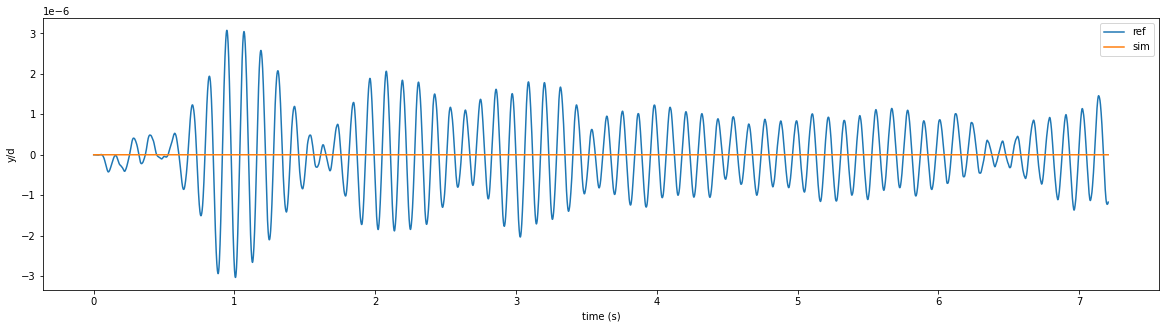

R2 :  -0.00037757785943237643
MSE :  8.297740877144298e-13


In [77]:
# Run simulation with best params
dfy, _ = simulation.run_cable_wakeosc(cfg)

#Plot results
plt.figure(figsize = (20,5))
plt.plot(ref['time'], ref['y/d'], label = "ref")
plt.plot(dfy.index, dfy['s=0.250']/0.025, label = "sim")
plt.xlabel('time (s)')
plt.ylabel('y/d')

plt.legend()
plt.show() 

# Compute scores
print("R2 : ",r2_score(ref['y/d'],(dfy['s=0.250']/0.025).values[:-1]))
print("MSE : ",mean_squared_error(ref['y/d'],(dfy['s=0.250']/0.025).values[:-1]))